# Inter-Track Group Project: Predicting Student's Academic Performance
*An Inter-Track Project by Group 4*

#### Introduction

Academic performance is the extent to which a student, teacher or institution has achieved their short or long-term educational goals. Cumulative GPA and completion of educational benchmarks such as secondary school diplomas and bachelor's degrees represent academic achievement -[Wikipedia](https://en.m.wikipedia.org/wiki/Academic_achievement).


Academic performance is the process of learning in an academic surroundings. Academic performance is seen to be the end result of the skills and intellectual abilities of a student in an academic surroundings. There is more to learning, it is more than Performance. Learning is defined as the expansion of a student’s knowledge and skills that result from instruction and experience in an academic environment. Performance also consist of a student’s ability to show that knowledge and skill in different settings and situations within and outside the classroom.
The Academic performance of students play an important role in the education system as well as the learning process. It is considered to be a major yardstick to judge one’s total potentialities and capacities Nuthana & Yenagi (2009), which are frequently measured by the examination results. It is used to pass judgment on the quality of education offered by academic institutions. 
Predicting students’ performance is mostly useful to help the educators and learners improving their learning and teaching process.


#### Data Description

The provided dataset was collected through the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/predict+students+dropout+and+academic+success), the dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. 


#### Aims and Objectives

Student’s performance is an essential part in academic institutions. This is because one of the criteria for any academic institution is based on its excellent record of academic achievements.  The aim and objectives will be to create a platform *Prolego* to bridge some gaps

The solution *Prolego* provides is to contribute to the reduction of academic dropout and failure in educational institutes by predicting student's academic performance including drop off rate, academic success, to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place, in order to help academicals institutes not only to focus more on bright students but also to initially identify students with low academic achievement and find ways to support them.




In [25]:
# importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import missingno
import sklearn
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"
warnings.filterwarnings('ignore')

In [26]:
# loading and reading the datasets
# Using Pandas read_csv function to load .csv files and perform operations on it.
df = pd.read_csv('data (1).csv', delimiter=';')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [27]:
# number of row in dataset
print("Student Perfomance Dataset Consists of {rows} rows".format(rows = len(df)))

Student Perfomance Dataset Consists of 4424 rows


In [28]:
# checking the number of rows and columns of dataset 
print("The Shape is: ", df.shape)

The Shape is:  (4424, 37)


#### What datatypes are in the datasets?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

In [29]:
# checking for the datatype of each feature of dataset
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [30]:
# checking the complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### *The Target Feature is the only variable having a text (object) data type in the dataset, others are float and integers. As such, before we can actually train a machine learning model on this data set, we will need to convert the text columns into numerical columns by applying the encoding method.*

#### *Therefore, we will separate our numerical and categorical columns using the select_dtypes method in Pandas to see which is which.*

In [31]:
# checking for all numerical columns i.e for integers and float
df_numerical = df.select_dtypes(exclude='object')

df_numerical.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [32]:
# checking for all categorical columns
df_categorical = df.select_dtypes(include='object')

df_categorical.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [33]:
# displaying the names of all features of the dataset
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

#### Renaming Column

From the datasets, we can see that the names of the features are lenghty, hence need to be renamed for proper understanding and easy analysis.

In [34]:
# renaming each column
df.columns = ['Marital_Status', 'Ap_Mode', 'Ap_Order', 'Course',
       'Attendance', 'Prev_Qua',
       'Prev_Qua_Grade', 'Region',
       'Mother_Qua', 'Father_Qua',
       'Mother_Occ', 'Father_Occ', 'Adm_Grade',
       'Displaced', 'Edu_Spec_Needs', 'Debtor',
       'Tui_Up_to_Date', 'Gender', 'S_Holder',
       'Age_at_Enroll', 'International',
       'Cur_U_1st_Sem_Credit',
       'Cur_U_1st_Sem_Enrol',
       'Cur_U_1st_Sem_Eva',
       'Cur_U_1st_Sem_Appr',
       'Cur_U_1st_Sem_Grade',
       'Cur_U_1st_Sem_no_Eva',
       'Cur_U_2nd_Sem_Credit',
       'Cur_U_2nd_Sem_Enrol',
       'Cur_U_2nd_Sem_Eva',
       'Cur_U_2nd_Sem_Approved',
       'Cur_U_2nd_Sem_Grade',
       'Cur_U_2nd_Sem_no_Eva', 'Unmp_R',
       'Inf_R', 'GDP', 'SAP']

In [35]:
# displaying the summary statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Ap_Mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Ap_Order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Prev_Qua,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Prev_Qua_Grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Region,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother_Qua,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father_Qua,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


#### What missing values are there?

Visualise missing values early is so important as it shows where the major holes in the dataset are. Knowing this information helps with EDA and also figuring out what kind of data cleaning and preprocessing is needed.

In [36]:
# checking for missing values
df.isnull().sum()

Marital_Status            0
Ap_Mode                   0
Ap_Order                  0
Course                    0
Attendance                0
Prev_Qua                  0
Prev_Qua_Grade            0
Region                    0
Mother_Qua                0
Father_Qua                0
Mother_Occ                0
Father_Occ                0
Adm_Grade                 0
Displaced                 0
Edu_Spec_Needs            0
Debtor                    0
Tui_Up_to_Date            0
Gender                    0
S_Holder                  0
Age_at_Enroll             0
International             0
Cur_U_1st_Sem_Credit      0
Cur_U_1st_Sem_Enrol       0
Cur_U_1st_Sem_Eva         0
Cur_U_1st_Sem_Appr        0
Cur_U_1st_Sem_Grade       0
Cur_U_1st_Sem_no_Eva      0
Cur_U_2nd_Sem_Credit      0
Cur_U_2nd_Sem_Enrol       0
Cur_U_2nd_Sem_Eva         0
Cur_U_2nd_Sem_Approved    0
Cur_U_2nd_Sem_Grade       0
Cur_U_2nd_Sem_no_Eva      0
Unmp_R                    0
Inf_R                     0
GDP                 

<AxesSubplot:>

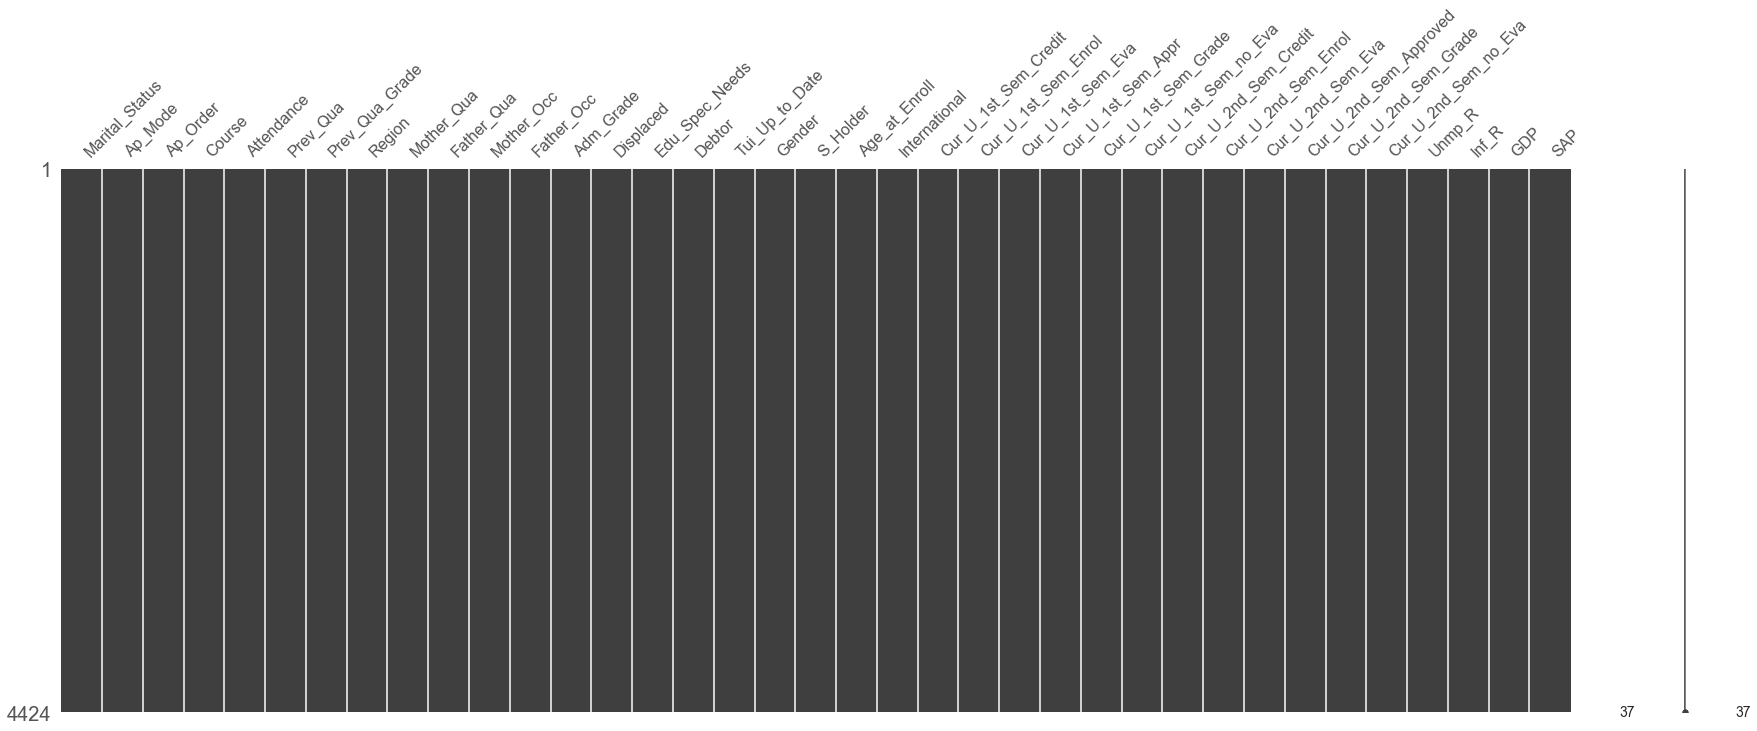

In [37]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

### Inference

There is no Missing data in the dataset.

In [14]:
# checking for duplicates in the dataset
df.duplicated().sum()

0

## *Univariate Analysis*

#### Target Feature: SAP = Student Academic Performance

Description: Whether the students Enrolled, Graduated or Dropout.

This is the variable we want our machine learning model to predict based off all the others.

In [38]:
# What kind of values are in Student Academic Performance?
df.SAP.value_counts() 

Graduate    2209
Dropout     1421
Enrolled     794
Name: SAP, dtype: int64

#### *Since we are only concerned about students who dropout and student who graduate, we do not need the Enrolled class hence it would be dropped.*

In [39]:
# we want to ommit the information from the SAP column that does not concern our analysis. 
df["SAP"] = df.SAP.apply(lambda x: 1 if x == "Dropout" else 0)

In [40]:
df.SAP.value_counts() 

0    3003
1    1421
Name: SAP, dtype: int64

where 0 represents students who are graduate, 1 represents students who dropout

Text(0.5, 1.0, 'Distribution of Student who are Graduates and Dropouts')

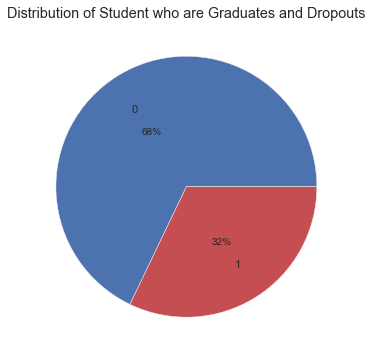

In [18]:
# How many Students Graduated or Dropout?
plt.figure(figsize=(6,6))
plt.pie(x=[3003, 1421], labels=['0','1'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Student who are Graduates and Dropouts')

### *Inference*

The distribution plot shows that students who are graduates are 68% and students who dropped out are 32%. Also the plot reveals tha the dataset is not unbalanced, so there would no need for any tecnique used to balance the dataset.

#### Feature: Marital_Status
Description: Marital Status of students.

In [18]:
# What kind of values are in Marital_Status?
df.Marital_Status.value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital_Status, dtype: int64

In [41]:
# what are the Marital Status categories?
df['Marital_Status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

*The Marital Status column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to unmarried and married. where 1 reps students who are unmarried and 2 reps students who are married.*

In [42]:
df['Marital_Status']=np.where(df['Marital_Status'] ==4, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==5, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==6, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==3, 2, df['Marital_Status'])

In [43]:
df['Marital_Status'].unique()

array([1, 2], dtype=int64)

In [44]:
df.Marital_Status.value_counts()

1    3919
2     505
Name: Marital_Status, dtype: int64

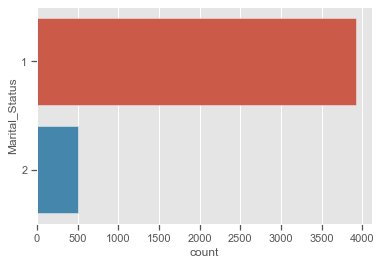

In [24]:
# What do the counts look like?
sns.countplot(y='Marital_Status', data=df);

### *Inference*

From the plot it is shown that Students with the unmarried class is more than Students who are married.

#### Feature: Ap_Mode = Application Mode
Description: the various means through which a candidate may be admitted into the degree programme. 

In [25]:
df.Ap_Mode.value_counts() 

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
57       1
27       1
Name: Ap_Mode, dtype: int64

*The Ap_Mode column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to popular and not popular. where 1 reps students with popular Ap_Mode and 2 reps students with unpolpular Ap_Mode*.

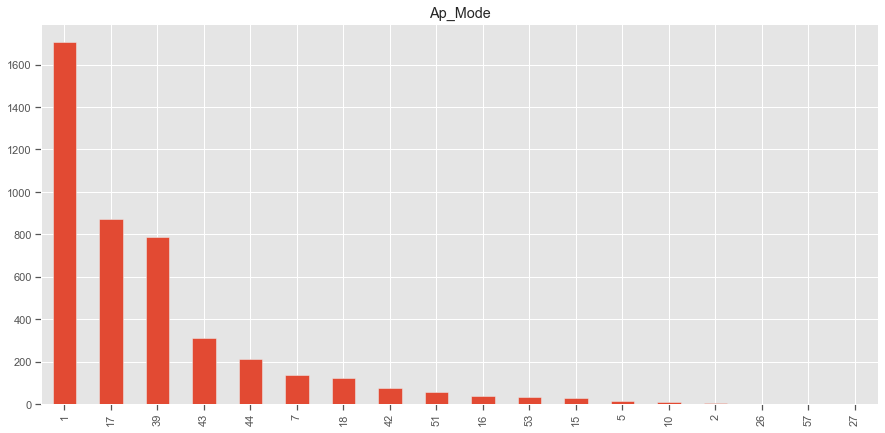

In [26]:
# ploting the bar chart for Ap_Mode
df['Ap_Mode'].value_counts().plot(kind = "bar", title = 'Ap_Mode', figsize=(15, 7))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Ap_Order = Application Order
Description: the various order through which a candidate may be admitted into the degree programme.

In [27]:
df.Ap_Order.value_counts() 

1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: Ap_Order, dtype: int64

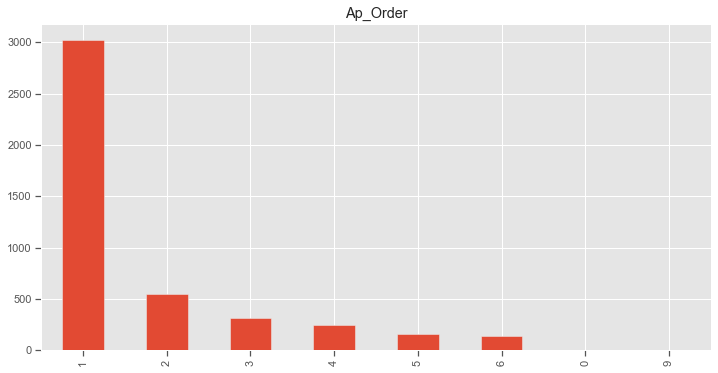

In [28]:
# ploting the bar chart for Ap_Order
df['Ap_Order'].value_counts().plot(kind = "bar", title = 'Ap_Order', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Course
Description: The program in which students are admitted to. For analysis sake, we assume that the course stands for the programme related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies, etc.

In [45]:
df.Course.value_counts() 

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
8014    215
171     215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

In [50]:
df.replace(to_replace={'Course': {9500: 'management', 9147: 'social service', 9238: 'information technology',
                                  9085: 'economics', 9773: 'accounting', 9670: 'agronomy',
                                  9991: 'design', 9254: 'education', 9070: 'nursing', 8014: 'journalism',
                                  171: 'chemistry', 9003: 'law', 9853: 'business', 9119: 'finance', 9130: 'biology',
                                  9556: 'philosophy', 33: 'mechanical engineering'}}, inplace=True, value=None)

df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,chemistry,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,education,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,nursing,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,accounting,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,journalism,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,accounting,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,accounting,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,management,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,social service,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


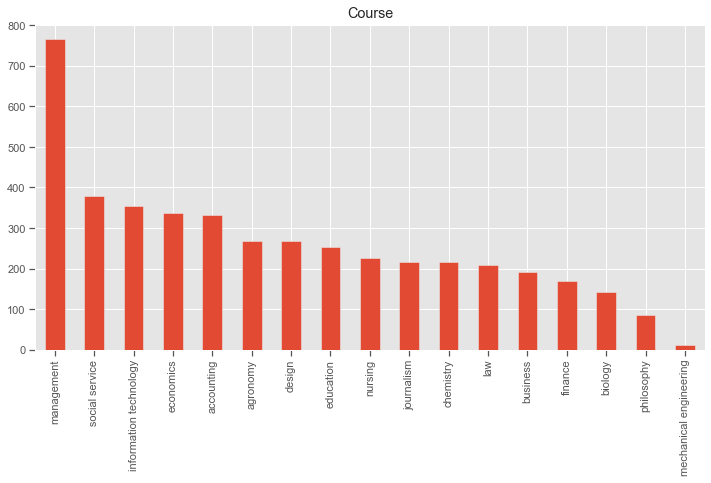

In [51]:
# ploting the bar chart for Course
df['Course'].value_counts().plot(kind = "bar", title = 'Course', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the bar chart, it is shown that the highest degree programme is management with 766 students enrolled in it followed by social service and information technology. However, the course with the lowest number of of student is machanical engineering, which have only 12 students enrolled in it.

#### Feature: Attendance = Day_evening_attendance
Description: Attendance taken for daytime students and evening students. For analysis sake, we assume that 1 represents the Day students and 0 represents the Evening students.

In [32]:
df.Attendance.value_counts() 

1    3941
0     483
Name: Attendance, dtype: int64

Text(0.5, 1.0, 'Distribution of Student for Daytime and Evening Attendance')

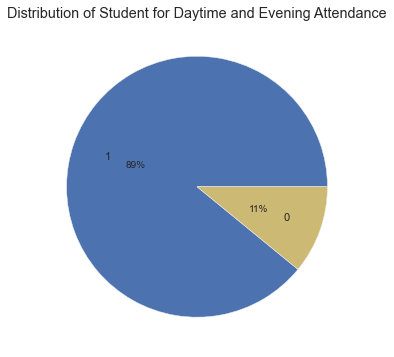

In [33]:
plt.figure(figsize=(6,6))
plt.pie(x=[3941, 483], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Student for Daytime and Evening Attendance')

### *Inference*

From the above pie plot, it is shown that students with Day attendance are more than those who attend in the evening. Where 89% of students are seen to be day attendance and 11% are Evening.

####  Feature: Prev_Qua = Previous_Qualification
Description: Previous Qualification of students.

In [34]:
df.Prev_Qua.value_counts() 

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
14       1
5        1
Name: Prev_Qua, dtype: int64

In [35]:
# reducing the previous Qualification feature to 3; Diploma, HND, OND
df['Prev_Qua'] = pd.cut(df['Prev_Qua'], bins=3, labels=('Diploma', 'HND', 'OND'))
df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,Diploma,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,Diploma,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,Diploma,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,Diploma,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,Diploma,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,Diploma,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,Diploma,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,Diploma,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,Diploma,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [36]:
df.Prev_Qua.value_counts()

Diploma    3954
OND         308
HND         162
Name: Prev_Qua, dtype: int64

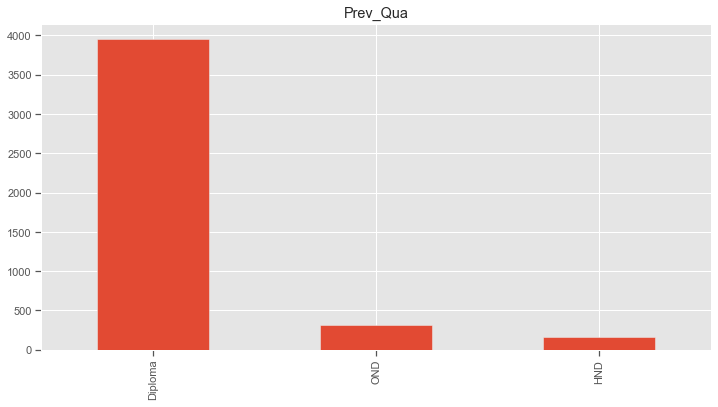

In [37]:
# ploting the bar chart for Prev_Qua
df['Prev_Qua'].value_counts().plot(kind = "bar", title = 'Prev_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from graph that the previous qualification of students is more for the Diploma class compared to the rest.



##### Feature: Prev_Qua_Grade = Previous_Qualification_Grade
Description: Previous Qualification Grade of students.

In [38]:
df.Prev_Qua_Grade.value_counts()

133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
138.6      1
169.0      1
117.4      1
140.8      1
188.0      1
Name: Prev_Qua_Grade, Length: 101, dtype: int64

In [39]:
df['Prev_Qua_Grade'].max()

190.0

In [40]:
df['Prev_Qua_Grade'].min()

95.0

#### Feature: Region
Description: The Region of students.

In [41]:
df.Region.value_counts() 

1      4314
41       38
26       14
22       13
6        13
24        5
11        3
103       3
100       3
25        2
21        2
105       2
2         2
62        2
101       2
32        1
109       1
17        1
14        1
13        1
108       1
Name: Region, dtype: int64

In [42]:
# reducing the previous Nationality feature to 6 regions
df['Region'] = pd.cut(df['Region'], bins=6, labels=('south_west', 'south_east', 'south_south', 'North_centra', 
                                                                   'north_west', 'north_east'))
df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,Diploma,122.0,south_west,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,Diploma,160.0,south_west,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,Diploma,122.0,south_west,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,Diploma,122.0,south_west,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,Diploma,100.0,south_west,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,Diploma,125.0,south_west,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,Diploma,120.0,north_east,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,Diploma,154.0,south_west,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,Diploma,180.0,south_west,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


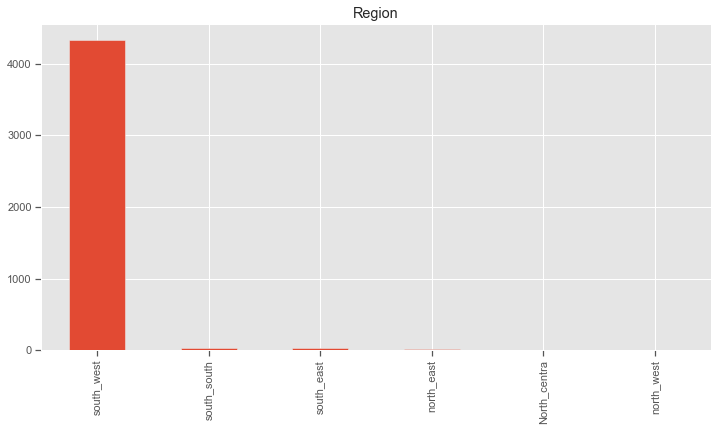

In [43]:
# ploting the bar chart for Nationality
df['Region'].value_counts().plot(kind = "bar", title = 'Region', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from the plot that students from the south west region is more than the rest.


#### Feature: Mother_Qua = Mother_Qualification
Description:  Mother's Qualification of students.

In [44]:
df.Mother_Qua.value_counts() 

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
39       8
9        8
41       6
42       4
43       4
6        4
30       3
10       3
29       3
11       3
35       3
36       3
14       2
22       1
26       1
18       1
44       1
27       1
Name: Mother_Qua, dtype: int64

In [45]:
# reducing the previous Mother's Qualification feature to 6 
df['Mother_Qua'] = pd.cut(df['Mother_Qua'], bins=6, labels=('SSCE', 'HND', 'BSC', 'MSC', 
                                                                   'PHD', 'others'))
df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,Diploma,122.0,south_west,BSC,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,Diploma,160.0,south_west,SSCE,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,Diploma,122.0,south_west,others,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,Diploma,122.0,south_west,others,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,Diploma,100.0,south_west,others,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,Diploma,125.0,south_west,SSCE,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,Diploma,120.0,north_east,SSCE,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,Diploma,154.0,south_west,others,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,Diploma,180.0,south_west,others,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


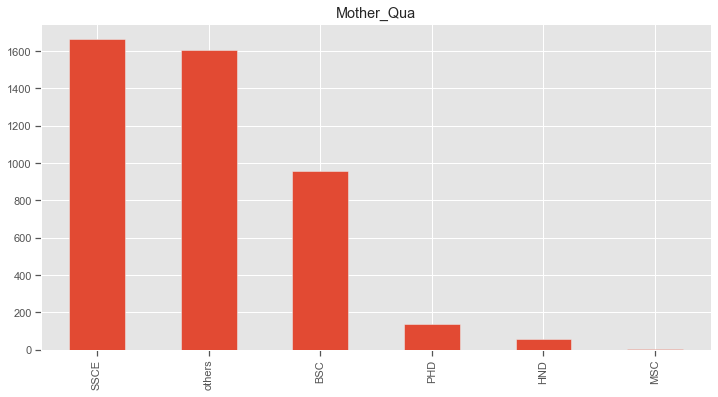

In [46]:
# ploting the bar chart for Mother_Qua
df['Mother_Qua'].value_counts().plot(kind = "bar", title = 'Mother_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Qua = Father_Qualification
Description:  Father's Qualification of students.

In [47]:
df.Father_Qua.value_counts()

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
35       2
10       2
6        2
41       2
43       2
18       1
42       1
33       1
25       1
13       1
27       1
31       1
44       1
20       1
Name: Father_Qua, dtype: int64

In [48]:
# reducing the previous Father's Qualification feature to 6 
df['Father_Qua'] = pd.cut(df['Father_Qua'], bins=6, labels=('SSCE', 'HND', 'BSC', 'MSC', 'PHD', 'others'))
df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,Diploma,122.0,south_west,BSC,HND,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,Diploma,160.0,south_west,SSCE,SSCE,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,Diploma,122.0,south_west,others,others,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,Diploma,122.0,south_west,others,others,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,Diploma,100.0,south_west,others,others,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,Diploma,125.0,south_west,SSCE,SSCE,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,Diploma,120.0,north_east,SSCE,SSCE,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,Diploma,154.0,south_west,others,others,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,Diploma,180.0,south_west,others,others,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


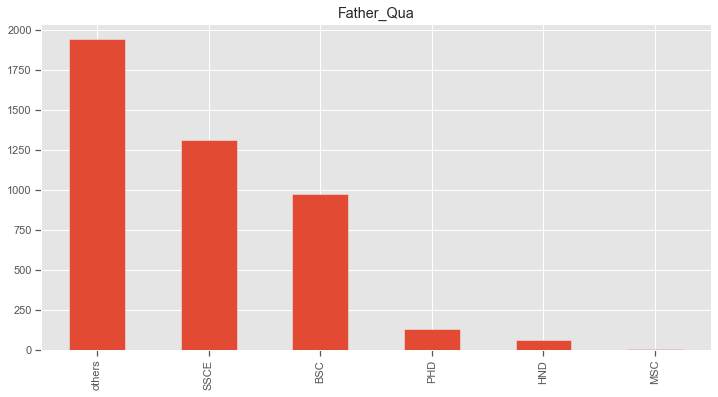

In [49]:
# ploting the bar chart for Father_Qua
df['Father_Qua'].value_counts().plot(kind = "bar", title = 'Father_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Mother_Occ =  Mother_Occupation
Description: The Mother's Occupation of students.

In [50]:
df.Mother_Occ.value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
10        4
193       4
134       4
132       3
143       3
151       3
122       2
152       2
153       2
125       1
173       1
131       1
171       1
Name: Mother_Occ, dtype: int64

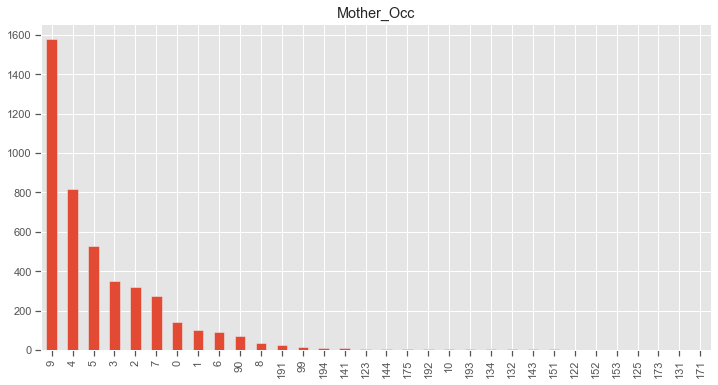

In [51]:
# ploting the bar chart for Mother_Occ
df['Mother_Occ'].value_counts().plot(kind = "bar", title = 'Mother_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Occ = Father_Occupation
Description: The Father's Occupation of students.

In [52]:
df.Father_Occ.value_counts()

9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
171       8
144       8
192       6
163       5
175       4
103       4
135       3
183       3
181       3
152       3
123       3
194       2
182       2
151       2
122       2
102       2
172       2
112       2
131       1
143       1
174       1
124       1
101       1
154       1
134       1
114       1
132       1
161       1
153       1
141       1
121       1
195       1
Name: Father_Occ, dtype: int64

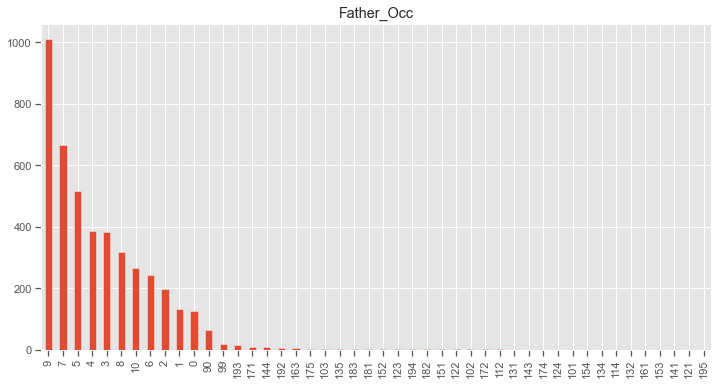

In [53]:
# ploting the bar chart for Father_Occ
df['Father_Occ'].value_counts().plot(kind = "bar", title = 'Father_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Adm_Grade = Admission_Grade
Description: The Admission_Grade of students.

In [54]:
df.Adm_Grade.value_counts()

130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
98.5       1
164.3      1
173.3      1
155.8      1
103.8      1
Name: Adm_Grade, Length: 620, dtype: int64

In [55]:
df['Adm_Grade'].max()

190.0

In [56]:
df['Adm_Grade'].min()

95.0

<AxesSubplot:xlabel='Adm_Grade', ylabel='Density'>

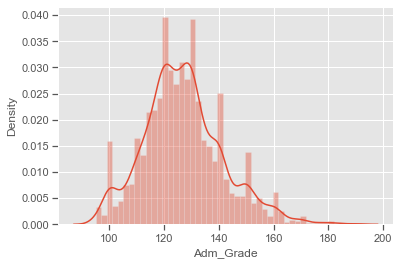

In [57]:
# ploting the distribution for Adm_Grade
sns.distplot(df.Adm_Grade)

#### Feature: Displaced
Description:  Students who are forced to flee their homes and consequently their schools for various reasons. For this analysis, we will assume 1 to represents students with the not-Displaced class and 0 to represents students with the Displaced class.

In [58]:
df.Displaced.value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

Text(0.5, 1.0, 'Distribution of Displaced Student')

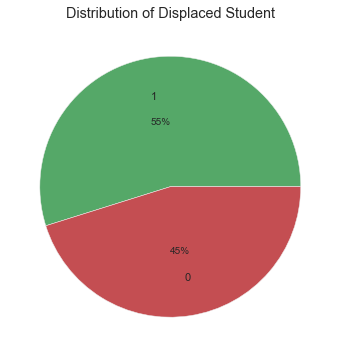

In [59]:
plt.figure(figsize=(6,6))
plt.pie(x=[2426, 1998], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['g','r'])
plt.title('Distribution of Displaced Student')

### *Inference*

We can see from the plot that students who are not displaced is 56% and those who are is 45%


#### Feature: Edu_Spec_Needs = Educational_Special_Needs 
Description:  Students who have learning problems or disabilities. For this analysis, we will assume 0 to represents students with the special needs class and 1 to represents students with the non-special needs class.

In [60]:
df.Edu_Spec_Needs.value_counts()

0    4373
1      51
Name: Edu_Spec_Needs, dtype: int64

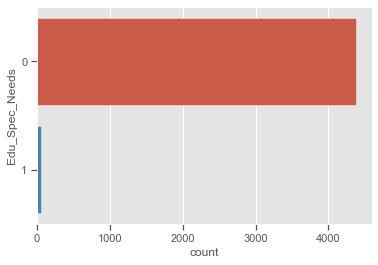

In [61]:
# What do the counts look like?
sns.countplot(y='Edu_Spec_Needs', data=df);

Text(0.5, 1.0, 'Distribution of Students with Special Needs')

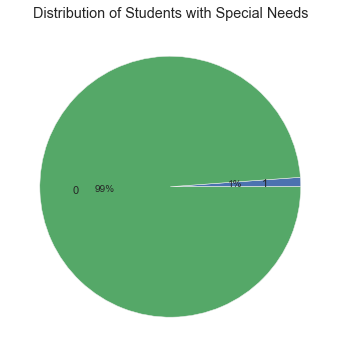

In [62]:
plt.figure(figsize=(6,6))
plt.pie(x=[51, 4373], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','g'])
plt.title('Distribution of Students with Special Needs')

### *Inference*

We can see from the plot that students who have special needs is 99% compared to those who do not have special needs


#### Feature: Debtor
Description:  Students who owes money. For easy analysis, we assume 0 to represents students who are not debtors and 1 to represents students who are debtors 

In [63]:
df.Debtor.value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

Text(0.5, 1.0, 'Distribution of Students in Debts')

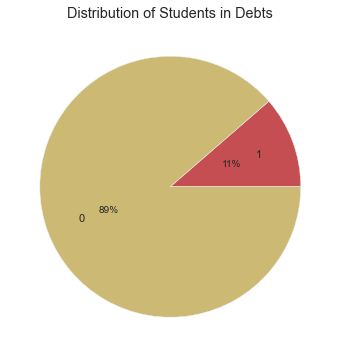

In [64]:
plt.figure(figsize=(6,6))
plt.pie(x=[503, 3921], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','y'])
plt.title('Distribution of Students in Debts')

 ### *Inference*

From the plot, it is shown that students who are not debtors is 89% which is more than those students who are debtors. 

#### Feature: Tui_Up_to_Date = Tuition_Fees_Up_to_Date 
Description:  Students who have their Tuition Fee up to date and those who do not have. For easy analysis, we assume that 0 represents students with Tuition fees not up to Date and 1 represents students with Tuition fees up to Date.

In [65]:
df.Tui_Up_to_Date.value_counts()

1    3896
0     528
Name: Tui_Up_to_Date, dtype: int64

Text(0.5, 1.0, 'Distribution of Students with Tuition Fees up to Date')

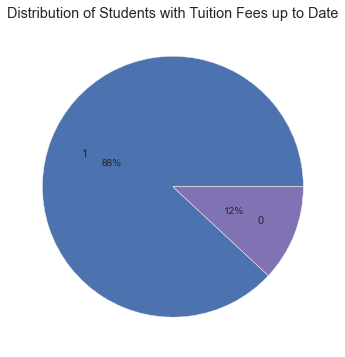

In [66]:
plt.figure(figsize=(6,6))
plt.pie(x=[3896, 528], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','m'])
plt.title('Distribution of Students with Tuition Fees up to Date')

### *Inference*

From the plot, it is shown that students with Tuition fees up to Date is more than students with Tuition fees not up to Date.



#### Feature: Gender 
Description:  The gender of Students, that is either Male or Female. For easy analysis we will assume that 0 represents female and 1 represents male.

In [67]:
df.Gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

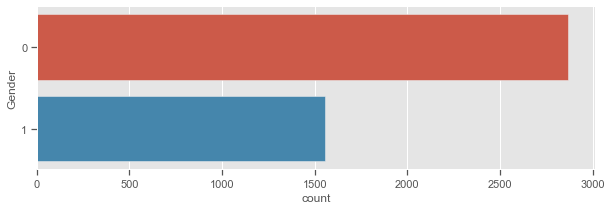

In [68]:
# Let's view the distribution of Gender
plt.figure(figsize=(10, 3))
sns.countplot(y="Gender", data=df);

### *Inference*

From the plot, it is shown that students who are female is more than students who are male.

####  Feature: S_Holder =  Scholarship_Holder 
Description: Student receiving financial aid to support their studies. For easy analysis, we will assume 0 represents non Scholarship Holder and 1 represents Scholarship Holder

In [69]:
df.S_Holder.value_counts()

0    3325
1    1099
Name: S_Holder, dtype: int64

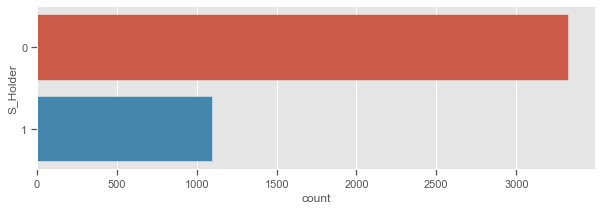

In [70]:
# Let's view the distribution of Scholarship_Holder?
plt.figure(figsize=(10, 3))
sns.countplot(y="S_Holder", data=df);

### *Inference*

From the plot, it is shown that students who are non Scholarship Holders are more than students who are Scholarship Holder.

#### Feature: Age_at_Enroll = Age_at_Enrollment 
Description:  The Age of Student at Enrollment.

In [71]:
df.Age_at_Enroll.value_counts()

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
30      49
35      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
49      13
42      13
46      12
48      11
51       7
53       7
54       7
17       5
55       5
52       4
58       3
59       3
60       2
57       2
61       1
70       1
62       1
Name: Age_at_Enroll, dtype: int64

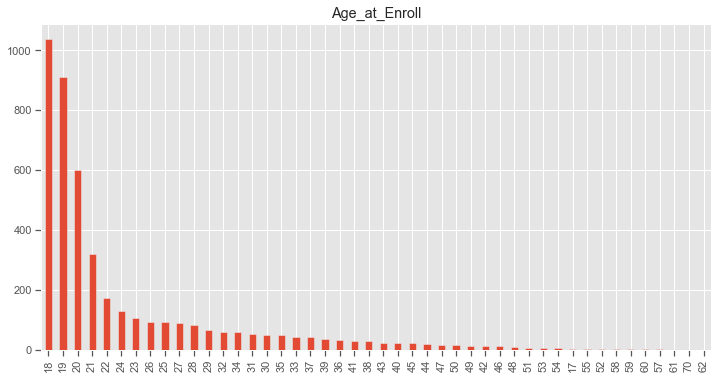

In [72]:
# ploting the bar chart for Age_at_Enroll
df['Age_at_Enroll'].value_counts().plot(kind = "bar", title = 'Age_at_Enroll', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the plot, it is shown that students who are age 18 are more followed age 19, and 20 compared to the rest. 

#### Feature: International  
Description: Students who come from other part of the world to study. For easy analysis, we assume that 0 represents  international student and 1 represents non-international students.

In [73]:
df.International.value_counts()

0    4314
1     110
Name: International, dtype: int64

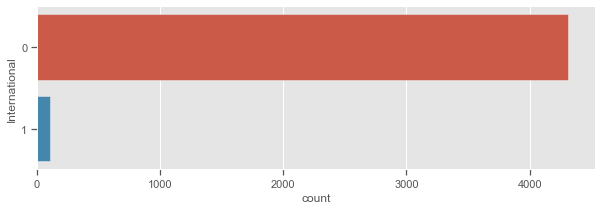

In [74]:
# Let's view the distribution of International Students?
plt.figure(figsize=(10, 3))
sns.countplot(y="International", data=df);

### *Inference*

From the plot, it is shown that international student is more the non-international students.

#### Feature: Cur_U_1st_Sem_Credit =  Curricular_Units_1st_Sem_Credited
Description: Curricular Credit units for Students in various course of study for the first semester

In [75]:
df.Cur_U_1st_Sem_Credit.value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
5       41
7       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
20       2
19       2
Name: Cur_U_1st_Sem_Credit, dtype: int64

#### Feature: Cur_U_1st_Sem_Enrol = Curricular_Units_1st_Sem_Enrolled
Description: Students enrolled in various units course of study for the first semester

In [76]:
df.Cur_U_1st_Sem_Enrol.value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Cur_U_1st_Sem_Enrol, dtype: int64

#### Feature: Cur_U_1st_Sem_Eva = Curricular_Units_1st_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the first semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the first semester.

In [77]:
df.Cur_U_1st_Sem_Eva.value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
24      6
3       6
26      4
25      3
27      2
29      2
45      2
33      1
36      1
32      1
28      1
31      1
Name: Cur_U_1st_Sem_Eva, dtype: int64

#### Feature: Cur_U_1st_Sem_Appr = Curricular_Units_1st_Sem_Approved
Description: The various unit courses approved for students taken in the first semester.

In [78]:
df.Cur_U_1st_Sem_Appr.value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Cur_U_1st_Sem_Appr, dtype: int64

#### Feature: Cur_U_1st_Sem_Grade = Curricular_Units_1st_Sem_Grade 
Description: The Grade in various unit courses for students taken in the first semester.

In [79]:
df.Cur_U_1st_Sem_Grade.value_counts()

0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
13.828571      1
13.271667      1
16.153846      1
15.675714      1
15.888889      1
Name: Cur_U_1st_Sem_Grade, Length: 805, dtype: int64

In [80]:
df['Cur_U_1st_Sem_Grade'].max()

18.875

In [81]:
df['Cur_U_1st_Sem_Grade'].min()

0.0

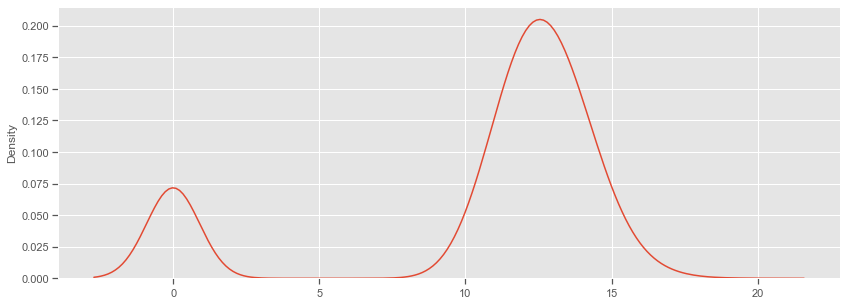

In [82]:
fig = plt.figure(figsize = (14,5))

sns.distplot(df[['Cur_U_1st_Sem_Grade']], hist = False)
plt.show()

#### Feature: Cur_U_1st_Sem_no_Eva = Curricular_Units_1st_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the first semester. 

In [83]:
df.Cur_U_1st_Sem_no_Eva.value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Cur_U_1st_Sem_no_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Credit = Curricular_Units_2nd_Sem_Credited 
Description: Curricular Credit units for Students in various course of study for the second semester

In [84]:
df.groupby('Cur_U_1st_Sem_Credit')['Cur_U_1st_Sem_Grade'].agg('count')

Cur_U_1st_Sem_Credit
0     3847
1       85
2       94
3       69
4       47
5       41
6       51
7       41
8       31
9       27
10      15
11      17
12      12
13      13
14      15
15       5
16       3
17       3
18       4
19       2
20       2
Name: Cur_U_1st_Sem_Grade, dtype: int64

In [85]:
df.Cur_U_2nd_Sem_Credit.value_counts()

0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
16       2
18       2
15       2
19       1
Name: Cur_U_2nd_Sem_Credit, dtype: int64

#### Feature: Cur_U_2nd_Sem_Enrol = Curricular_Units_2nd_Sem_Enrolled
Description: Students enrolled in various units course of study for the second semester

In [86]:
df.Cur_U_2nd_Sem_Enrol.value_counts()

6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
1        3
19       3
18       2
15       2
23       2
21       1
16       1
Name: Cur_U_2nd_Sem_Enrol, dtype: int64

#### Feature: Cur_U_2nd_Sem_Eva = Curricular_Units_2nd_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the second semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the second semester.

In [87]:
df.Cur_U_2nd_Sem_Eva.value_counts()

8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
22     10
4      10
21     10
20      8
2       4
23      4
24      3
1       3
26      3
27      2
3       2
25      1
28      1
33      1
Name: Cur_U_2nd_Sem_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Approved = Curricular_Units_2nd_Sem_Approved
Description: The various unit courses approved for students taken in the second semester.

In [88]:
df.Cur_U_2nd_Sem_Approved.value_counts()

6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
18      2
20      2
16      2
Name: Cur_U_2nd_Sem_Approved, dtype: int64

#### Feature: Cur_U_2nd_Sem_Grade =  Curricular_Units_2nd_Sem_Grade 
Description: The Grade in various unit courses for students taken in the second semester.

In [89]:
df.Cur_U_2nd_Sem_Grade.value_counts()

0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
12.330000      1
16.075000      1
13.183333      1
13.657143      1
11.550000      1
Name: Cur_U_2nd_Sem_Grade, Length: 786, dtype: int64

In [90]:
df['Cur_U_2nd_Sem_Grade'].max()

18.571428571428573

In [91]:
df['Cur_U_2nd_Sem_Grade'].min()

0.0

#### Feature: Cur_U_2nd_Sem_no_Eva = Curricular_Units_2nd_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the second semester. 

In [92]:
df.Cur_U_2nd_Sem_no_Eva.value_counts()

0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Cur_U_2nd_Sem_no_Eva, dtype: int64

#### Feature: Unmp_R = Unemployment_Rate
Description: It measures the share of workers in the labor force who do not currently have a job but are actively looking for work.

In [93]:
df.Unmp_R.value_counts()

7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unmp_R, dtype: int64

<AxesSubplot:xlabel='Unmp_R', ylabel='Density'>

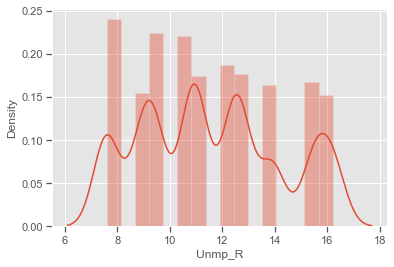

In [94]:
# ploting the distribution for Unmp_R
sns.distplot(df.Unmp_R)

#### Feature: Inf_R = Inflation_Rate
Description: The rate at which prices increase over time, resulting in a fall in the purchasing value of money.


In [95]:
df.Inf_R.value_counts()

 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inf_R, dtype: int64

<AxesSubplot:xlabel='Inf_R', ylabel='Density'>

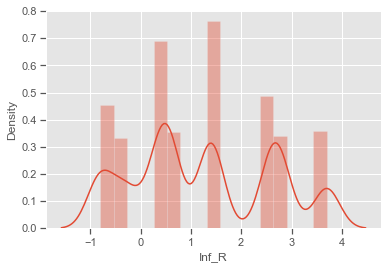

In [96]:
# ploting the distribution for Inf_R
sns.distplot(df.Inf_R)

#### Feature: GDP 
Description: The GDP measures the monetary value of goods and services produced within a country's borders in a given time period, usually a quarter or a year.

In [97]:
df.GDP.value_counts()

 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

<AxesSubplot:xlabel='GDP', ylabel='Density'>

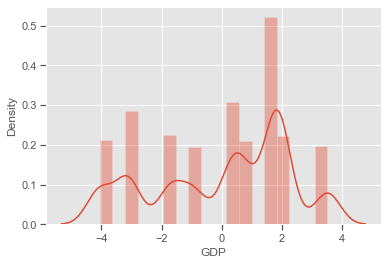

In [98]:
# ploting the distribution for GDP
sns.distplot(df.GDP)

### Bi-Variate Analysis

Text(0, 0.5, 'Frequency of Student Perfomance')

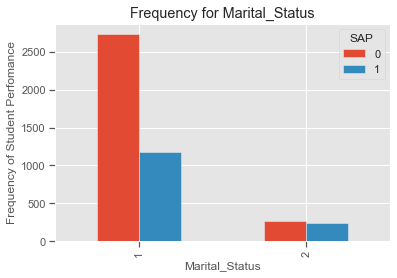

In [99]:
# Student performnce vs Marital Status
%matplotlib inline
pd.crosstab(df.Marital_Status,df.SAP).plot(kind='bar')
plt.title('Frequency for Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the single class will dropout and graduate more than those in the married class.

Text(0, 0.5, 'Proportion of Student Perfomance')

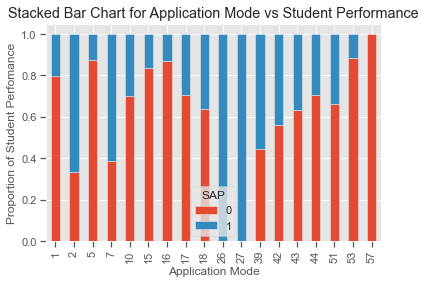

In [100]:
# Student performnce vs Ap_Mode
table=pd.crosstab(df.Ap_Mode,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Mode vs Student Performance')
plt.xlabel('Application Mode')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the 26-class and 27-class application mode will dropout than the rest. Also, those with the 57-class application mode are likely to graduate more than the rest. 

Text(0, 0.5, 'Proportion of Student Perfomance')

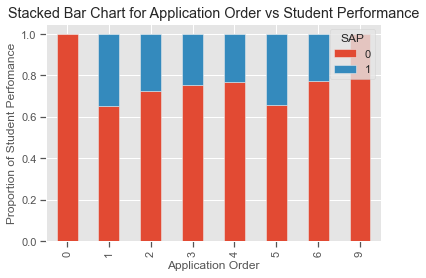

In [101]:
# Student performnce vs Ap_Order
table=pd.crosstab(df.Ap_Order,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Order vs Student Performance')
plt.xlabel('Application Order')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who have the 0 and 9 Application Order would dropout. 

Text(0, 0.5, 'Proportion of Student Perfomance')

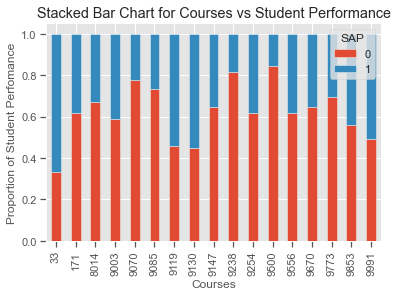

In [102]:
# Student performnce vs Course
table=pd.crosstab(df.Course,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Courses vs Student Performance')
plt.xlabel('Courses')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are enrolled into machanical engineering, biology, finance and design, are likely to graduate more than the rest. However, students who are enrolled into Courses like managment, information tecnology and nursing are likely to dropout than the rest.

Text(0, 0.5, 'Frequency of Student Perfomance')

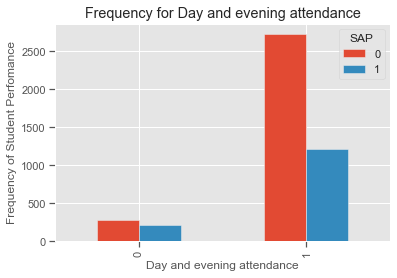

In [103]:
# Student performnce vs Attendance
%matplotlib inline
pd.crosstab(df.Attendance,df.SAP).plot(kind='bar')
plt.title('Frequency for Day and evening attendance')
plt.xlabel('Day and evening attendance')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are Day Attendance students are more than the evening attendance. Also, students who are Day Attendance students are more likely to dropout than graduate than those who are Evening Attendance students.


Text(0, 0.5, 'Proportion of Student Perfomance')

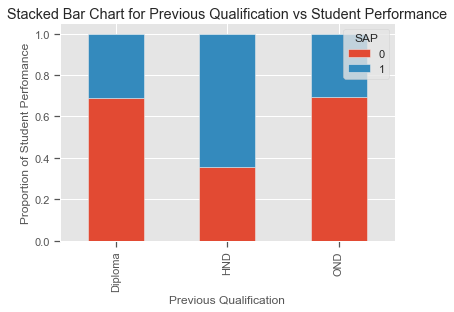

In [104]:
# Student performnce vs Prev_Qua
table=pd.crosstab(df.Prev_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Previous Qualification vs Student Performance')
plt.xlabel('Previous Qualification')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who have the 40, 42 and 43 Previous Qualification are more likely to dropout than the rest. However, students who have the 5, 9 and 14 Previous Qualification are more likely to graduate than the rest.

Text(0, 0.5, 'Proportion of Student Perfomance')

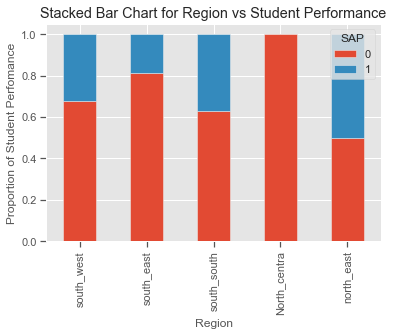

In [105]:
# Student performnce vs Nationality
table=pd.crosstab(df.Region,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Region vs Student Performance')
plt.xlabel('Region')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

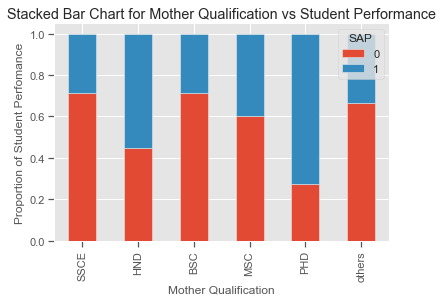

In [106]:
# Student performnce vs Mother_Qua
table=pd.crosstab(df.Mother_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Qualification vs Student Performance')
plt.xlabel('Mother Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

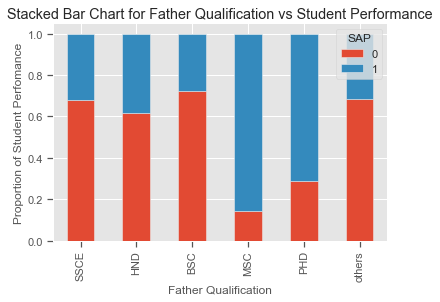

In [107]:
# Student performnce vs Father_Qua
table=pd.crosstab(df.Father_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Qualification vs Student Performance')
plt.xlabel('Father Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

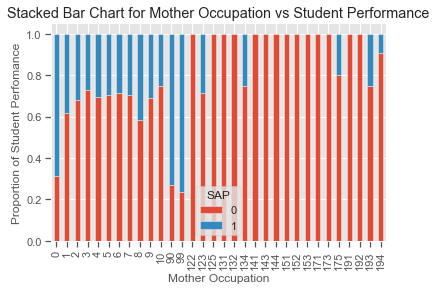

In [108]:
# Student performnce vs Mother_Occ
table=pd.crosstab(df.Mother_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Occupation vs Student Performance')
plt.xlabel('Mother Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

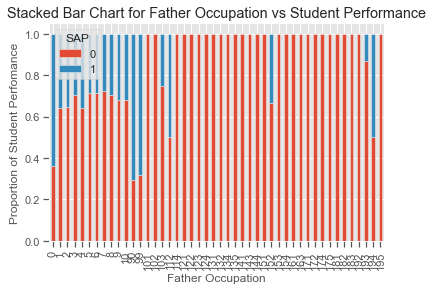

In [109]:
# Student performnce vs Father_Occ
table=pd.crosstab(df.Father_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Occupation vs Student Performance')
plt.xlabel('Father Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

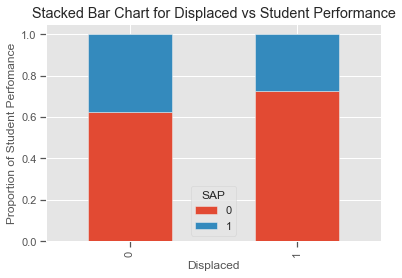

In [110]:
# Student performnce vs Displaced
table=pd.crosstab(df.Displaced,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Displaced vs Student Performance')
plt.xlabel('Displaced')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are Displaced are more likely to dropout than graduate than those who are not Displaced.

Text(0, 0.5, 'Proportion of Student Perfomance')

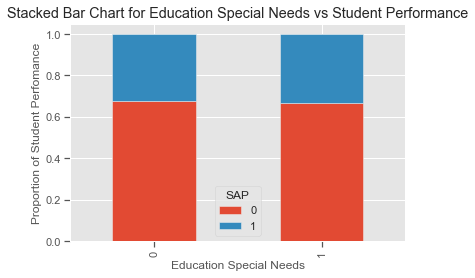

In [111]:
# Student performnce vs Edu_Spec_Needs
table=pd.crosstab(df.Edu_Spec_Needs,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Education Special Needs vs Student Performance')
plt.xlabel('Education Special Needs')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

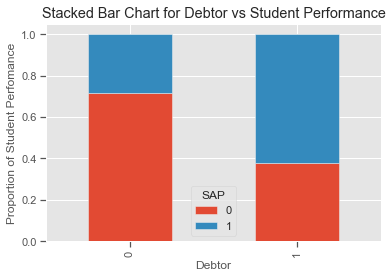

In [112]:
# Student performnce vs Debtor
table=pd.crosstab(df.Debtor,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Debtor vs Student Performance')
plt.xlabel('Debtor')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are debtors are more likely to dropout than graduate than those who are not.


Text(0, 0.5, 'Proportion of Student Perfomance')

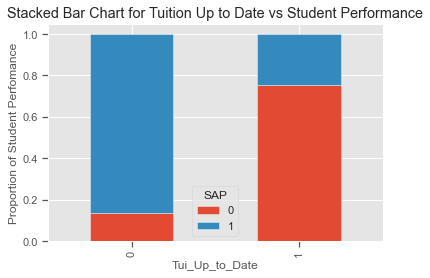

In [113]:
# Student performnce vs Tui_Up_to_Date
table=pd.crosstab(df.Tui_Up_to_Date,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Tuition Up to Date vs Student Performance')
plt.xlabel('Tui_Up_to_Date')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students whose Tuition is not Up to Date are more likely to dropout than graduate than those  whose Tuition is Up to Date.


Text(0, 0.5, 'Proportion of Student Perfomance')

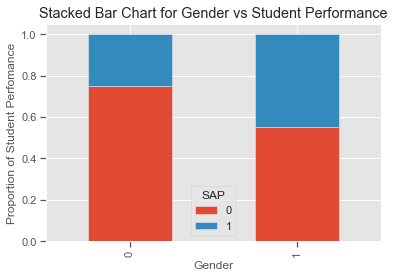

In [114]:
# Student performnce vs Gender
table=pd.crosstab(df.Gender,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Gender vs Student Performance')
plt.xlabel('Gender')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are female are more likely to dropout than graduate than those who are male.

Text(0, 0.5, 'Proportion of Student Perfomance')

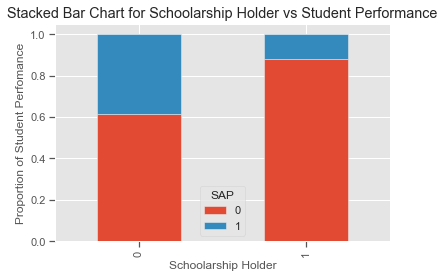

In [115]:
# Student performnce vs S_Holder
table=pd.crosstab(df.S_Holder,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Schoolarship Holder vs Student Performance')
plt.xlabel('Schoolarship Holder')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are Scholarship Holders are more likely to dropout than graduate than those who are non-Scholarship Holders.

Text(0, 0.5, 'Proportion of Student Perfomance')

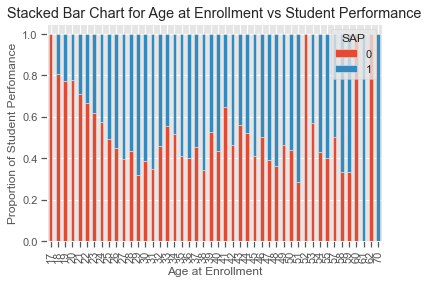

In [116]:
# Student performnce vs Age at Enrollment
table=pd.crosstab(df.Age_at_Enroll,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Age at Enrollment vs Student Performance')
plt.xlabel('Age at Enrollment')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

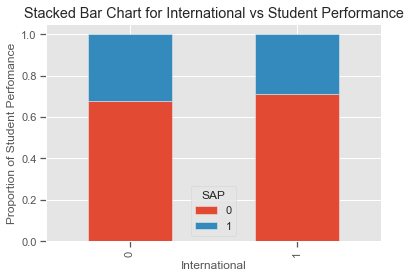

In [117]:
# Student performnce vs International
table=pd.crosstab(df.International,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for International vs Student Performance')
plt.xlabel('International')
plt.ylabel('Proportion of Student Perfomance')

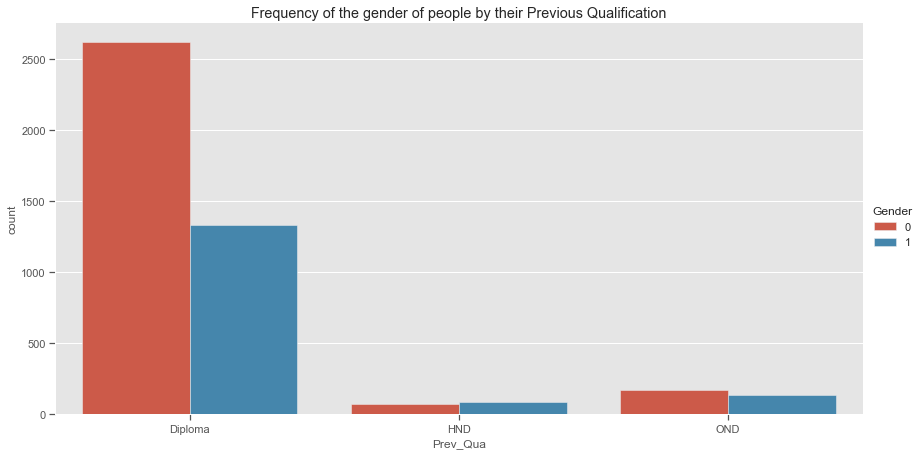

In [118]:
#Countplot showing the freqency of the gender of people by their Previous Qualification level
debtor_count = sns.catplot(x="Prev_Qua", hue = "Gender", kind="count", height=6, aspect=2, data = df)
plt.title("Frequency of the gender of people by their Previous Qualification")
plt.show()
debtor_count.savefig("debtor_count.png")

In [119]:
#The Gender level of those who are Dropout
df.groupby("SAP").get_group(0)["Gender"].value_counts()

0    2148
1     855
Name: Gender, dtype: int64

In [120]:
df.groupby('Cur_U_1st_Sem_Grade').count()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
9.800000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.000000,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
10.166667,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.200000,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.125000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.333333,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [121]:
df.groupby('Cur_U_1st_Sem_Grade').mean()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua_Grade,Mother_Occ,Father_Occ,Adm_Grade,Displaced,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,1.153203,22.224234,1.582173,6976.500000,0.869081,132.738162,11.825905,11.561281,126.817827,0.491643,...,0.006964,4.252089,3.261838,0.108635,0.689674,0.254875,11.564763,1.302368,-0.212159,0.793872
9.800000,1.000000,7.000000,1.000000,9556.000000,1.000000,130.000000,9.000000,9.000000,130.000000,1.000000,...,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000,12.700000,3.700000,-1.700000,1.000000
10.000000,1.170732,22.878049,1.500000,9209.304878,0.817073,128.231707,9.512195,8.634146,121.152439,0.439024,...,0.012195,5.365854,9.024390,1.341463,7.560017,0.146341,10.904878,1.530488,-0.573659,0.719512
10.166667,1.000000,18.000000,1.000000,9238.000000,1.000000,122.000000,9.000000,2.000000,112.600000,1.000000,...,0.000000,6.000000,10.000000,6.000000,10.500000,0.000000,12.700000,3.700000,-1.700000,0.000000
10.200000,1.250000,15.000000,1.750000,9271.750000,0.875000,128.637500,6.000000,7.500000,123.987500,0.500000,...,0.000000,5.250000,8.000000,4.000000,11.456250,0.000000,12.250000,1.137500,0.002500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1.000000,7.000000,1.000000,9003.000000,1.000000,130.000000,6.000000,2.000000,130.000000,1.000000,...,2.000000,6.000000,9.000000,6.000000,15.571429,0.000000,13.900000,-0.300000,0.790000,0.000000
17.125000,1.000000,18.000000,1.000000,9500.000000,1.000000,178.000000,4.000000,8.000000,174.700000,0.000000,...,0.000000,8.000000,8.000000,8.000000,17.587500,0.000000,13.900000,-0.300000,0.790000,0.000000
17.333333,1.000000,22.000000,1.000000,9119.000000,1.000000,154.000000,4.500000,5.500000,158.850000,0.000000,...,0.000000,5.000000,9.500000,3.000000,17.785714,0.000000,13.150000,0.100000,1.290000,0.500000


In [122]:
df.groupby('Cur_U_1st_Sem_Grade', as_index=False).agg({"Cur_U_2nd_Sem_Grade": "sum"})

,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Grade
0,0.000000,495.185714
1,9.800000,0.000000
2,10.000000,619.921429
3,10.166667,10.500000
4,10.200000,91.650000
...,...,...
800,17.111111,15.571429
801,17.125000,17.587500
802,17.333333,35.571429
803,18.000000,26.333333


In [123]:
df.groupby('Ap_Mode')['Course'].sum()

Ap_Mode
1     14760392
2        28147
5       140536
7      1256548
10       94083
15      261775
16      298149
17     7850433
18     1134858
26        9147
27        9070
39     7131778
42      709228
43     2785999
44     1871488
51      518423
53      311742
57        9991
Name: Course, dtype: int64

In [124]:
df.groupby('Age_at_Enroll')['Adm_Grade'].sum()

Age_at_Enroll
17       682.1
18    134988.7
19    114834.6
20     74892.4
21     40298.8
22     22078.7
23     13776.6
24     16457.4
25     11684.9
26     11870.6
27     11698.7
28     10467.8
29      8259.0
30      6203.3
31      7005.1
32      7526.8
33      5670.0
34      7598.1
35      6138.4
36      4402.8
37      5186.3
38      3578.2
39      4715.4
40      2901.7
41      3833.0
42      1554.4
43      3399.9
44      2734.3
45      2904.5
46      1443.0
47      2497.0
48      1300.2
49      1676.1
50      1998.1
51       954.0
52       491.8
53       917.0
54       877.2
55       608.4
57       274.0
58       375.5
59       401.9
60       240.0
61       135.1
62       103.0
70       116.4
Name: Adm_Grade, dtype: float64

#### Feature selection
Feature selection is choosing the best set of features for predictions


<AxesSubplot:>

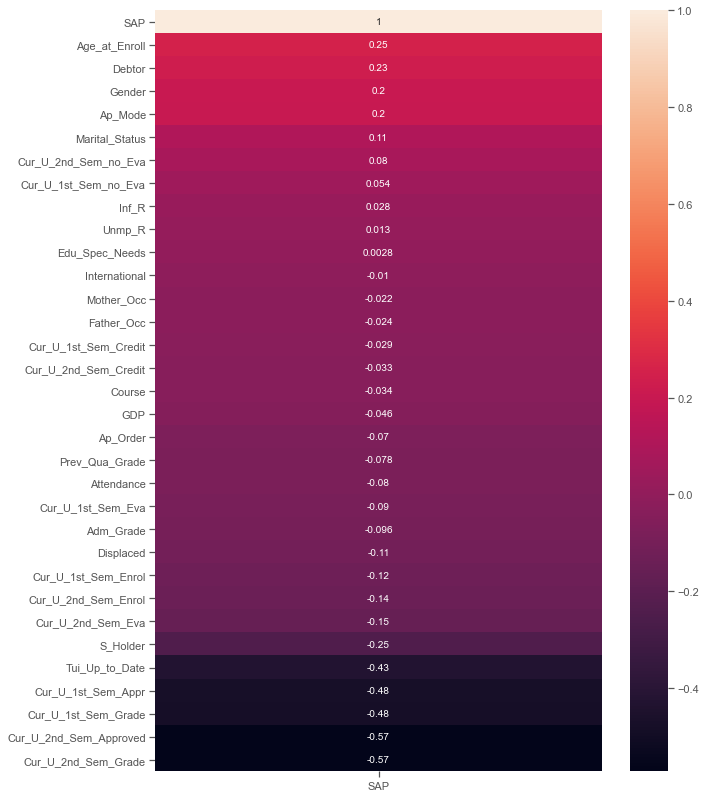

In [125]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
df_corr = df.corr()[['SAP']].sort_values(
    by='SAP', ascending=False)
sns.heatmap(df_corr, annot=True, ax=ax)

In [126]:
# Performing Feature Importance on each variable
# Feature importance gives a score for each feature in dataset, the higher the score the relevant is the feature.

data = df
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e Student Performance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: 'Diploma'

In [127]:
# creating  correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = df.corr()

In [128]:
# looping through all the columns in the correlation matrix.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # adding the columns with a correlation value of 0.7 to the
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [129]:
# checking the total length of correlated columns in our dataset
len(correlated_features)

8

In [130]:
# printing the names of the correlated features
print(correlated_features)

{'Cur_U_2nd_Sem_Eva', 'Father_Occ', 'Cur_U_2nd_Sem_Credit', 'Cur_U_1st_Sem_Appr', 'Cur_U_2nd_Sem_Grade', 'Cur_U_1st_Sem_Enrol', 'Cur_U_2nd_Sem_Approved', 'Cur_U_2nd_Sem_Enrol'}


### *Model*

The modelling phase consists of applying different machine learning techniques to the dataset. The goal of the prediction is to create a model based on the students’ current activities and accomplishments that attempts to predict learner failure and future performance. It is a typical classification problem, which a multi classification model can solve in order to predict whether a student can complete the programe or not, that is, whether a student will graduate or not.

We will choose a model that is relevant to the task at hand. Since it is a classification problem, the model selected will be one suited for the categorical data.

In [131]:
# Selecting the features to be used for modelling and dropping the unimportant ones.
new_feature=['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Region', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Grade','SAP'] 

df = df[new_feature]
df

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade,SAP
0,1,171,1,Diploma,122.0,south_west,BSC,HND,127.3,1,1,0,20,0,0.000000,0,0.000000,1
1,1,9254,1,Diploma,160.0,south_west,SSCE,SSCE,142.5,0,1,0,19,0,14.000000,0,13.666667,0
2,1,9070,1,Diploma,122.0,south_west,others,others,124.8,0,1,0,19,0,0.000000,0,0.000000,1
3,1,9773,1,Diploma,122.0,south_west,others,others,119.6,1,0,0,20,0,13.428571,0,12.400000,0
4,2,8014,0,Diploma,100.0,south_west,others,others,141.5,1,0,0,45,0,12.333333,0,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,9773,1,Diploma,125.0,south_west,SSCE,SSCE,122.2,1,1,0,19,0,13.600000,0,12.666667,0
4420,1,9773,1,Diploma,120.0,north_east,SSCE,SSCE,119.0,0,0,0,18,0,12.000000,0,11.000000,1
4421,1,9500,1,Diploma,154.0,south_west,others,others,149.5,1,0,1,30,0,14.912500,0,13.500000,1
4422,1,9147,1,Diploma,180.0,south_west,others,others,153.8,1,0,1,20,0,13.800000,0,12.000000,0


In [132]:
# Importing Machine learning Library

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from time import sleep
import random
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [133]:
from sklearn.preprocessing import LabelEncoder

le_Prev_Qua = LabelEncoder()
le_Region = LabelEncoder()
le_Mother_Qua = LabelEncoder()
le_Father_Qua = LabelEncoder()

df['Course'] = le_Father_Qua.fit_transform(df['Course'])
df['Prev_Qua'] = le_Prev_Qua.fit_transform(df['Prev_Qua'])
df['Region'] = le_Region.fit_transform(df['Region'])
df['Mother_Qua'] = le_Mother_Qua.fit_transform(df['Mother_Qua'])
df['Father_Qua'] = le_Father_Qua.fit_transform(df['Father_Qua'])

df

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade,SAP
0,1,1,1,0,122.0,4,0,1,127.3,1,1,0,20,0,0.000000,0,0.000000,1
1,1,10,1,0,160.0,4,4,4,142.5,0,1,0,19,0,14.000000,0,13.666667,0
2,1,4,1,0,122.0,4,5,5,124.8,0,1,0,19,0,0.000000,0,0.000000,1
3,1,14,1,0,122.0,4,5,5,119.6,1,0,0,20,0,13.428571,0,12.400000,0
4,2,2,0,0,100.0,4,5,5,141.5,1,0,0,45,0,12.333333,0,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,14,1,0,125.0,4,4,4,122.2,1,1,0,19,0,13.600000,0,12.666667,0
4420,1,14,1,0,120.0,1,4,4,119.0,0,0,0,18,0,12.000000,0,11.000000,1
4421,1,11,1,0,154.0,4,5,5,149.5,1,0,1,30,0,14.912500,0,13.500000,1
4422,1,8,1,0,180.0,4,5,5,153.8,1,0,1,20,0,13.800000,0,12.000000,0


In [134]:
# Split into input and output features
y = df["SAP"]
X = df[['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Region', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Grade']]
X.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
0,1,1,1,0,122.0,4,0,1,127.3,1,1,0,20,0,0.000000,0,0.000000
1,1,10,1,0,160.0,4,4,4,142.5,0,1,0,19,0,14.000000,0,13.666667
2,1,4,1,0,122.0,4,5,5,124.8,0,1,0,19,0,0.000000,0,0.000000
3,1,14,1,0,122.0,4,5,5,119.6,1,0,0,20,0,13.428571,0,12.400000
4,2,2,0,0,100.0,4,5,5,141.5,1,0,0,45,0,12.333333,0,13.000000


In [135]:
# Splitting the data into train and test. 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((3539, 17), (885, 17))

In [136]:
X_train

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
3383,2,8,1,0,130.0,4,0,4,130.0,1,0,0,35,0,0.000000,0,0.000000
2840,1,5,1,0,130.0,4,5,5,110.0,1,0,1,25,0,11.666667,0,11.333333
564,1,4,1,0,119.0,4,4,4,123.2,1,1,0,22,0,14.166667,0,13.625000
1786,2,9,1,1,133.1,4,5,5,103.5,1,1,0,42,0,0.000000,0,0.000000
3900,1,11,1,0,142.0,4,5,5,137.3,1,0,1,22,0,13.900000,0,13.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,4,1,0,134.0,4,4,0,127.7,0,0,0,18,1,11.714286,0,11.333333
466,1,15,1,0,133.0,4,4,5,131.3,1,0,0,20,0,14.333333,4,12.625000
3092,1,2,0,0,100.0,4,5,0,112.8,1,0,1,23,0,14.166667,0,12.500000
3772,1,9,1,0,127.0,4,4,5,120.4,1,0,1,19,0,13.500000,0,13.428571


In [137]:
X_test

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
1255,2,7,1,0,133.1,4,4,4,110.0,1,0,1,30,0,0.000000,0,10.000000
3458,1,9,1,0,125.0,4,4,4,119.8,1,0,0,18,0,11.571429,0,12.142857
3390,1,15,1,0,133.0,4,5,5,127.4,1,0,1,18,0,12.714286,0,12.285714
1497,1,13,1,0,110.0,4,4,4,115.3,1,1,0,19,0,13.857143,0,13.000000
1536,1,11,1,0,130.0,4,5,0,106.2,1,0,0,27,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,1,11,1,0,136.0,4,0,5,123.0,1,0,0,19,0,14.328571,0,14.328571
3281,2,2,0,0,130.0,4,3,3,140.0,0,0,0,59,10,13.333333,8,12.875000
436,1,10,1,0,122.0,4,0,0,118.2,1,0,1,20,0,11.250000,0,10.500000
1434,1,11,1,0,130.0,4,4,5,125.1,1,0,1,18,0,12.816667,0,12.875000


In [138]:
y_train

3383    1
2840    0
564     0
1786    1
3900    0
       ..
3444    1
466     0
3092    0
3772    0
860     1
Name: SAP, Length: 3539, dtype: int64

In [139]:
y_test

1255    1
3458    0
3390    0
1497    0
1536    1
       ..
3162    0
3281    1
436     0
1434    0
1361    0
Name: SAP, Length: 885, dtype: int64

## Implementing The Classification Models

We will build Six models and compare their accuracy scores. We will train the model with cross_validation which will train the data on different training set and it will calculate accuracy for all the test train split. We are printing the accuracy for all the splits in cross validation. We have passed model, data, target and cv an parameters. cv signifies the number of splits we want while performing cross validation.

In [140]:
# defining a function to fit our machine learning algorithms. 
# This will prevent writing of codes, we will functionise fitting the model and returning the accuracy scores.

# the Function that runs through the selected algorithm and returns the accuracy score
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # performing Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy score
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

###  1. Gaussian Naive Bayes

In [141]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 81.8
Accuracy CV 10-Fold: 81.66
Running Time: 0:00:16.892752


### *Inference*

The Accuracy Score gives 83.7 which means that the model has performed 84%

### 2. Linear SVC

In [142]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 83.5
Accuracy CV 10-Fold: 84.32
Running Time: 0:00:04.365696


### *Inference*

The Accuracy Score gives 76.63 which means that the model has performed 71%

### 3. Decision Tree Classifier

In [143]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 78.5
Running Time: 0:00:00.756356


### *Inference*


The Accuracy Score gives 100 which means that the model has performed really well. That is, it performed 100%

### 4. Logistic Regression

In [144]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 85.39
Accuracy CV 10-Fold: 84.83
Running Time: 0:00:00.793909


### *Inference*


The Accuracy Score gives 85.53 which means that the model has performed 86%

### 5. k-Nearest Neighbours

In [145]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 84.2
Accuracy CV 10-Fold: 80.05
Running Time: 0:00:01.469089


### *Inference*

The Accuracy Score gives 86.01 which means that the model has performed 86%

In [146]:
# View the data for the CatBoost model
X_train.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
3383,2,8,1,0,130.0,4,0,4,130.0,1,0,0,35,0,0.000000,0,0.000000
2840,1,5,1,0,130.0,4,5,5,110.0,1,0,1,25,0,11.666667,0,11.333333
564,1,4,1,0,119.0,4,4,4,123.2,1,1,0,22,0,14.166667,0,13.625000
1786,2,9,1,1,133.1,4,5,5,103.5,1,1,0,42,0,0.000000,0,0.000000
3900,1,11,1,0,142.0,4,5,5,137.3,1,0,1,22,0,13.900000,0,13.900000


In [147]:
# View the labels for the CatBoost model
y_train.head()

3383    1
2840    0
564     0
1786    1
3900    0
Name: SAP, dtype: int64

In [148]:
# Using the CatBoost Pool() function to pool together the training data and feature labels
train_pool = Pool(X_train, 
                  y_train)

In [149]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.017673
0:	learn: 0.6806003	total: 187ms	remaining: 3m 7s
1:	learn: 0.6680896	total: 197ms	remaining: 1m 38s
2:	learn: 0.6551973	total: 206ms	remaining: 1m 8s
3:	learn: 0.6432173	total: 216ms	remaining: 53.8s
4:	learn: 0.6318137	total: 224ms	remaining: 44.7s
5:	learn: 0.6228456	total: 231ms	remaining: 38.2s
6:	learn: 0.6117464	total: 238ms	remaining: 33.8s
7:	learn: 0.6025069	total: 246ms	remaining: 30.5s
8:	learn: 0.5923934	total: 254ms	remaining: 27.9s
9:	learn: 0.5835833	total: 262ms	remaining: 26s
10:	learn: 0.5753130	total: 269ms	remaining: 24.2s
11:	learn: 0.5666560	total: 278ms	remaining: 22.9s
12:	learn: 0.5591399	total: 286ms	remaining: 21.7s
13:	learn: 0.5521540	total: 293ms	remaining: 20.6s
14:	learn: 0.5444231	total: 300ms	remaining: 19.7s
15:	learn: 0.5374725	total: 307ms	remaining: 18.9s
16:	learn: 0.5308158	total: 316ms	remaining: 18.3s
17:	learn: 0.5250760	total: 326ms	remaining: 17.8s
18:	learn: 0.5183851	total: 335ms	remaining: 17.3s
19:	learn: 0

163:	learn: 0.3249756	total: 1.99s	remaining: 10.1s
164:	learn: 0.3247640	total: 2s	remaining: 10.1s
165:	learn: 0.3243912	total: 2.02s	remaining: 10.1s
166:	learn: 0.3240542	total: 2.03s	remaining: 10.1s
167:	learn: 0.3238245	total: 2.04s	remaining: 10.1s
168:	learn: 0.3234922	total: 2.05s	remaining: 10.1s
169:	learn: 0.3232614	total: 2.06s	remaining: 10.1s
170:	learn: 0.3230233	total: 2.1s	remaining: 10.2s
171:	learn: 0.3227708	total: 2.11s	remaining: 10.2s
172:	learn: 0.3225076	total: 2.12s	remaining: 10.1s
173:	learn: 0.3222724	total: 2.13s	remaining: 10.1s
174:	learn: 0.3221410	total: 2.13s	remaining: 10.1s
175:	learn: 0.3219166	total: 2.14s	remaining: 10s
176:	learn: 0.3216035	total: 2.15s	remaining: 10s
177:	learn: 0.3214112	total: 2.16s	remaining: 9.98s
178:	learn: 0.3210651	total: 2.17s	remaining: 9.96s
179:	learn: 0.3209056	total: 2.19s	remaining: 9.96s
180:	learn: 0.3206337	total: 2.2s	remaining: 9.94s
181:	learn: 0.3203946	total: 2.21s	remaining: 9.91s
182:	learn: 0.3201385

339:	learn: 0.2925193	total: 3.68s	remaining: 7.14s
340:	learn: 0.2924384	total: 3.69s	remaining: 7.13s
341:	learn: 0.2923137	total: 3.7s	remaining: 7.13s
342:	learn: 0.2921255	total: 3.71s	remaining: 7.11s
343:	learn: 0.2919935	total: 3.72s	remaining: 7.1s
344:	learn: 0.2919435	total: 3.73s	remaining: 7.08s
345:	learn: 0.2918012	total: 3.74s	remaining: 7.07s
346:	learn: 0.2916218	total: 3.75s	remaining: 7.05s
347:	learn: 0.2914395	total: 3.75s	remaining: 7.03s
348:	learn: 0.2913361	total: 3.76s	remaining: 7.01s
349:	learn: 0.2912392	total: 3.77s	remaining: 7s
350:	learn: 0.2911383	total: 3.77s	remaining: 6.98s
351:	learn: 0.2908411	total: 3.78s	remaining: 6.96s
352:	learn: 0.2907228	total: 3.79s	remaining: 6.94s
353:	learn: 0.2906384	total: 3.79s	remaining: 6.92s
354:	learn: 0.2904306	total: 3.8s	remaining: 6.91s
355:	learn: 0.2902793	total: 3.81s	remaining: 6.89s
356:	learn: 0.2900445	total: 3.82s	remaining: 6.88s
357:	learn: 0.2899520	total: 3.83s	remaining: 6.87s
358:	learn: 0.2898

502:	learn: 0.2696248	total: 5s	remaining: 4.94s
503:	learn: 0.2693963	total: 5.01s	remaining: 4.93s
504:	learn: 0.2691350	total: 5.02s	remaining: 4.92s
505:	learn: 0.2689357	total: 5.03s	remaining: 4.91s
506:	learn: 0.2688214	total: 5.08s	remaining: 4.94s
507:	learn: 0.2687493	total: 5.09s	remaining: 4.93s
508:	learn: 0.2685063	total: 5.1s	remaining: 4.92s
509:	learn: 0.2683548	total: 5.12s	remaining: 4.92s
510:	learn: 0.2681698	total: 5.13s	remaining: 4.91s
511:	learn: 0.2680658	total: 5.13s	remaining: 4.89s
512:	learn: 0.2679079	total: 5.14s	remaining: 4.88s
513:	learn: 0.2678041	total: 5.15s	remaining: 4.87s
514:	learn: 0.2677449	total: 5.16s	remaining: 4.86s
515:	learn: 0.2675413	total: 5.17s	remaining: 4.85s
516:	learn: 0.2673945	total: 5.18s	remaining: 4.83s
517:	learn: 0.2672191	total: 5.18s	remaining: 4.82s
518:	learn: 0.2670175	total: 5.2s	remaining: 4.81s
519:	learn: 0.2669110	total: 5.2s	remaining: 4.8s
520:	learn: 0.2667673	total: 5.21s	remaining: 4.79s
521:	learn: 0.26665

682:	learn: 0.2446518	total: 6.85s	remaining: 3.18s
683:	learn: 0.2445522	total: 6.86s	remaining: 3.17s
684:	learn: 0.2444135	total: 6.87s	remaining: 3.16s
685:	learn: 0.2442628	total: 6.88s	remaining: 3.15s
686:	learn: 0.2440894	total: 6.89s	remaining: 3.14s
687:	learn: 0.2439321	total: 6.89s	remaining: 3.13s
688:	learn: 0.2438349	total: 6.9s	remaining: 3.12s
689:	learn: 0.2437329	total: 6.91s	remaining: 3.1s
690:	learn: 0.2435986	total: 6.92s	remaining: 3.09s
691:	learn: 0.2434975	total: 6.93s	remaining: 3.08s
692:	learn: 0.2433477	total: 6.94s	remaining: 3.07s
693:	learn: 0.2432519	total: 6.95s	remaining: 3.06s
694:	learn: 0.2430840	total: 6.95s	remaining: 3.05s
695:	learn: 0.2429443	total: 6.96s	remaining: 3.04s
696:	learn: 0.2428499	total: 6.97s	remaining: 3.03s
697:	learn: 0.2427707	total: 6.98s	remaining: 3.02s
698:	learn: 0.2426809	total: 6.99s	remaining: 3.01s
699:	learn: 0.2425874	total: 7s	remaining: 3s
700:	learn: 0.2424420	total: 7s	remaining: 2.99s
701:	learn: 0.2423269	t

858:	learn: 0.2248795	total: 8.77s	remaining: 1.44s
859:	learn: 0.2248027	total: 8.78s	remaining: 1.43s
860:	learn: 0.2246520	total: 8.79s	remaining: 1.42s
861:	learn: 0.2245229	total: 8.81s	remaining: 1.41s
862:	learn: 0.2244294	total: 8.82s	remaining: 1.4s
863:	learn: 0.2243214	total: 8.83s	remaining: 1.39s
864:	learn: 0.2242579	total: 8.84s	remaining: 1.38s
865:	learn: 0.2241293	total: 8.85s	remaining: 1.37s
866:	learn: 0.2240117	total: 8.86s	remaining: 1.36s
867:	learn: 0.2239299	total: 8.88s	remaining: 1.35s
868:	learn: 0.2237812	total: 8.89s	remaining: 1.34s
869:	learn: 0.2236673	total: 8.9s	remaining: 1.33s
870:	learn: 0.2236180	total: 8.91s	remaining: 1.32s
871:	learn: 0.2234558	total: 8.92s	remaining: 1.31s
872:	learn: 0.2233475	total: 8.93s	remaining: 1.3s
873:	learn: 0.2232246	total: 8.93s	remaining: 1.29s
874:	learn: 0.2231403	total: 8.94s	remaining: 1.28s
875:	learn: 0.2230129	total: 8.96s	remaining: 1.27s
876:	learn: 0.2230026	total: 8.97s	remaining: 1.26s
877:	learn: 0.2

In [150]:
y_train.head()

3383    1
2840    0
564     0
1786    1
3900    0
Name: SAP, dtype: int64

In [151]:
 # Time taken?
start_time = time.time()

# params for cross-validation set same as the initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# Time taken?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6711411	test: 0.6710018	best: 0.6710018 (0)	total: 18.8ms	remaining: 18.8s
1:	learn: 0.6511055	test: 0.6502576	best: 0.6502576 (1)	total: 52ms	remaining: 26s
2:	learn: 0.6321346	test: 0.6306669	best: 0.6306669 (2)	total: 58.2ms	remaining: 19.3s
3:	learn: 0.6140887	test: 0.6115777	best: 0.6115777 (3)	total: 65.6ms	remaining: 16.3s
4:	learn: 0.5981595	test: 0.5948070	best: 0.5948070 (4)	total: 71.9ms	remaining: 14.3s
5:	learn: 0.5825356	test: 0.5786418	best: 0.5786418 (5)	total: 79.4ms	remaining: 13.2s
6:	learn: 0.5677691	test: 0.5643121	best: 0.5643121 (6)	total: 86.8ms	remaining: 12.3s
7:	learn: 0.5532306	test: 0.5494615	best: 0.5494615 (7)	total: 94.7ms	remaining: 11.7s
8:	learn: 0.5401558	test: 0.5360004	best: 0.5360004 (8)	total: 101ms	remaining: 11.1s
9:	learn: 0.5295347	test: 0.5251337	best: 0.5251337 (9)	total: 107ms	remaining: 10.6s
10:	learn: 0.5187962	test: 0.5140743	best: 0.5140743 (10)	total: 113ms	remaining: 10.2s
11:	learn: 0.5084848	tes

98:	learn: 0.3250913	test: 0.3274240	best: 0.3274240 (98)	total: 814ms	remaining: 7.41s
99:	learn: 0.3249462	test: 0.3271710	best: 0.3271710 (99)	total: 818ms	remaining: 7.37s
100:	learn: 0.3244361	test: 0.3268314	best: 0.3268314 (100)	total: 825ms	remaining: 7.34s
101:	learn: 0.3239383	test: 0.3262117	best: 0.3262117 (101)	total: 831ms	remaining: 7.32s
102:	learn: 0.3235811	test: 0.3260939	best: 0.3260939 (102)	total: 838ms	remaining: 7.3s
103:	learn: 0.3230764	test: 0.3257693	best: 0.3257693 (103)	total: 845ms	remaining: 7.28s
104:	learn: 0.3225815	test: 0.3255660	best: 0.3255660 (104)	total: 851ms	remaining: 7.25s
105:	learn: 0.3222510	test: 0.3255143	best: 0.3255143 (105)	total: 858ms	remaining: 7.23s
106:	learn: 0.3218531	test: 0.3255947	best: 0.3255143 (105)	total: 864ms	remaining: 7.21s
107:	learn: 0.3216769	test: 0.3255367	best: 0.3255143 (105)	total: 872ms	remaining: 7.2s
108:	learn: 0.3211590	test: 0.3253328	best: 0.3253328 (108)	total: 879ms	remaining: 7.19s
109:	learn: 0.32

205:	learn: 0.2919902	test: 0.3171534	best: 0.3171364 (198)	total: 1.51s	remaining: 5.81s
206:	learn: 0.2917301	test: 0.3174469	best: 0.3171364 (198)	total: 1.51s	remaining: 5.8s
207:	learn: 0.2913144	test: 0.3175511	best: 0.3171364 (198)	total: 1.52s	remaining: 5.79s
208:	learn: 0.2909250	test: 0.3175045	best: 0.3171364 (198)	total: 1.53s	remaining: 5.78s
209:	learn: 0.2906014	test: 0.3175746	best: 0.3171364 (198)	total: 1.53s	remaining: 5.77s
210:	learn: 0.2904068	test: 0.3174565	best: 0.3171364 (198)	total: 1.54s	remaining: 5.75s
211:	learn: 0.2902859	test: 0.3173814	best: 0.3171364 (198)	total: 1.54s	remaining: 5.75s
212:	learn: 0.2900221	test: 0.3174463	best: 0.3171364 (198)	total: 1.55s	remaining: 5.74s
213:	learn: 0.2898438	test: 0.3173986	best: 0.3171364 (198)	total: 1.56s	remaining: 5.73s
214:	learn: 0.2896551	test: 0.3173616	best: 0.3171364 (198)	total: 1.57s	remaining: 5.72s
215:	learn: 0.2895217	test: 0.3174857	best: 0.3171364 (198)	total: 1.57s	remaining: 5.71s
216:	learn:

301:	learn: 0.2659120	test: 0.3144584	best: 0.3141161 (274)	total: 2.4s	remaining: 5.54s
302:	learn: 0.2657688	test: 0.3144650	best: 0.3141161 (274)	total: 2.41s	remaining: 5.54s
303:	learn: 0.2655411	test: 0.3144152	best: 0.3141161 (274)	total: 2.42s	remaining: 5.55s
304:	learn: 0.2651859	test: 0.3145037	best: 0.3141161 (274)	total: 2.43s	remaining: 5.54s
305:	learn: 0.2649535	test: 0.3143700	best: 0.3141161 (274)	total: 2.44s	remaining: 5.53s
306:	learn: 0.2647862	test: 0.3145091	best: 0.3141161 (274)	total: 2.45s	remaining: 5.53s
307:	learn: 0.2646304	test: 0.3144439	best: 0.3141161 (274)	total: 2.78s	remaining: 6.24s
308:	learn: 0.2645113	test: 0.3146030	best: 0.3141161 (274)	total: 2.82s	remaining: 6.3s
309:	learn: 0.2642311	test: 0.3145045	best: 0.3141161 (274)	total: 2.92s	remaining: 6.49s
310:	learn: 0.2638286	test: 0.3143416	best: 0.3141161 (274)	total: 2.92s	remaining: 6.47s
311:	learn: 0.2635080	test: 0.3144072	best: 0.3141161 (274)	total: 2.93s	remaining: 6.47s
312:	learn: 

394:	learn: 0.2414857	test: 0.3142064	best: 0.3135404 (367)	total: 4.1s	remaining: 6.28s
395:	learn: 0.2414685	test: 0.3141571	best: 0.3135404 (367)	total: 4.1s	remaining: 6.26s
396:	learn: 0.2411789	test: 0.3142884	best: 0.3135404 (367)	total: 4.36s	remaining: 6.63s
397:	learn: 0.2409510	test: 0.3144368	best: 0.3135404 (367)	total: 4.37s	remaining: 6.61s
398:	learn: 0.2406517	test: 0.3145627	best: 0.3135404 (367)	total: 4.38s	remaining: 6.59s
399:	learn: 0.2403449	test: 0.3145320	best: 0.3135404 (367)	total: 4.38s	remaining: 6.57s
400:	learn: 0.2400797	test: 0.3144929	best: 0.3135404 (367)	total: 4.39s	remaining: 6.56s
401:	learn: 0.2399976	test: 0.3146837	best: 0.3135404 (367)	total: 4.39s	remaining: 6.54s
402:	learn: 0.2396956	test: 0.3144879	best: 0.3135404 (367)	total: 4.4s	remaining: 6.52s
403:	learn: 0.2393706	test: 0.3147024	best: 0.3135404 (367)	total: 4.41s	remaining: 6.51s
404:	learn: 0.2391096	test: 0.3147696	best: 0.3135404 (367)	total: 4.42s	remaining: 6.49s
405:	learn: 0

504:	learn: 0.2196935	test: 0.3183010	best: 0.3135404 (367)	total: 5.73s	remaining: 5.62s
505:	learn: 0.2194959	test: 0.3180000	best: 0.3135404 (367)	total: 5.74s	remaining: 5.61s
506:	learn: 0.2190478	test: 0.3181983	best: 0.3135404 (367)	total: 5.75s	remaining: 5.59s
507:	learn: 0.2186986	test: 0.3186258	best: 0.3135404 (367)	total: 5.76s	remaining: 5.58s
508:	learn: 0.2185538	test: 0.3185601	best: 0.3135404 (367)	total: 5.76s	remaining: 5.56s
509:	learn: 0.2183052	test: 0.3186994	best: 0.3135404 (367)	total: 5.77s	remaining: 5.55s
510:	learn: 0.2181213	test: 0.3187071	best: 0.3135404 (367)	total: 5.78s	remaining: 5.53s
511:	learn: 0.2178271	test: 0.3188675	best: 0.3135404 (367)	total: 5.79s	remaining: 5.52s
512:	learn: 0.2175099	test: 0.3187543	best: 0.3135404 (367)	total: 5.79s	remaining: 5.5s
513:	learn: 0.2170374	test: 0.3194194	best: 0.3135404 (367)	total: 5.8s	remaining: 5.49s
514:	learn: 0.2167830	test: 0.3195518	best: 0.3135404 (367)	total: 5.81s	remaining: 5.47s
515:	learn: 

603:	learn: 0.2013783	test: 0.3216894	best: 0.3135404 (367)	total: 6.64s	remaining: 4.35s
604:	learn: 0.2011805	test: 0.3217638	best: 0.3135404 (367)	total: 6.64s	remaining: 4.34s
605:	learn: 0.2011186	test: 0.3217561	best: 0.3135404 (367)	total: 6.65s	remaining: 4.32s
606:	learn: 0.2010271	test: 0.3215832	best: 0.3135404 (367)	total: 6.66s	remaining: 4.31s
607:	learn: 0.2009541	test: 0.3215921	best: 0.3135404 (367)	total: 6.66s	remaining: 4.3s
608:	learn: 0.2007872	test: 0.3216990	best: 0.3135404 (367)	total: 6.67s	remaining: 4.28s
609:	learn: 0.2007057	test: 0.3218893	best: 0.3135404 (367)	total: 6.68s	remaining: 4.27s
610:	learn: 0.2005546	test: 0.3219514	best: 0.3135404 (367)	total: 6.69s	remaining: 4.26s
611:	learn: 0.2005379	test: 0.3219442	best: 0.3135404 (367)	total: 6.7s	remaining: 4.25s
612:	learn: 0.2003726	test: 0.3219607	best: 0.3135404 (367)	total: 6.71s	remaining: 4.24s
613:	learn: 0.2002871	test: 0.3221089	best: 0.3135404 (367)	total: 6.71s	remaining: 4.22s
614:	learn: 

714:	learn: 0.1836018	test: 0.3234845	best: 0.3135404 (367)	total: 7.54s	remaining: 3.01s
715:	learn: 0.1833562	test: 0.3233935	best: 0.3135404 (367)	total: 7.55s	remaining: 3s
716:	learn: 0.1831635	test: 0.3232410	best: 0.3135404 (367)	total: 7.56s	remaining: 2.98s
717:	learn: 0.1829425	test: 0.3232160	best: 0.3135404 (367)	total: 7.56s	remaining: 2.97s
718:	learn: 0.1828292	test: 0.3232540	best: 0.3135404 (367)	total: 7.57s	remaining: 2.96s
719:	learn: 0.1827109	test: 0.3233962	best: 0.3135404 (367)	total: 7.58s	remaining: 2.95s
720:	learn: 0.1825977	test: 0.3234955	best: 0.3135404 (367)	total: 7.58s	remaining: 2.93s
721:	learn: 0.1824194	test: 0.3234488	best: 0.3135404 (367)	total: 7.59s	remaining: 2.92s
722:	learn: 0.1823599	test: 0.3234881	best: 0.3135404 (367)	total: 7.6s	remaining: 2.91s
723:	learn: 0.1820824	test: 0.3234932	best: 0.3135404 (367)	total: 7.6s	remaining: 2.9s
724:	learn: 0.1818590	test: 0.3235316	best: 0.3135404 (367)	total: 7.61s	remaining: 2.89s
725:	learn: 0.18

830:	learn: 0.1677748	test: 0.3245730	best: 0.3135404 (367)	total: 8.46s	remaining: 1.72s
831:	learn: 0.1676580	test: 0.3244949	best: 0.3135404 (367)	total: 8.46s	remaining: 1.71s
832:	learn: 0.1674297	test: 0.3244668	best: 0.3135404 (367)	total: 8.47s	remaining: 1.7s
833:	learn: 0.1673868	test: 0.3243906	best: 0.3135404 (367)	total: 8.48s	remaining: 1.69s
834:	learn: 0.1672706	test: 0.3243073	best: 0.3135404 (367)	total: 8.49s	remaining: 1.68s
835:	learn: 0.1671530	test: 0.3244480	best: 0.3135404 (367)	total: 8.5s	remaining: 1.67s
836:	learn: 0.1670492	test: 0.3243866	best: 0.3135404 (367)	total: 8.7s	remaining: 1.69s
837:	learn: 0.1667197	test: 0.3243673	best: 0.3135404 (367)	total: 8.71s	remaining: 1.68s
838:	learn: 0.1665224	test: 0.3242955	best: 0.3135404 (367)	total: 8.72s	remaining: 1.67s
839:	learn: 0.1664467	test: 0.3242180	best: 0.3135404 (367)	total: 8.73s	remaining: 1.66s
840:	learn: 0.1663918	test: 0.3243048	best: 0.3135404 (367)	total: 8.74s	remaining: 1.65s
841:	learn: 0

922:	learn: 0.1555716	test: 0.3271964	best: 0.3135404 (367)	total: 9.38s	remaining: 783ms
923:	learn: 0.1555546	test: 0.3271945	best: 0.3135404 (367)	total: 9.39s	remaining: 772ms
924:	learn: 0.1554409	test: 0.3272596	best: 0.3135404 (367)	total: 9.39s	remaining: 762ms
925:	learn: 0.1552390	test: 0.3272072	best: 0.3135404 (367)	total: 9.4s	remaining: 751ms
926:	learn: 0.1552065	test: 0.3271457	best: 0.3135404 (367)	total: 9.41s	remaining: 741ms
927:	learn: 0.1551991	test: 0.3271428	best: 0.3135404 (367)	total: 9.41s	remaining: 730ms
928:	learn: 0.1550776	test: 0.3270924	best: 0.3135404 (367)	total: 9.42s	remaining: 720ms
929:	learn: 0.1550431	test: 0.3270968	best: 0.3135404 (367)	total: 9.43s	remaining: 710ms
930:	learn: 0.1550127	test: 0.3271526	best: 0.3135404 (367)	total: 9.44s	remaining: 699ms
931:	learn: 0.1549132	test: 0.3270040	best: 0.3135404 (367)	total: 9.44s	remaining: 689ms
932:	learn: 0.1547335	test: 0.3270784	best: 0.3135404 (367)	total: 9.46s	remaining: 679ms
933:	learn:

33:	learn: 0.3924727	test: 0.3982721	best: 0.3982721 (33)	total: 561ms	remaining: 16s
34:	learn: 0.3899437	test: 0.3963363	best: 0.3963363 (34)	total: 570ms	remaining: 15.7s
35:	learn: 0.3873794	test: 0.3939969	best: 0.3939969 (35)	total: 576ms	remaining: 15.4s
36:	learn: 0.3853394	test: 0.3920307	best: 0.3920307 (36)	total: 583ms	remaining: 15.2s
37:	learn: 0.3833170	test: 0.3902964	best: 0.3902964 (37)	total: 589ms	remaining: 14.9s
38:	learn: 0.3809860	test: 0.3887926	best: 0.3887926 (38)	total: 922ms	remaining: 22.7s
39:	learn: 0.3787320	test: 0.3868073	best: 0.3868073 (39)	total: 928ms	remaining: 22.3s
40:	learn: 0.3769457	test: 0.3854487	best: 0.3854487 (40)	total: 936ms	remaining: 21.9s
41:	learn: 0.3752066	test: 0.3841707	best: 0.3841707 (41)	total: 942ms	remaining: 21.5s
42:	learn: 0.3727704	test: 0.3823156	best: 0.3823156 (42)	total: 948ms	remaining: 21.1s
43:	learn: 0.3705295	test: 0.3806696	best: 0.3806696 (43)	total: 954ms	remaining: 20.7s
44:	learn: 0.3686811	test: 0.37888

126:	learn: 0.3121478	test: 0.3416544	best: 0.3416544 (126)	total: 1.71s	remaining: 11.7s
127:	learn: 0.3117864	test: 0.3416224	best: 0.3416224 (127)	total: 1.72s	remaining: 11.7s
128:	learn: 0.3114114	test: 0.3411259	best: 0.3411259 (128)	total: 1.79s	remaining: 12.1s
129:	learn: 0.3112379	test: 0.3410064	best: 0.3410064 (129)	total: 1.8s	remaining: 12.1s
130:	learn: 0.3107996	test: 0.3410247	best: 0.3410064 (129)	total: 1.81s	remaining: 12s
131:	learn: 0.3103299	test: 0.3410238	best: 0.3410064 (129)	total: 1.82s	remaining: 12s
132:	learn: 0.3097378	test: 0.3412720	best: 0.3410064 (129)	total: 1.83s	remaining: 11.9s
133:	learn: 0.3094772	test: 0.3412498	best: 0.3410064 (129)	total: 1.83s	remaining: 11.9s
134:	learn: 0.3090864	test: 0.3410272	best: 0.3410064 (129)	total: 1.84s	remaining: 11.8s
135:	learn: 0.3088015	test: 0.3411335	best: 0.3410064 (129)	total: 1.85s	remaining: 11.8s
136:	learn: 0.3085574	test: 0.3412147	best: 0.3410064 (129)	total: 1.86s	remaining: 11.7s
137:	learn: 0.3

219:	learn: 0.2871487	test: 0.3374911	best: 0.3372426 (206)	total: 2.82s	remaining: 10s
220:	learn: 0.2868756	test: 0.3373456	best: 0.3372426 (206)	total: 2.83s	remaining: 9.97s
221:	learn: 0.2867130	test: 0.3373685	best: 0.3372426 (206)	total: 2.84s	remaining: 9.94s
222:	learn: 0.2865098	test: 0.3374277	best: 0.3372426 (206)	total: 2.84s	remaining: 9.91s
223:	learn: 0.2861382	test: 0.3376050	best: 0.3372426 (206)	total: 2.85s	remaining: 9.87s
224:	learn: 0.2860540	test: 0.3376182	best: 0.3372426 (206)	total: 2.86s	remaining: 9.84s
225:	learn: 0.2858960	test: 0.3374540	best: 0.3372426 (206)	total: 2.86s	remaining: 9.8s
226:	learn: 0.2856975	test: 0.3375982	best: 0.3372426 (206)	total: 2.87s	remaining: 9.78s
227:	learn: 0.2855467	test: 0.3375696	best: 0.3372426 (206)	total: 2.98s	remaining: 10.1s
228:	learn: 0.2852266	test: 0.3374406	best: 0.3372426 (206)	total: 2.98s	remaining: 10s
229:	learn: 0.2850627	test: 0.3372965	best: 0.3372426 (206)	total: 2.99s	remaining: 10s
230:	learn: 0.284

327:	learn: 0.2592129	test: 0.3371127	best: 0.3365778 (314)	total: 4.09s	remaining: 8.39s
328:	learn: 0.2589625	test: 0.3372806	best: 0.3365778 (314)	total: 4.1s	remaining: 8.37s
329:	learn: 0.2586901	test: 0.3372131	best: 0.3365778 (314)	total: 4.11s	remaining: 8.34s
330:	learn: 0.2584011	test: 0.3372428	best: 0.3365778 (314)	total: 4.12s	remaining: 8.32s
331:	learn: 0.2580455	test: 0.3373651	best: 0.3365778 (314)	total: 4.23s	remaining: 8.51s
332:	learn: 0.2577409	test: 0.3372137	best: 0.3365778 (314)	total: 4.24s	remaining: 8.49s
333:	learn: 0.2575507	test: 0.3371793	best: 0.3365778 (314)	total: 4.25s	remaining: 8.47s
334:	learn: 0.2571642	test: 0.3372608	best: 0.3365778 (314)	total: 4.26s	remaining: 8.45s
335:	learn: 0.2569717	test: 0.3371771	best: 0.3365778 (314)	total: 4.27s	remaining: 8.44s
336:	learn: 0.2567660	test: 0.3371621	best: 0.3365778 (314)	total: 4.28s	remaining: 8.42s
337:	learn: 0.2566038	test: 0.3374454	best: 0.3365778 (314)	total: 4.29s	remaining: 8.4s
338:	learn: 

420:	learn: 0.2361927	test: 0.3427261	best: 0.3365778 (314)	total: 5.46s	remaining: 7.5s
421:	learn: 0.2360437	test: 0.3427875	best: 0.3365778 (314)	total: 5.46s	remaining: 7.48s
422:	learn: 0.2359066	test: 0.3428239	best: 0.3365778 (314)	total: 5.47s	remaining: 7.46s
423:	learn: 0.2356260	test: 0.3428498	best: 0.3365778 (314)	total: 5.47s	remaining: 7.44s
424:	learn: 0.2354018	test: 0.3428386	best: 0.3365778 (314)	total: 5.48s	remaining: 7.41s
425:	learn: 0.2350354	test: 0.3431165	best: 0.3365778 (314)	total: 5.49s	remaining: 7.39s
426:	learn: 0.2347550	test: 0.3432203	best: 0.3365778 (314)	total: 5.49s	remaining: 7.37s
427:	learn: 0.2345765	test: 0.3432635	best: 0.3365778 (314)	total: 5.5s	remaining: 7.35s
428:	learn: 0.2343802	test: 0.3432229	best: 0.3365778 (314)	total: 5.5s	remaining: 7.33s
429:	learn: 0.2342696	test: 0.3431655	best: 0.3365778 (314)	total: 5.51s	remaining: 7.3s
430:	learn: 0.2339961	test: 0.3430682	best: 0.3365778 (314)	total: 5.52s	remaining: 7.28s
431:	learn: 0.

528:	learn: 0.2153184	test: 0.3444484	best: 0.3365778 (314)	total: 6.71s	remaining: 5.97s
529:	learn: 0.2151940	test: 0.3446544	best: 0.3365778 (314)	total: 6.71s	remaining: 5.95s
530:	learn: 0.2149223	test: 0.3448489	best: 0.3365778 (314)	total: 6.74s	remaining: 5.95s
531:	learn: 0.2146261	test: 0.3450962	best: 0.3365778 (314)	total: 6.74s	remaining: 5.93s
532:	learn: 0.2145281	test: 0.3450498	best: 0.3365778 (314)	total: 6.75s	remaining: 5.91s
533:	learn: 0.2144156	test: 0.3450692	best: 0.3365778 (314)	total: 6.75s	remaining: 5.89s
534:	learn: 0.2142398	test: 0.3452354	best: 0.3365778 (314)	total: 6.76s	remaining: 5.88s
535:	learn: 0.2140536	test: 0.3452343	best: 0.3365778 (314)	total: 6.77s	remaining: 5.86s
536:	learn: 0.2139338	test: 0.3452475	best: 0.3365778 (314)	total: 6.78s	remaining: 5.84s
537:	learn: 0.2138414	test: 0.3451973	best: 0.3365778 (314)	total: 6.79s	remaining: 5.83s
538:	learn: 0.2136443	test: 0.3450724	best: 0.3365778 (314)	total: 6.79s	remaining: 5.81s
539:	learn

631:	learn: 0.1973324	test: 0.3464960	best: 0.3365778 (314)	total: 7.94s	remaining: 4.62s
632:	learn: 0.1971609	test: 0.3464042	best: 0.3365778 (314)	total: 7.96s	remaining: 4.62s
633:	learn: 0.1969421	test: 0.3463720	best: 0.3365778 (314)	total: 7.97s	remaining: 4.6s
634:	learn: 0.1967315	test: 0.3464548	best: 0.3365778 (314)	total: 7.99s	remaining: 4.59s
635:	learn: 0.1964173	test: 0.3461063	best: 0.3365778 (314)	total: 8.02s	remaining: 4.59s
636:	learn: 0.1962877	test: 0.3463022	best: 0.3365778 (314)	total: 8.03s	remaining: 4.58s
637:	learn: 0.1960206	test: 0.3464634	best: 0.3365778 (314)	total: 8.04s	remaining: 4.56s
638:	learn: 0.1959160	test: 0.3465964	best: 0.3365778 (314)	total: 8.05s	remaining: 4.55s
639:	learn: 0.1957060	test: 0.3466616	best: 0.3365778 (314)	total: 8.05s	remaining: 4.53s
640:	learn: 0.1954885	test: 0.3465252	best: 0.3365778 (314)	total: 8.06s	remaining: 4.51s
641:	learn: 0.1953536	test: 0.3464950	best: 0.3365778 (314)	total: 8.07s	remaining: 4.5s
642:	learn: 

735:	learn: 0.1814545	test: 0.3504931	best: 0.3365778 (314)	total: 9.14s	remaining: 3.28s
736:	learn: 0.1812933	test: 0.3507614	best: 0.3365778 (314)	total: 9.15s	remaining: 3.26s
737:	learn: 0.1811150	test: 0.3507819	best: 0.3365778 (314)	total: 9.15s	remaining: 3.25s
738:	learn: 0.1808462	test: 0.3506423	best: 0.3365778 (314)	total: 9.16s	remaining: 3.23s
739:	learn: 0.1806014	test: 0.3507287	best: 0.3365778 (314)	total: 9.17s	remaining: 3.22s
740:	learn: 0.1805476	test: 0.3507135	best: 0.3365778 (314)	total: 9.17s	remaining: 3.21s
741:	learn: 0.1804708	test: 0.3508404	best: 0.3365778 (314)	total: 9.18s	remaining: 3.19s
742:	learn: 0.1803440	test: 0.3508393	best: 0.3365778 (314)	total: 9.19s	remaining: 3.18s
743:	learn: 0.1801762	test: 0.3509819	best: 0.3365778 (314)	total: 9.2s	remaining: 3.16s
744:	learn: 0.1799329	test: 0.3509453	best: 0.3365778 (314)	total: 9.2s	remaining: 3.15s
745:	learn: 0.1798279	test: 0.3510151	best: 0.3365778 (314)	total: 9.21s	remaining: 3.14s
746:	learn: 

839:	learn: 0.1673255	test: 0.3493615	best: 0.3365778 (314)	total: 9.84s	remaining: 1.87s
840:	learn: 0.1672171	test: 0.3494038	best: 0.3365778 (314)	total: 9.85s	remaining: 1.86s
841:	learn: 0.1671027	test: 0.3494145	best: 0.3365778 (314)	total: 9.85s	remaining: 1.85s
842:	learn: 0.1669975	test: 0.3494494	best: 0.3365778 (314)	total: 9.86s	remaining: 1.84s
843:	learn: 0.1667838	test: 0.3491249	best: 0.3365778 (314)	total: 9.94s	remaining: 1.84s
844:	learn: 0.1666536	test: 0.3490266	best: 0.3365778 (314)	total: 9.95s	remaining: 1.82s
845:	learn: 0.1664875	test: 0.3490595	best: 0.3365778 (314)	total: 9.96s	remaining: 1.81s
846:	learn: 0.1662772	test: 0.3493780	best: 0.3365778 (314)	total: 10.3s	remaining: 1.85s
847:	learn: 0.1661460	test: 0.3495704	best: 0.3365778 (314)	total: 10.3s	remaining: 1.84s
848:	learn: 0.1660618	test: 0.3494857	best: 0.3365778 (314)	total: 10.3s	remaining: 1.83s
849:	learn: 0.1659320	test: 0.3496417	best: 0.3365778 (314)	total: 10.4s	remaining: 1.83s
850:	learn

948:	learn: 0.1540822	test: 0.3509072	best: 0.3365778 (314)	total: 11.2s	remaining: 599ms
949:	learn: 0.1539347	test: 0.3508907	best: 0.3365778 (314)	total: 11.2s	remaining: 587ms
950:	learn: 0.1538086	test: 0.3509915	best: 0.3365778 (314)	total: 11.2s	remaining: 575ms
951:	learn: 0.1536651	test: 0.3510189	best: 0.3365778 (314)	total: 11.2s	remaining: 563ms
952:	learn: 0.1535591	test: 0.3510676	best: 0.3365778 (314)	total: 11.2s	remaining: 551ms
953:	learn: 0.1534649	test: 0.3511052	best: 0.3365778 (314)	total: 11.2s	remaining: 539ms
954:	learn: 0.1533284	test: 0.3512482	best: 0.3365778 (314)	total: 11.2s	remaining: 527ms
955:	learn: 0.1532048	test: 0.3513576	best: 0.3365778 (314)	total: 11.2s	remaining: 516ms
956:	learn: 0.1530976	test: 0.3512863	best: 0.3365778 (314)	total: 11.2s	remaining: 504ms
957:	learn: 0.1528932	test: 0.3513533	best: 0.3365778 (314)	total: 11.2s	remaining: 492ms
958:	learn: 0.1528458	test: 0.3514356	best: 0.3365778 (314)	total: 11.2s	remaining: 480ms
959:	learn

42:	learn: 0.3671915	test: 0.4000982	best: 0.4000982 (42)	total: 324ms	remaining: 7.2s
43:	learn: 0.3652091	test: 0.3984771	best: 0.3984771 (43)	total: 330ms	remaining: 7.17s
44:	learn: 0.3636157	test: 0.3976458	best: 0.3976458 (44)	total: 339ms	remaining: 7.18s
45:	learn: 0.3617531	test: 0.3960619	best: 0.3960619 (45)	total: 350ms	remaining: 7.25s
46:	learn: 0.3599515	test: 0.3953088	best: 0.3953088 (46)	total: 360ms	remaining: 7.3s
47:	learn: 0.3585203	test: 0.3942150	best: 0.3942150 (47)	total: 371ms	remaining: 7.37s
48:	learn: 0.3571692	test: 0.3935777	best: 0.3935777 (48)	total: 382ms	remaining: 7.42s
49:	learn: 0.3556253	test: 0.3918651	best: 0.3918651 (49)	total: 393ms	remaining: 7.47s
50:	learn: 0.3541089	test: 0.3908941	best: 0.3908941 (50)	total: 405ms	remaining: 7.53s
51:	learn: 0.3527917	test: 0.3897870	best: 0.3897870 (51)	total: 415ms	remaining: 7.57s
52:	learn: 0.3517810	test: 0.3891319	best: 0.3891319 (52)	total: 426ms	remaining: 7.61s
53:	learn: 0.3504446	test: 0.38831

141:	learn: 0.3028027	test: 0.3691290	best: 0.3691071 (138)	total: 2.09s	remaining: 12.6s
142:	learn: 0.3026121	test: 0.3687523	best: 0.3687523 (142)	total: 2.1s	remaining: 12.6s
143:	learn: 0.3022521	test: 0.3682975	best: 0.3682975 (143)	total: 2.11s	remaining: 12.5s
144:	learn: 0.3018471	test: 0.3682500	best: 0.3682500 (144)	total: 2.12s	remaining: 12.5s
145:	learn: 0.3015638	test: 0.3683636	best: 0.3682500 (144)	total: 2.12s	remaining: 12.4s
146:	learn: 0.3013708	test: 0.3682684	best: 0.3682500 (144)	total: 2.13s	remaining: 12.4s
147:	learn: 0.3011472	test: 0.3681915	best: 0.3681915 (147)	total: 2.14s	remaining: 12.3s
148:	learn: 0.3006418	test: 0.3677358	best: 0.3677358 (148)	total: 2.14s	remaining: 12.2s
149:	learn: 0.3003932	test: 0.3675549	best: 0.3675549 (149)	total: 2.15s	remaining: 12.2s
150:	learn: 0.3000650	test: 0.3673317	best: 0.3673317 (150)	total: 2.16s	remaining: 12.1s
151:	learn: 0.2998325	test: 0.3673707	best: 0.3673317 (150)	total: 2.17s	remaining: 12.1s
152:	learn:

239:	learn: 0.2771959	test: 0.3624981	best: 0.3624645 (237)	total: 3.44s	remaining: 10.9s
240:	learn: 0.2769089	test: 0.3625383	best: 0.3624645 (237)	total: 3.44s	remaining: 10.9s
241:	learn: 0.2767058	test: 0.3625051	best: 0.3624645 (237)	total: 3.46s	remaining: 10.8s
242:	learn: 0.2764558	test: 0.3623969	best: 0.3623969 (242)	total: 3.46s	remaining: 10.8s
243:	learn: 0.2759521	test: 0.3625208	best: 0.3623969 (242)	total: 3.47s	remaining: 10.8s
244:	learn: 0.2756380	test: 0.3627716	best: 0.3623969 (242)	total: 3.48s	remaining: 10.7s
245:	learn: 0.2754453	test: 0.3627393	best: 0.3623969 (242)	total: 3.48s	remaining: 10.7s
246:	learn: 0.2750747	test: 0.3625752	best: 0.3623969 (242)	total: 3.49s	remaining: 10.7s
247:	learn: 0.2749011	test: 0.3624946	best: 0.3623969 (242)	total: 3.5s	remaining: 10.6s
248:	learn: 0.2746255	test: 0.3626408	best: 0.3623969 (242)	total: 3.51s	remaining: 10.6s
249:	learn: 0.2744253	test: 0.3625020	best: 0.3623969 (242)	total: 3.52s	remaining: 10.5s
250:	learn:

343:	learn: 0.2522348	test: 0.3560706	best: 0.3558867 (340)	total: 4.63s	remaining: 8.82s
344:	learn: 0.2521205	test: 0.3559221	best: 0.3558867 (340)	total: 4.67s	remaining: 8.88s
345:	learn: 0.2517047	test: 0.3557892	best: 0.3557892 (345)	total: 4.88s	remaining: 9.23s
346:	learn: 0.2514516	test: 0.3557388	best: 0.3557388 (346)	total: 4.89s	remaining: 9.2s
347:	learn: 0.2512937	test: 0.3556440	best: 0.3556440 (347)	total: 4.9s	remaining: 9.17s
348:	learn: 0.2510823	test: 0.3556696	best: 0.3556440 (347)	total: 4.9s	remaining: 9.15s
349:	learn: 0.2510056	test: 0.3556226	best: 0.3556226 (349)	total: 4.91s	remaining: 9.12s
350:	learn: 0.2506872	test: 0.3557179	best: 0.3556226 (349)	total: 4.92s	remaining: 9.09s
351:	learn: 0.2505220	test: 0.3557114	best: 0.3556226 (349)	total: 4.92s	remaining: 9.06s
352:	learn: 0.2504661	test: 0.3555771	best: 0.3555771 (352)	total: 4.93s	remaining: 9.03s
353:	learn: 0.2501627	test: 0.3554015	best: 0.3554015 (353)	total: 4.93s	remaining: 9.01s
354:	learn: 0

437:	learn: 0.2318297	test: 0.3523312	best: 0.3519929 (436)	total: 5.69s	remaining: 7.3s
438:	learn: 0.2314427	test: 0.3525917	best: 0.3519929 (436)	total: 5.7s	remaining: 7.29s
439:	learn: 0.2313680	test: 0.3526230	best: 0.3519929 (436)	total: 5.71s	remaining: 7.26s
440:	learn: 0.2310256	test: 0.3525223	best: 0.3519929 (436)	total: 5.71s	remaining: 7.25s
441:	learn: 0.2308697	test: 0.3525191	best: 0.3519929 (436)	total: 5.72s	remaining: 7.22s
442:	learn: 0.2307408	test: 0.3525446	best: 0.3519929 (436)	total: 5.76s	remaining: 7.24s
443:	learn: 0.2305587	test: 0.3525405	best: 0.3519929 (436)	total: 5.77s	remaining: 7.22s
444:	learn: 0.2303480	test: 0.3526903	best: 0.3519929 (436)	total: 5.77s	remaining: 7.2s
445:	learn: 0.2301146	test: 0.3528320	best: 0.3519929 (436)	total: 5.78s	remaining: 7.18s
446:	learn: 0.2298317	test: 0.3526285	best: 0.3519929 (436)	total: 5.79s	remaining: 7.16s
447:	learn: 0.2296026	test: 0.3527056	best: 0.3519929 (436)	total: 5.79s	remaining: 7.13s
448:	learn: 0

536:	learn: 0.2136870	test: 0.3518095	best: 0.3516523 (512)	total: 6.87s	remaining: 5.92s
537:	learn: 0.2133831	test: 0.3521438	best: 0.3516523 (512)	total: 6.87s	remaining: 5.9s
538:	learn: 0.2131878	test: 0.3522726	best: 0.3516523 (512)	total: 6.88s	remaining: 5.88s
539:	learn: 0.2130542	test: 0.3521856	best: 0.3516523 (512)	total: 6.89s	remaining: 5.87s
540:	learn: 0.2129351	test: 0.3522540	best: 0.3516523 (512)	total: 6.9s	remaining: 5.85s
541:	learn: 0.2128485	test: 0.3520727	best: 0.3516523 (512)	total: 6.91s	remaining: 5.84s
542:	learn: 0.2127803	test: 0.3520611	best: 0.3516523 (512)	total: 6.91s	remaining: 5.82s
543:	learn: 0.2127270	test: 0.3520838	best: 0.3516523 (512)	total: 6.92s	remaining: 5.8s
544:	learn: 0.2126103	test: 0.3520231	best: 0.3516523 (512)	total: 6.93s	remaining: 5.78s
545:	learn: 0.2122461	test: 0.3514584	best: 0.3514584 (545)	total: 6.93s	remaining: 5.76s
546:	learn: 0.2119504	test: 0.3513152	best: 0.3513152 (546)	total: 6.94s	remaining: 5.75s
547:	learn: 0

631:	learn: 0.1973577	test: 0.3523864	best: 0.3509146 (548)	total: 8.29s	remaining: 4.83s
632:	learn: 0.1972065	test: 0.3526133	best: 0.3509146 (548)	total: 8.29s	remaining: 4.81s
633:	learn: 0.1970600	test: 0.3526803	best: 0.3509146 (548)	total: 8.3s	remaining: 4.79s
634:	learn: 0.1970298	test: 0.3525980	best: 0.3509146 (548)	total: 8.31s	remaining: 4.78s
635:	learn: 0.1968401	test: 0.3523027	best: 0.3509146 (548)	total: 8.31s	remaining: 4.76s
636:	learn: 0.1967688	test: 0.3523158	best: 0.3509146 (548)	total: 8.32s	remaining: 4.74s
637:	learn: 0.1966662	test: 0.3523342	best: 0.3509146 (548)	total: 8.33s	remaining: 4.72s
638:	learn: 0.1964938	test: 0.3523278	best: 0.3509146 (548)	total: 8.33s	remaining: 4.71s
639:	learn: 0.1964245	test: 0.3523402	best: 0.3509146 (548)	total: 8.35s	remaining: 4.7s
640:	learn: 0.1963772	test: 0.3523936	best: 0.3509146 (548)	total: 8.38s	remaining: 4.69s
641:	learn: 0.1962624	test: 0.3525338	best: 0.3509146 (548)	total: 8.39s	remaining: 4.68s
642:	learn: 

731:	learn: 0.1818569	test: 0.3546033	best: 0.3509146 (548)	total: 9.35s	remaining: 3.42s
732:	learn: 0.1817821	test: 0.3545481	best: 0.3509146 (548)	total: 9.47s	remaining: 3.45s
733:	learn: 0.1815814	test: 0.3546931	best: 0.3509146 (548)	total: 9.48s	remaining: 3.43s
734:	learn: 0.1814700	test: 0.3547183	best: 0.3509146 (548)	total: 9.48s	remaining: 3.42s
735:	learn: 0.1812694	test: 0.3547093	best: 0.3509146 (548)	total: 9.49s	remaining: 3.4s
736:	learn: 0.1811335	test: 0.3546370	best: 0.3509146 (548)	total: 9.5s	remaining: 3.39s
737:	learn: 0.1809657	test: 0.3546737	best: 0.3509146 (548)	total: 9.51s	remaining: 3.37s
738:	learn: 0.1808255	test: 0.3547609	best: 0.3509146 (548)	total: 9.51s	remaining: 3.36s
739:	learn: 0.1807019	test: 0.3547358	best: 0.3509146 (548)	total: 9.52s	remaining: 3.34s
740:	learn: 0.1806448	test: 0.3547873	best: 0.3509146 (548)	total: 9.52s	remaining: 3.33s
741:	learn: 0.1805657	test: 0.3548592	best: 0.3509146 (548)	total: 9.53s	remaining: 3.31s
742:	learn: 

833:	learn: 0.1682807	test: 0.3563881	best: 0.3509146 (548)	total: 10.3s	remaining: 2.04s
834:	learn: 0.1680840	test: 0.3566818	best: 0.3509146 (548)	total: 10.3s	remaining: 2.03s
835:	learn: 0.1680652	test: 0.3566738	best: 0.3509146 (548)	total: 10.3s	remaining: 2.02s
836:	learn: 0.1678325	test: 0.3568752	best: 0.3509146 (548)	total: 10.3s	remaining: 2s
837:	learn: 0.1678183	test: 0.3568763	best: 0.3509146 (548)	total: 10.3s	remaining: 1.99s
838:	learn: 0.1677214	test: 0.3567152	best: 0.3509146 (548)	total: 10.3s	remaining: 1.98s
839:	learn: 0.1676409	test: 0.3566539	best: 0.3509146 (548)	total: 10.3s	remaining: 1.96s
840:	learn: 0.1674940	test: 0.3566763	best: 0.3509146 (548)	total: 10.3s	remaining: 1.95s
841:	learn: 0.1673463	test: 0.3566325	best: 0.3509146 (548)	total: 10.3s	remaining: 1.94s
842:	learn: 0.1671385	test: 0.3566160	best: 0.3509146 (548)	total: 10.3s	remaining: 1.92s
843:	learn: 0.1670262	test: 0.3567827	best: 0.3509146 (548)	total: 10.3s	remaining: 1.91s
844:	learn: 0

937:	learn: 0.1553912	test: 0.3593190	best: 0.3509146 (548)	total: 11.5s	remaining: 762ms
938:	learn: 0.1552971	test: 0.3593772	best: 0.3509146 (548)	total: 11.5s	remaining: 749ms
939:	learn: 0.1551966	test: 0.3594996	best: 0.3509146 (548)	total: 11.5s	remaining: 737ms
940:	learn: 0.1550825	test: 0.3595736	best: 0.3509146 (548)	total: 11.5s	remaining: 724ms
941:	learn: 0.1548887	test: 0.3592475	best: 0.3509146 (548)	total: 11.6s	remaining: 711ms
942:	learn: 0.1547695	test: 0.3592741	best: 0.3509146 (548)	total: 11.6s	remaining: 699ms
943:	learn: 0.1545818	test: 0.3590625	best: 0.3509146 (548)	total: 11.6s	remaining: 686ms
944:	learn: 0.1545378	test: 0.3591365	best: 0.3509146 (548)	total: 11.6s	remaining: 675ms
945:	learn: 0.1543605	test: 0.3592632	best: 0.3509146 (548)	total: 11.6s	remaining: 663ms
946:	learn: 0.1542688	test: 0.3593546	best: 0.3509146 (548)	total: 11.6s	remaining: 650ms
947:	learn: 0.1540449	test: 0.3592740	best: 0.3509146 (548)	total: 11.6s	remaining: 638ms
948:	learn

46:	learn: 0.3602828	test: 0.3843960	best: 0.3843960 (46)	total: 562ms	remaining: 11.4s
47:	learn: 0.3587142	test: 0.3835542	best: 0.3835542 (47)	total: 620ms	remaining: 12.3s
48:	learn: 0.3573366	test: 0.3821759	best: 0.3821759 (48)	total: 743ms	remaining: 14.4s
49:	learn: 0.3554986	test: 0.3814934	best: 0.3814934 (49)	total: 749ms	remaining: 14.2s
50:	learn: 0.3539601	test: 0.3805234	best: 0.3805234 (50)	total: 755ms	remaining: 14.1s
51:	learn: 0.3528030	test: 0.3802220	best: 0.3802220 (51)	total: 761ms	remaining: 13.9s
52:	learn: 0.3518929	test: 0.3796638	best: 0.3796638 (52)	total: 767ms	remaining: 13.7s
53:	learn: 0.3507270	test: 0.3784865	best: 0.3784865 (53)	total: 773ms	remaining: 13.5s
54:	learn: 0.3496351	test: 0.3774084	best: 0.3774084 (54)	total: 779ms	remaining: 13.4s
55:	learn: 0.3485832	test: 0.3768808	best: 0.3768808 (55)	total: 785ms	remaining: 13.2s
56:	learn: 0.3474077	test: 0.3757550	best: 0.3757550 (56)	total: 791ms	remaining: 13.1s
57:	learn: 0.3462024	test: 0.375

153:	learn: 0.2991392	test: 0.3582447	best: 0.3582447 (153)	total: 2.18s	remaining: 12s
154:	learn: 0.2989577	test: 0.3581752	best: 0.3581752 (154)	total: 2.19s	remaining: 12s
155:	learn: 0.2987502	test: 0.3580140	best: 0.3580140 (155)	total: 2.2s	remaining: 11.9s
156:	learn: 0.2984794	test: 0.3581677	best: 0.3580140 (155)	total: 2.21s	remaining: 11.8s
157:	learn: 0.2982578	test: 0.3579738	best: 0.3579738 (157)	total: 2.21s	remaining: 11.8s
158:	learn: 0.2980231	test: 0.3578816	best: 0.3578816 (158)	total: 2.22s	remaining: 11.7s
159:	learn: 0.2976776	test: 0.3578059	best: 0.3578059 (159)	total: 2.22s	remaining: 11.7s
160:	learn: 0.2972435	test: 0.3580121	best: 0.3578059 (159)	total: 2.23s	remaining: 11.6s
161:	learn: 0.2971002	test: 0.3580638	best: 0.3578059 (159)	total: 2.23s	remaining: 11.6s
162:	learn: 0.2968796	test: 0.3580302	best: 0.3578059 (159)	total: 2.24s	remaining: 11.5s
163:	learn: 0.2964998	test: 0.3579707	best: 0.3578059 (159)	total: 2.25s	remaining: 11.5s
164:	learn: 0.2

248:	learn: 0.2754275	test: 0.3555424	best: 0.3554482 (227)	total: 3.36s	remaining: 10.1s
249:	learn: 0.2751565	test: 0.3553974	best: 0.3553974 (249)	total: 3.61s	remaining: 10.8s
250:	learn: 0.2748342	test: 0.3552923	best: 0.3552923 (250)	total: 3.68s	remaining: 11s
251:	learn: 0.2746035	test: 0.3549435	best: 0.3549435 (251)	total: 3.71s	remaining: 11s
252:	learn: 0.2745190	test: 0.3548287	best: 0.3548287 (252)	total: 3.72s	remaining: 11s
253:	learn: 0.2742201	test: 0.3548264	best: 0.3548264 (253)	total: 3.73s	remaining: 10.9s
254:	learn: 0.2740555	test: 0.3545848	best: 0.3545848 (254)	total: 3.77s	remaining: 11s
255:	learn: 0.2738289	test: 0.3545474	best: 0.3545474 (255)	total: 3.78s	remaining: 11s
256:	learn: 0.2736453	test: 0.3543831	best: 0.3543831 (256)	total: 3.79s	remaining: 11s
257:	learn: 0.2734135	test: 0.3543521	best: 0.3543521 (257)	total: 3.8s	remaining: 10.9s
258:	learn: 0.2732949	test: 0.3545756	best: 0.3543521 (257)	total: 3.8s	remaining: 10.9s
259:	learn: 0.2730602	te

349:	learn: 0.2505677	test: 0.3576116	best: 0.3543521 (257)	total: 4.61s	remaining: 8.55s
350:	learn: 0.2502222	test: 0.3577279	best: 0.3543521 (257)	total: 4.89s	remaining: 9.04s
351:	learn: 0.2498466	test: 0.3575413	best: 0.3543521 (257)	total: 5.12s	remaining: 9.42s
352:	learn: 0.2495817	test: 0.3575022	best: 0.3543521 (257)	total: 5.14s	remaining: 9.42s
353:	learn: 0.2494234	test: 0.3577051	best: 0.3543521 (257)	total: 5.15s	remaining: 9.4s
354:	learn: 0.2492938	test: 0.3575716	best: 0.3543521 (257)	total: 5.16s	remaining: 9.38s
355:	learn: 0.2490490	test: 0.3574671	best: 0.3543521 (257)	total: 5.17s	remaining: 9.35s
356:	learn: 0.2486952	test: 0.3574182	best: 0.3543521 (257)	total: 5.18s	remaining: 9.33s
357:	learn: 0.2484140	test: 0.3575014	best: 0.3543521 (257)	total: 5.18s	remaining: 9.3s
358:	learn: 0.2481395	test: 0.3577277	best: 0.3543521 (257)	total: 5.19s	remaining: 9.27s
359:	learn: 0.2479013	test: 0.3580060	best: 0.3543521 (257)	total: 5.2s	remaining: 9.24s
360:	learn: 0

461:	learn: 0.2257636	test: 0.3611330	best: 0.3543521 (257)	total: 6.16s	remaining: 7.17s
462:	learn: 0.2255035	test: 0.3610680	best: 0.3543521 (257)	total: 6.16s	remaining: 7.15s
463:	learn: 0.2253675	test: 0.3610859	best: 0.3543521 (257)	total: 6.17s	remaining: 7.13s
464:	learn: 0.2251885	test: 0.3609880	best: 0.3543521 (257)	total: 6.18s	remaining: 7.11s
465:	learn: 0.2249382	test: 0.3609078	best: 0.3543521 (257)	total: 6.18s	remaining: 7.09s
466:	learn: 0.2248041	test: 0.3609695	best: 0.3543521 (257)	total: 6.19s	remaining: 7.07s
467:	learn: 0.2245392	test: 0.3606345	best: 0.3543521 (257)	total: 6.2s	remaining: 7.04s
468:	learn: 0.2244282	test: 0.3606738	best: 0.3543521 (257)	total: 6.2s	remaining: 7.02s
469:	learn: 0.2243412	test: 0.3608080	best: 0.3543521 (257)	total: 6.21s	remaining: 7s
470:	learn: 0.2241868	test: 0.3609891	best: 0.3543521 (257)	total: 6.22s	remaining: 6.98s
471:	learn: 0.2239539	test: 0.3607144	best: 0.3543521 (257)	total: 6.22s	remaining: 6.96s
472:	learn: 0.2

559:	learn: 0.2084188	test: 0.3642946	best: 0.3543521 (257)	total: 7.53s	remaining: 5.92s
560:	learn: 0.2082547	test: 0.3643131	best: 0.3543521 (257)	total: 7.54s	remaining: 5.9s
561:	learn: 0.2081021	test: 0.3643342	best: 0.3543521 (257)	total: 7.54s	remaining: 5.88s
562:	learn: 0.2079503	test: 0.3644334	best: 0.3543521 (257)	total: 7.55s	remaining: 5.86s
563:	learn: 0.2077493	test: 0.3646198	best: 0.3543521 (257)	total: 7.55s	remaining: 5.84s
564:	learn: 0.2075608	test: 0.3647888	best: 0.3543521 (257)	total: 7.56s	remaining: 5.82s
565:	learn: 0.2075369	test: 0.3647769	best: 0.3543521 (257)	total: 7.57s	remaining: 5.8s
566:	learn: 0.2073972	test: 0.3652041	best: 0.3543521 (257)	total: 7.57s	remaining: 5.78s
567:	learn: 0.2070475	test: 0.3651156	best: 0.3543521 (257)	total: 7.58s	remaining: 5.76s
568:	learn: 0.2068595	test: 0.3651345	best: 0.3543521 (257)	total: 7.58s	remaining: 5.74s
569:	learn: 0.2065407	test: 0.3652958	best: 0.3543521 (257)	total: 7.59s	remaining: 5.73s
570:	learn: 

658:	learn: 0.1925132	test: 0.3687422	best: 0.3543521 (257)	total: 9.24s	remaining: 4.78s
659:	learn: 0.1924123	test: 0.3686859	best: 0.3543521 (257)	total: 9.25s	remaining: 4.76s
660:	learn: 0.1921854	test: 0.3690051	best: 0.3543521 (257)	total: 9.26s	remaining: 4.75s
661:	learn: 0.1921249	test: 0.3690704	best: 0.3543521 (257)	total: 9.27s	remaining: 4.73s
662:	learn: 0.1918834	test: 0.3691614	best: 0.3543521 (257)	total: 9.28s	remaining: 4.72s
663:	learn: 0.1916657	test: 0.3688864	best: 0.3543521 (257)	total: 9.29s	remaining: 4.7s
664:	learn: 0.1914844	test: 0.3687100	best: 0.3543521 (257)	total: 9.3s	remaining: 4.68s
665:	learn: 0.1913973	test: 0.3684923	best: 0.3543521 (257)	total: 9.31s	remaining: 4.67s
666:	learn: 0.1911588	test: 0.3684199	best: 0.3543521 (257)	total: 9.31s	remaining: 4.65s
667:	learn: 0.1910314	test: 0.3684733	best: 0.3543521 (257)	total: 9.32s	remaining: 4.63s
668:	learn: 0.1906708	test: 0.3682323	best: 0.3543521 (257)	total: 9.33s	remaining: 4.62s
669:	learn: 

756:	learn: 0.1769671	test: 0.3731186	best: 0.3543521 (257)	total: 10.8s	remaining: 3.47s
757:	learn: 0.1768218	test: 0.3731634	best: 0.3543521 (257)	total: 10.8s	remaining: 3.45s
758:	learn: 0.1767090	test: 0.3733064	best: 0.3543521 (257)	total: 10.8s	remaining: 3.44s
759:	learn: 0.1764586	test: 0.3732668	best: 0.3543521 (257)	total: 10.8s	remaining: 3.42s
760:	learn: 0.1763974	test: 0.3733937	best: 0.3543521 (257)	total: 10.8s	remaining: 3.41s
761:	learn: 0.1761622	test: 0.3732523	best: 0.3543521 (257)	total: 10.9s	remaining: 3.39s
762:	learn: 0.1760457	test: 0.3733794	best: 0.3543521 (257)	total: 10.9s	remaining: 3.38s
763:	learn: 0.1758431	test: 0.3734914	best: 0.3543521 (257)	total: 10.9s	remaining: 3.36s
764:	learn: 0.1756284	test: 0.3735489	best: 0.3543521 (257)	total: 10.9s	remaining: 3.34s
765:	learn: 0.1755330	test: 0.3736641	best: 0.3543521 (257)	total: 10.9s	remaining: 3.33s
766:	learn: 0.1754414	test: 0.3734506	best: 0.3543521 (257)	total: 10.9s	remaining: 3.31s
767:	learn

852:	learn: 0.1652015	test: 0.3776370	best: 0.3543521 (257)	total: 12.6s	remaining: 2.17s
853:	learn: 0.1649769	test: 0.3777202	best: 0.3543521 (257)	total: 12.6s	remaining: 2.16s
854:	learn: 0.1648297	test: 0.3776856	best: 0.3543521 (257)	total: 12.6s	remaining: 2.14s
855:	learn: 0.1644989	test: 0.3777033	best: 0.3543521 (257)	total: 12.6s	remaining: 2.13s
856:	learn: 0.1643943	test: 0.3777610	best: 0.3543521 (257)	total: 12.6s	remaining: 2.11s
857:	learn: 0.1642596	test: 0.3776759	best: 0.3543521 (257)	total: 12.7s	remaining: 2.09s
858:	learn: 0.1639433	test: 0.3777856	best: 0.3543521 (257)	total: 12.7s	remaining: 2.08s
859:	learn: 0.1637068	test: 0.3782282	best: 0.3543521 (257)	total: 12.7s	remaining: 2.06s
860:	learn: 0.1635149	test: 0.3783263	best: 0.3543521 (257)	total: 12.7s	remaining: 2.05s
861:	learn: 0.1633976	test: 0.3783164	best: 0.3543521 (257)	total: 12.7s	remaining: 2.03s
862:	learn: 0.1631818	test: 0.3782455	best: 0.3543521 (257)	total: 12.7s	remaining: 2.01s
863:	learn

944:	learn: 0.1525821	test: 0.3830495	best: 0.3543521 (257)	total: 14.2s	remaining: 827ms
945:	learn: 0.1523722	test: 0.3832103	best: 0.3543521 (257)	total: 14.2s	remaining: 812ms
946:	learn: 0.1521958	test: 0.3833219	best: 0.3543521 (257)	total: 14.2s	remaining: 797ms
947:	learn: 0.1519939	test: 0.3834932	best: 0.3543521 (257)	total: 14.2s	remaining: 781ms
948:	learn: 0.1517970	test: 0.3837551	best: 0.3543521 (257)	total: 14.2s	remaining: 766ms
949:	learn: 0.1516471	test: 0.3837387	best: 0.3543521 (257)	total: 14.3s	remaining: 750ms
950:	learn: 0.1516280	test: 0.3837420	best: 0.3543521 (257)	total: 14.3s	remaining: 735ms
951:	learn: 0.1515287	test: 0.3838145	best: 0.3543521 (257)	total: 14.3s	remaining: 719ms
952:	learn: 0.1514235	test: 0.3837614	best: 0.3543521 (257)	total: 14.3s	remaining: 704ms
953:	learn: 0.1511709	test: 0.3835006	best: 0.3543521 (257)	total: 14.3s	remaining: 689ms
954:	learn: 0.1510131	test: 0.3833935	best: 0.3543521 (257)	total: 14.3s	remaining: 673ms
955:	learn

56:	learn: 0.3492640	test: 0.3686268	best: 0.3686268 (56)	total: 1.38s	remaining: 22.8s
57:	learn: 0.3481980	test: 0.3682513	best: 0.3682513 (57)	total: 1.38s	remaining: 22.4s
58:	learn: 0.3470915	test: 0.3676971	best: 0.3676971 (58)	total: 1.39s	remaining: 22.2s
59:	learn: 0.3460498	test: 0.3674435	best: 0.3674435 (59)	total: 1.4s	remaining: 21.9s
60:	learn: 0.3448389	test: 0.3669751	best: 0.3669751 (60)	total: 1.41s	remaining: 21.6s
61:	learn: 0.3436123	test: 0.3662991	best: 0.3662991 (61)	total: 1.41s	remaining: 21.4s
62:	learn: 0.3429665	test: 0.3657617	best: 0.3657617 (62)	total: 1.45s	remaining: 21.5s
63:	learn: 0.3421852	test: 0.3656052	best: 0.3656052 (63)	total: 1.46s	remaining: 21.3s
64:	learn: 0.3412472	test: 0.3651695	best: 0.3651695 (64)	total: 1.46s	remaining: 21s
65:	learn: 0.3403552	test: 0.3647528	best: 0.3647528 (65)	total: 1.47s	remaining: 20.8s
66:	learn: 0.3394715	test: 0.3644344	best: 0.3644344 (66)	total: 1.47s	remaining: 20.5s
67:	learn: 0.3384388	test: 0.364177

157:	learn: 0.2997437	test: 0.3561026	best: 0.3554024 (152)	total: 2.75s	remaining: 14.7s
158:	learn: 0.2995486	test: 0.3561478	best: 0.3554024 (152)	total: 2.76s	remaining: 14.6s
159:	learn: 0.2993365	test: 0.3559964	best: 0.3554024 (152)	total: 2.77s	remaining: 14.5s
160:	learn: 0.2992213	test: 0.3561074	best: 0.3554024 (152)	total: 2.77s	remaining: 14.4s
161:	learn: 0.2989690	test: 0.3561080	best: 0.3554024 (152)	total: 2.78s	remaining: 14.4s
162:	learn: 0.2985318	test: 0.3559686	best: 0.3554024 (152)	total: 2.78s	remaining: 14.3s
163:	learn: 0.2983587	test: 0.3560782	best: 0.3554024 (152)	total: 2.79s	remaining: 14.2s
164:	learn: 0.2981410	test: 0.3561334	best: 0.3554024 (152)	total: 2.8s	remaining: 14.2s
165:	learn: 0.2978165	test: 0.3563245	best: 0.3554024 (152)	total: 2.81s	remaining: 14.1s
166:	learn: 0.2975984	test: 0.3561666	best: 0.3554024 (152)	total: 2.81s	remaining: 14s
167:	learn: 0.2974356	test: 0.3564100	best: 0.3554024 (152)	total: 2.82s	remaining: 14s
168:	learn: 0.2

249:	learn: 0.2752997	test: 0.3561987	best: 0.3554024 (152)	total: 3.51s	remaining: 10.5s
250:	learn: 0.2749345	test: 0.3558176	best: 0.3554024 (152)	total: 3.52s	remaining: 10.5s
251:	learn: 0.2747661	test: 0.3559572	best: 0.3554024 (152)	total: 3.52s	remaining: 10.5s
252:	learn: 0.2743613	test: 0.3558603	best: 0.3554024 (152)	total: 3.53s	remaining: 10.4s
253:	learn: 0.2741969	test: 0.3558565	best: 0.3554024 (152)	total: 3.54s	remaining: 10.4s
254:	learn: 0.2740284	test: 0.3558563	best: 0.3554024 (152)	total: 3.54s	remaining: 10.3s
255:	learn: 0.2736586	test: 0.3556238	best: 0.3554024 (152)	total: 3.55s	remaining: 10.3s
256:	learn: 0.2730500	test: 0.3555958	best: 0.3554024 (152)	total: 3.65s	remaining: 10.6s
257:	learn: 0.2728851	test: 0.3556662	best: 0.3554024 (152)	total: 3.67s	remaining: 10.6s
258:	learn: 0.2725705	test: 0.3555343	best: 0.3554024 (152)	total: 3.7s	remaining: 10.6s
259:	learn: 0.2723648	test: 0.3555334	best: 0.3554024 (152)	total: 3.71s	remaining: 10.5s
260:	learn:

353:	learn: 0.2482252	test: 0.3562459	best: 0.3553168 (266)	total: 5.06s	remaining: 9.24s
354:	learn: 0.2478686	test: 0.3563435	best: 0.3553168 (266)	total: 5.07s	remaining: 9.21s
355:	learn: 0.2476648	test: 0.3562994	best: 0.3553168 (266)	total: 5.07s	remaining: 9.18s
356:	learn: 0.2472782	test: 0.3561642	best: 0.3553168 (266)	total: 5.08s	remaining: 9.15s
357:	learn: 0.2470841	test: 0.3561867	best: 0.3553168 (266)	total: 5.09s	remaining: 9.12s
358:	learn: 0.2467317	test: 0.3564432	best: 0.3553168 (266)	total: 5.11s	remaining: 9.12s
359:	learn: 0.2466745	test: 0.3564279	best: 0.3553168 (266)	total: 5.11s	remaining: 9.09s
360:	learn: 0.2463286	test: 0.3563239	best: 0.3553168 (266)	total: 5.12s	remaining: 9.06s
361:	learn: 0.2460672	test: 0.3565626	best: 0.3553168 (266)	total: 5.13s	remaining: 9.03s
362:	learn: 0.2458434	test: 0.3564850	best: 0.3553168 (266)	total: 5.13s	remaining: 9s
363:	learn: 0.2456667	test: 0.3565229	best: 0.3553168 (266)	total: 5.14s	remaining: 8.98s
364:	learn: 0

452:	learn: 0.2259135	test: 0.3561338	best: 0.3550254 (401)	total: 6.76s	remaining: 8.16s
453:	learn: 0.2257408	test: 0.3561596	best: 0.3550254 (401)	total: 6.77s	remaining: 8.14s
454:	learn: 0.2256232	test: 0.3562916	best: 0.3550254 (401)	total: 6.77s	remaining: 8.11s
455:	learn: 0.2254687	test: 0.3562657	best: 0.3550254 (401)	total: 6.78s	remaining: 8.09s
456:	learn: 0.2251590	test: 0.3564524	best: 0.3550254 (401)	total: 6.79s	remaining: 8.06s
457:	learn: 0.2249580	test: 0.3562819	best: 0.3550254 (401)	total: 6.8s	remaining: 8.05s
458:	learn: 0.2245917	test: 0.3564918	best: 0.3550254 (401)	total: 6.82s	remaining: 8.04s
459:	learn: 0.2244331	test: 0.3564525	best: 0.3550254 (401)	total: 6.85s	remaining: 8.04s
460:	learn: 0.2241993	test: 0.3565778	best: 0.3550254 (401)	total: 6.87s	remaining: 8.03s
461:	learn: 0.2239733	test: 0.3568144	best: 0.3550254 (401)	total: 6.89s	remaining: 8.02s
462:	learn: 0.2237009	test: 0.3568169	best: 0.3550254 (401)	total: 6.9s	remaining: 8s
463:	learn: 0.2

569:	learn: 0.2020141	test: 0.3570522	best: 0.3550254 (401)	total: 8.34s	remaining: 6.29s
570:	learn: 0.2018330	test: 0.3570605	best: 0.3550254 (401)	total: 8.34s	remaining: 6.27s
571:	learn: 0.2017000	test: 0.3570929	best: 0.3550254 (401)	total: 8.35s	remaining: 6.25s
572:	learn: 0.2016106	test: 0.3571611	best: 0.3550254 (401)	total: 8.36s	remaining: 6.23s
573:	learn: 0.2013747	test: 0.3570849	best: 0.3550254 (401)	total: 8.36s	remaining: 6.21s
574:	learn: 0.2010955	test: 0.3571576	best: 0.3550254 (401)	total: 8.37s	remaining: 6.18s
575:	learn: 0.2008544	test: 0.3572009	best: 0.3550254 (401)	total: 8.38s	remaining: 6.17s
576:	learn: 0.2007112	test: 0.3573090	best: 0.3550254 (401)	total: 8.38s	remaining: 6.14s
577:	learn: 0.2005723	test: 0.3572501	best: 0.3550254 (401)	total: 8.39s	remaining: 6.12s
578:	learn: 0.2003056	test: 0.3570910	best: 0.3550254 (401)	total: 8.39s	remaining: 6.1s
579:	learn: 0.2000736	test: 0.3570752	best: 0.3550254 (401)	total: 8.4s	remaining: 6.08s
580:	learn: 

668:	learn: 0.1858075	test: 0.3589709	best: 0.3550254 (401)	total: 9.2s	remaining: 4.55s
669:	learn: 0.1856329	test: 0.3590046	best: 0.3550254 (401)	total: 9.21s	remaining: 4.54s
670:	learn: 0.1855090	test: 0.3589346	best: 0.3550254 (401)	total: 9.22s	remaining: 4.52s
671:	learn: 0.1854162	test: 0.3588324	best: 0.3550254 (401)	total: 9.23s	remaining: 4.5s
672:	learn: 0.1853554	test: 0.3588866	best: 0.3550254 (401)	total: 9.24s	remaining: 4.49s
673:	learn: 0.1852837	test: 0.3588008	best: 0.3550254 (401)	total: 9.24s	remaining: 4.47s
674:	learn: 0.1851454	test: 0.3587516	best: 0.3550254 (401)	total: 9.25s	remaining: 4.45s
675:	learn: 0.1849806	test: 0.3590012	best: 0.3550254 (401)	total: 9.26s	remaining: 4.44s
676:	learn: 0.1849472	test: 0.3589612	best: 0.3550254 (401)	total: 9.46s	remaining: 4.51s
677:	learn: 0.1847872	test: 0.3589474	best: 0.3550254 (401)	total: 9.61s	remaining: 4.57s
678:	learn: 0.1845162	test: 0.3589547	best: 0.3550254 (401)	total: 10.2s	remaining: 4.81s
679:	learn: 

765:	learn: 0.1714598	test: 0.3637440	best: 0.3550254 (401)	total: 10.9s	remaining: 3.34s
766:	learn: 0.1713197	test: 0.3635068	best: 0.3550254 (401)	total: 11s	remaining: 3.33s
767:	learn: 0.1712313	test: 0.3633756	best: 0.3550254 (401)	total: 11s	remaining: 3.31s
768:	learn: 0.1711335	test: 0.3633054	best: 0.3550254 (401)	total: 11s	remaining: 3.29s
769:	learn: 0.1709567	test: 0.3632914	best: 0.3550254 (401)	total: 11s	remaining: 3.28s
770:	learn: 0.1708548	test: 0.3632725	best: 0.3550254 (401)	total: 11s	remaining: 3.26s
771:	learn: 0.1706561	test: 0.3631851	best: 0.3550254 (401)	total: 11s	remaining: 3.24s
772:	learn: 0.1705308	test: 0.3631879	best: 0.3550254 (401)	total: 11s	remaining: 3.23s
773:	learn: 0.1703219	test: 0.3630963	best: 0.3550254 (401)	total: 11s	remaining: 3.21s
774:	learn: 0.1701571	test: 0.3629912	best: 0.3550254 (401)	total: 11s	remaining: 3.19s
775:	learn: 0.1700486	test: 0.3631081	best: 0.3550254 (401)	total: 11s	remaining: 3.18s
776:	learn: 0.1699893	test: 0.

872:	learn: 0.1579261	test: 0.3659442	best: 0.3550254 (401)	total: 12.4s	remaining: 1.8s
873:	learn: 0.1576766	test: 0.3660417	best: 0.3550254 (401)	total: 12.4s	remaining: 1.78s
874:	learn: 0.1575231	test: 0.3659413	best: 0.3550254 (401)	total: 12.4s	remaining: 1.77s
875:	learn: 0.1574354	test: 0.3658660	best: 0.3550254 (401)	total: 12.4s	remaining: 1.76s
876:	learn: 0.1572617	test: 0.3659283	best: 0.3550254 (401)	total: 12.4s	remaining: 1.74s
877:	learn: 0.1571301	test: 0.3658021	best: 0.3550254 (401)	total: 12.4s	remaining: 1.73s
878:	learn: 0.1569995	test: 0.3658994	best: 0.3550254 (401)	total: 12.7s	remaining: 1.74s
879:	learn: 0.1568446	test: 0.3658779	best: 0.3550254 (401)	total: 12.7s	remaining: 1.73s
880:	learn: 0.1566665	test: 0.3659459	best: 0.3550254 (401)	total: 12.7s	remaining: 1.71s
881:	learn: 0.1565152	test: 0.3658523	best: 0.3550254 (401)	total: 12.7s	remaining: 1.7s
882:	learn: 0.1563432	test: 0.3657357	best: 0.3550254 (401)	total: 12.7s	remaining: 1.68s
883:	learn: 

965:	learn: 0.1446762	test: 0.3710999	best: 0.3550254 (401)	total: 13.8s	remaining: 487ms
966:	learn: 0.1446551	test: 0.3710665	best: 0.3550254 (401)	total: 13.9s	remaining: 473ms
967:	learn: 0.1445603	test: 0.3710687	best: 0.3550254 (401)	total: 14s	remaining: 463ms
968:	learn: 0.1444726	test: 0.3710797	best: 0.3550254 (401)	total: 14s	remaining: 448ms
969:	learn: 0.1443040	test: 0.3711948	best: 0.3550254 (401)	total: 14s	remaining: 433ms
970:	learn: 0.1441920	test: 0.3711262	best: 0.3550254 (401)	total: 14s	remaining: 419ms
971:	learn: 0.1439980	test: 0.3711260	best: 0.3550254 (401)	total: 14.2s	remaining: 410ms
972:	learn: 0.1439268	test: 0.3710681	best: 0.3550254 (401)	total: 14.4s	remaining: 399ms
973:	learn: 0.1438090	test: 0.3710710	best: 0.3550254 (401)	total: 14.4s	remaining: 384ms
974:	learn: 0.1436721	test: 0.3709912	best: 0.3550254 (401)	total: 14.4s	remaining: 369ms
975:	learn: 0.1436020	test: 0.3710839	best: 0.3550254 (401)	total: 14.4s	remaining: 354ms
976:	learn: 0.1434

71:	learn: 0.3363396	test: 0.3507046	best: 0.3506085 (70)	total: 553ms	remaining: 7.12s
72:	learn: 0.3355827	test: 0.3500389	best: 0.3500389 (72)	total: 561ms	remaining: 7.13s
73:	learn: 0.3351107	test: 0.3497660	best: 0.3497660 (73)	total: 572ms	remaining: 7.16s
74:	learn: 0.3345587	test: 0.3493516	best: 0.3493516 (74)	total: 580ms	remaining: 7.15s
75:	learn: 0.3337765	test: 0.3490025	best: 0.3490025 (75)	total: 589ms	remaining: 7.16s
76:	learn: 0.3331497	test: 0.3489613	best: 0.3489613 (76)	total: 596ms	remaining: 7.14s
77:	learn: 0.3326108	test: 0.3485242	best: 0.3485242 (77)	total: 602ms	remaining: 7.12s
78:	learn: 0.3321233	test: 0.3484922	best: 0.3484922 (78)	total: 609ms	remaining: 7.1s
79:	learn: 0.3316116	test: 0.3483952	best: 0.3483952 (79)	total: 615ms	remaining: 7.08s
80:	learn: 0.3304784	test: 0.3476028	best: 0.3476028 (80)	total: 622ms	remaining: 7.06s
81:	learn: 0.3299034	test: 0.3474045	best: 0.3474045 (81)	total: 629ms	remaining: 7.04s
82:	learn: 0.3295269	test: 0.3470

177:	learn: 0.2953234	test: 0.3376942	best: 0.3372743 (167)	total: 2.6s	remaining: 12s
178:	learn: 0.2950268	test: 0.3375461	best: 0.3372743 (167)	total: 2.6s	remaining: 11.9s
179:	learn: 0.2948275	test: 0.3377302	best: 0.3372743 (167)	total: 2.61s	remaining: 11.9s
180:	learn: 0.2942937	test: 0.3376174	best: 0.3372743 (167)	total: 2.62s	remaining: 11.8s
181:	learn: 0.2941660	test: 0.3375922	best: 0.3372743 (167)	total: 2.63s	remaining: 11.8s
182:	learn: 0.2939757	test: 0.3376909	best: 0.3372743 (167)	total: 2.64s	remaining: 11.8s
183:	learn: 0.2937837	test: 0.3375038	best: 0.3372743 (167)	total: 2.65s	remaining: 11.8s
184:	learn: 0.2934178	test: 0.3378418	best: 0.3372743 (167)	total: 2.66s	remaining: 11.7s
185:	learn: 0.2931727	test: 0.3377842	best: 0.3372743 (167)	total: 2.66s	remaining: 11.7s
186:	learn: 0.2929824	test: 0.3379171	best: 0.3372743 (167)	total: 2.67s	remaining: 11.6s
187:	learn: 0.2928731	test: 0.3378598	best: 0.3372743 (167)	total: 2.68s	remaining: 11.6s
188:	learn: 0.

281:	learn: 0.2679994	test: 0.3381504	best: 0.3372743 (167)	total: 4.39s	remaining: 11.2s
282:	learn: 0.2677444	test: 0.3382803	best: 0.3372743 (167)	total: 4.4s	remaining: 11.2s
283:	learn: 0.2675756	test: 0.3382435	best: 0.3372743 (167)	total: 4.45s	remaining: 11.2s
284:	learn: 0.2672221	test: 0.3381543	best: 0.3372743 (167)	total: 4.49s	remaining: 11.3s
285:	learn: 0.2669637	test: 0.3382309	best: 0.3372743 (167)	total: 4.54s	remaining: 11.3s
286:	learn: 0.2667136	test: 0.3383365	best: 0.3372743 (167)	total: 4.55s	remaining: 11.3s
287:	learn: 0.2664476	test: 0.3382868	best: 0.3372743 (167)	total: 4.56s	remaining: 11.3s
288:	learn: 0.2662640	test: 0.3382901	best: 0.3372743 (167)	total: 4.56s	remaining: 11.2s
289:	learn: 0.2659666	test: 0.3382395	best: 0.3372743 (167)	total: 4.57s	remaining: 11.2s
290:	learn: 0.2655417	test: 0.3383826	best: 0.3372743 (167)	total: 4.58s	remaining: 11.1s
291:	learn: 0.2653294	test: 0.3383955	best: 0.3372743 (167)	total: 4.58s	remaining: 11.1s
292:	learn:

393:	learn: 0.2400872	test: 0.3390287	best: 0.3372743 (167)	total: 6.22s	remaining: 9.57s
394:	learn: 0.2397762	test: 0.3389646	best: 0.3372743 (167)	total: 6.23s	remaining: 9.55s
395:	learn: 0.2395919	test: 0.3390483	best: 0.3372743 (167)	total: 6.24s	remaining: 9.52s
396:	learn: 0.2393319	test: 0.3392118	best: 0.3372743 (167)	total: 6.24s	remaining: 9.48s
397:	learn: 0.2391442	test: 0.3392490	best: 0.3372743 (167)	total: 6.27s	remaining: 9.49s
398:	learn: 0.2389684	test: 0.3392745	best: 0.3372743 (167)	total: 6.28s	remaining: 9.46s
399:	learn: 0.2387270	test: 0.3391188	best: 0.3372743 (167)	total: 6.29s	remaining: 9.43s
400:	learn: 0.2385994	test: 0.3392580	best: 0.3372743 (167)	total: 6.29s	remaining: 9.4s
401:	learn: 0.2383581	test: 0.3393725	best: 0.3372743 (167)	total: 6.3s	remaining: 9.37s
402:	learn: 0.2381612	test: 0.3393974	best: 0.3372743 (167)	total: 6.3s	remaining: 9.34s
403:	learn: 0.2378826	test: 0.3391101	best: 0.3372743 (167)	total: 6.31s	remaining: 9.31s
404:	learn: 0

497:	learn: 0.2191655	test: 0.3438729	best: 0.3372743 (167)	total: 7.53s	remaining: 7.59s
498:	learn: 0.2190568	test: 0.3439887	best: 0.3372743 (167)	total: 7.65s	remaining: 7.68s
499:	learn: 0.2188772	test: 0.3441123	best: 0.3372743 (167)	total: 7.75s	remaining: 7.75s
500:	learn: 0.2187297	test: 0.3440889	best: 0.3372743 (167)	total: 7.82s	remaining: 7.79s
501:	learn: 0.2185342	test: 0.3441595	best: 0.3372743 (167)	total: 7.83s	remaining: 7.76s
502:	learn: 0.2185170	test: 0.3441560	best: 0.3372743 (167)	total: 7.83s	remaining: 7.74s
503:	learn: 0.2184237	test: 0.3442349	best: 0.3372743 (167)	total: 8.11s	remaining: 7.99s
504:	learn: 0.2182648	test: 0.3441584	best: 0.3372743 (167)	total: 8.13s	remaining: 7.97s
505:	learn: 0.2180476	test: 0.3441467	best: 0.3372743 (167)	total: 8.14s	remaining: 7.95s
506:	learn: 0.2177922	test: 0.3445367	best: 0.3372743 (167)	total: 8.15s	remaining: 7.92s
507:	learn: 0.2176649	test: 0.3446115	best: 0.3372743 (167)	total: 8.16s	remaining: 7.9s
508:	learn:

591:	learn: 0.2011742	test: 0.3462274	best: 0.3372743 (167)	total: 8.93s	remaining: 6.15s
592:	learn: 0.2010393	test: 0.3462428	best: 0.3372743 (167)	total: 8.93s	remaining: 6.13s
593:	learn: 0.2009623	test: 0.3462517	best: 0.3372743 (167)	total: 8.94s	remaining: 6.11s
594:	learn: 0.2008021	test: 0.3462082	best: 0.3372743 (167)	total: 8.95s	remaining: 6.09s
595:	learn: 0.2005724	test: 0.3464228	best: 0.3372743 (167)	total: 8.95s	remaining: 6.07s
596:	learn: 0.2002924	test: 0.3464597	best: 0.3372743 (167)	total: 8.96s	remaining: 6.05s
597:	learn: 0.2000972	test: 0.3465752	best: 0.3372743 (167)	total: 8.96s	remaining: 6.03s
598:	learn: 0.2000669	test: 0.3465761	best: 0.3372743 (167)	total: 8.97s	remaining: 6s
599:	learn: 0.1998412	test: 0.3466771	best: 0.3372743 (167)	total: 8.98s	remaining: 5.98s
600:	learn: 0.1995959	test: 0.3469339	best: 0.3372743 (167)	total: 8.98s	remaining: 5.96s
601:	learn: 0.1995075	test: 0.3469123	best: 0.3372743 (167)	total: 8.99s	remaining: 5.94s
602:	learn: 0

693:	learn: 0.1843328	test: 0.3498640	best: 0.3372743 (167)	total: 11.1s	remaining: 4.89s
694:	learn: 0.1842503	test: 0.3499431	best: 0.3372743 (167)	total: 11.1s	remaining: 4.87s
695:	learn: 0.1842310	test: 0.3499701	best: 0.3372743 (167)	total: 11.1s	remaining: 4.86s
696:	learn: 0.1839960	test: 0.3500031	best: 0.3372743 (167)	total: 11.1s	remaining: 4.84s
697:	learn: 0.1839042	test: 0.3499797	best: 0.3372743 (167)	total: 11.2s	remaining: 4.83s
698:	learn: 0.1838099	test: 0.3498171	best: 0.3372743 (167)	total: 11.2s	remaining: 4.81s
699:	learn: 0.1836869	test: 0.3498903	best: 0.3372743 (167)	total: 11.2s	remaining: 4.79s
700:	learn: 0.1834650	test: 0.3499274	best: 0.3372743 (167)	total: 11.2s	remaining: 4.77s
701:	learn: 0.1832033	test: 0.3500323	best: 0.3372743 (167)	total: 11.2s	remaining: 4.75s
702:	learn: 0.1831215	test: 0.3502912	best: 0.3372743 (167)	total: 11.2s	remaining: 4.73s
703:	learn: 0.1831066	test: 0.3503156	best: 0.3372743 (167)	total: 11.2s	remaining: 4.71s
704:	learn

805:	learn: 0.1688687	test: 0.3524615	best: 0.3372743 (167)	total: 13.8s	remaining: 3.31s
806:	learn: 0.1688127	test: 0.3523965	best: 0.3372743 (167)	total: 13.8s	remaining: 3.29s
807:	learn: 0.1686831	test: 0.3524959	best: 0.3372743 (167)	total: 13.8s	remaining: 3.27s
808:	learn: 0.1686077	test: 0.3526024	best: 0.3372743 (167)	total: 13.8s	remaining: 3.25s
809:	learn: 0.1684137	test: 0.3526075	best: 0.3372743 (167)	total: 13.8s	remaining: 3.23s
810:	learn: 0.1682276	test: 0.3527187	best: 0.3372743 (167)	total: 13.8s	remaining: 3.21s
811:	learn: 0.1680408	test: 0.3527011	best: 0.3372743 (167)	total: 13.8s	remaining: 3.19s
812:	learn: 0.1679688	test: 0.3526940	best: 0.3372743 (167)	total: 13.8s	remaining: 3.17s
813:	learn: 0.1678394	test: 0.3528898	best: 0.3372743 (167)	total: 13.8s	remaining: 3.16s
814:	learn: 0.1677899	test: 0.3528959	best: 0.3372743 (167)	total: 13.8s	remaining: 3.14s
815:	learn: 0.1677008	test: 0.3529115	best: 0.3372743 (167)	total: 13.8s	remaining: 3.12s
816:	learn

901:	learn: 0.1570742	test: 0.3550532	best: 0.3372743 (167)	total: 15.9s	remaining: 1.72s
902:	learn: 0.1569564	test: 0.3550458	best: 0.3372743 (167)	total: 15.9s	remaining: 1.71s
903:	learn: 0.1568177	test: 0.3548953	best: 0.3372743 (167)	total: 15.9s	remaining: 1.69s
904:	learn: 0.1568058	test: 0.3548876	best: 0.3372743 (167)	total: 15.9s	remaining: 1.67s
905:	learn: 0.1567499	test: 0.3549117	best: 0.3372743 (167)	total: 15.9s	remaining: 1.65s
906:	learn: 0.1565413	test: 0.3547562	best: 0.3372743 (167)	total: 15.9s	remaining: 1.63s
907:	learn: 0.1563219	test: 0.3546568	best: 0.3372743 (167)	total: 15.9s	remaining: 1.61s
908:	learn: 0.1561624	test: 0.3547706	best: 0.3372743 (167)	total: 15.9s	remaining: 1.59s
909:	learn: 0.1560909	test: 0.3545547	best: 0.3372743 (167)	total: 15.9s	remaining: 1.58s
910:	learn: 0.1560550	test: 0.3545946	best: 0.3372743 (167)	total: 15.9s	remaining: 1.56s
911:	learn: 0.1558889	test: 0.3546937	best: 0.3372743 (167)	total: 16s	remaining: 1.54s
912:	learn: 

Training on fold [6/10]
0:	learn: 0.6721743	test: 0.6722904	best: 0.6722904 (0)	total: 6.11ms	remaining: 6.1s
1:	learn: 0.6518198	test: 0.6515471	best: 0.6515471 (1)	total: 12.6ms	remaining: 6.3s
2:	learn: 0.6326460	test: 0.6319227	best: 0.6319227 (2)	total: 18.5ms	remaining: 6.13s
3:	learn: 0.6142534	test: 0.6135498	best: 0.6135498 (3)	total: 24.7ms	remaining: 6.14s
4:	learn: 0.5982640	test: 0.5973111	best: 0.5973111 (4)	total: 32ms	remaining: 6.37s
5:	learn: 0.5854354	test: 0.5839672	best: 0.5839672 (5)	total: 36.5ms	remaining: 6.05s
6:	learn: 0.5696382	test: 0.5677062	best: 0.5677062 (6)	total: 42.7ms	remaining: 6.06s
7:	learn: 0.5563100	test: 0.5545605	best: 0.5545605 (7)	total: 48.6ms	remaining: 6.03s
8:	learn: 0.5440817	test: 0.5422871	best: 0.5422871 (8)	total: 55.1ms	remaining: 6.07s
9:	learn: 0.5327683	test: 0.5303389	best: 0.5303389 (9)	total: 62.5ms	remaining: 6.18s
10:	learn: 0.5232135	test: 0.5204572	best: 0.5204572 (10)	total: 68.2ms	remaining: 6.13s
11:	learn: 0.5121398	

107:	learn: 0.3199458	test: 0.3324042	best: 0.3324042 (107)	total: 2.37s	remaining: 19.6s
108:	learn: 0.3194725	test: 0.3320597	best: 0.3320597 (108)	total: 2.38s	remaining: 19.4s
109:	learn: 0.3190953	test: 0.3319941	best: 0.3319941 (109)	total: 2.4s	remaining: 19.5s
110:	learn: 0.3186041	test: 0.3319407	best: 0.3319407 (110)	total: 2.41s	remaining: 19.3s
111:	learn: 0.3181013	test: 0.3314391	best: 0.3314391 (111)	total: 2.42s	remaining: 19.2s
112:	learn: 0.3176326	test: 0.3312136	best: 0.3312136 (112)	total: 2.43s	remaining: 19s
113:	learn: 0.3172568	test: 0.3310618	best: 0.3310618 (113)	total: 2.43s	remaining: 18.9s
114:	learn: 0.3168591	test: 0.3307930	best: 0.3307930 (114)	total: 2.44s	remaining: 18.8s
115:	learn: 0.3164925	test: 0.3304688	best: 0.3304688 (115)	total: 2.45s	remaining: 18.7s
116:	learn: 0.3159818	test: 0.3306308	best: 0.3304688 (115)	total: 2.46s	remaining: 18.6s
117:	learn: 0.3156071	test: 0.3304372	best: 0.3304372 (117)	total: 2.46s	remaining: 18.4s
118:	learn: 0

223:	learn: 0.2854014	test: 0.3212899	best: 0.3212899 (223)	total: 3.33s	remaining: 11.6s
224:	learn: 0.2851455	test: 0.3213574	best: 0.3212899 (223)	total: 3.34s	remaining: 11.5s
225:	learn: 0.2849896	test: 0.3214401	best: 0.3212899 (223)	total: 3.42s	remaining: 11.7s
226:	learn: 0.2844524	test: 0.3214434	best: 0.3212899 (223)	total: 3.92s	remaining: 13.4s
227:	learn: 0.2842020	test: 0.3214134	best: 0.3212899 (223)	total: 4.16s	remaining: 14.1s
228:	learn: 0.2838883	test: 0.3217200	best: 0.3212899 (223)	total: 4.17s	remaining: 14.1s
229:	learn: 0.2837396	test: 0.3216972	best: 0.3212899 (223)	total: 4.2s	remaining: 14.1s
230:	learn: 0.2835423	test: 0.3218794	best: 0.3212899 (223)	total: 4.25s	remaining: 14.1s
231:	learn: 0.2832762	test: 0.3217837	best: 0.3212899 (223)	total: 4.33s	remaining: 14.3s
232:	learn: 0.2831820	test: 0.3217880	best: 0.3212899 (223)	total: 4.53s	remaining: 14.9s
233:	learn: 0.2828370	test: 0.3217819	best: 0.3212899 (223)	total: 4.57s	remaining: 15s
234:	learn: 0

323:	learn: 0.2594144	test: 0.3180547	best: 0.3180547 (323)	total: 5.56s	remaining: 11.6s
324:	learn: 0.2592493	test: 0.3178875	best: 0.3178875 (324)	total: 5.57s	remaining: 11.6s
325:	learn: 0.2591217	test: 0.3180424	best: 0.3178875 (324)	total: 5.57s	remaining: 11.5s
326:	learn: 0.2587808	test: 0.3177750	best: 0.3177750 (326)	total: 5.58s	remaining: 11.5s
327:	learn: 0.2582841	test: 0.3180019	best: 0.3177750 (326)	total: 5.66s	remaining: 11.6s
328:	learn: 0.2581300	test: 0.3178982	best: 0.3177750 (326)	total: 6.2s	remaining: 12.6s
329:	learn: 0.2580635	test: 0.3179241	best: 0.3177750 (326)	total: 6.32s	remaining: 12.8s
330:	learn: 0.2576424	test: 0.3177636	best: 0.3177636 (330)	total: 6.32s	remaining: 12.8s
331:	learn: 0.2574079	test: 0.3177269	best: 0.3177269 (331)	total: 6.33s	remaining: 12.7s
332:	learn: 0.2573508	test: 0.3177016	best: 0.3177016 (332)	total: 6.34s	remaining: 12.7s
333:	learn: 0.2571110	test: 0.3177940	best: 0.3177016 (332)	total: 6.35s	remaining: 12.7s
334:	learn:

431:	learn: 0.2375840	test: 0.3136321	best: 0.3135546 (429)	total: 7.75s	remaining: 10.2s
432:	learn: 0.2371873	test: 0.3132824	best: 0.3132824 (432)	total: 7.76s	remaining: 10.2s
433:	learn: 0.2370616	test: 0.3131715	best: 0.3131715 (433)	total: 7.76s	remaining: 10.1s
434:	learn: 0.2369134	test: 0.3130450	best: 0.3130450 (434)	total: 7.77s	remaining: 10.1s
435:	learn: 0.2367483	test: 0.3130769	best: 0.3130450 (434)	total: 7.78s	remaining: 10.1s
436:	learn: 0.2364412	test: 0.3130077	best: 0.3130077 (436)	total: 7.78s	remaining: 10s
437:	learn: 0.2363212	test: 0.3129437	best: 0.3129437 (437)	total: 7.79s	remaining: 10s
438:	learn: 0.2361010	test: 0.3127477	best: 0.3127477 (438)	total: 7.8s	remaining: 9.97s
439:	learn: 0.2360252	test: 0.3126784	best: 0.3126784 (439)	total: 7.81s	remaining: 9.94s
440:	learn: 0.2356150	test: 0.3125831	best: 0.3125831 (440)	total: 7.82s	remaining: 9.91s
441:	learn: 0.2354312	test: 0.3123667	best: 0.3123667 (441)	total: 7.82s	remaining: 9.88s
442:	learn: 0.2

530:	learn: 0.2183766	test: 0.3126171	best: 0.3114009 (457)	total: 9.21s	remaining: 8.13s
531:	learn: 0.2180242	test: 0.3125249	best: 0.3114009 (457)	total: 9.21s	remaining: 8.11s
532:	learn: 0.2179893	test: 0.3124825	best: 0.3114009 (457)	total: 9.22s	remaining: 8.08s
533:	learn: 0.2176557	test: 0.3124059	best: 0.3114009 (457)	total: 9.23s	remaining: 8.05s
534:	learn: 0.2174861	test: 0.3123980	best: 0.3114009 (457)	total: 9.24s	remaining: 8.03s
535:	learn: 0.2173767	test: 0.3125490	best: 0.3114009 (457)	total: 9.25s	remaining: 8.01s
536:	learn: 0.2172508	test: 0.3126862	best: 0.3114009 (457)	total: 9.26s	remaining: 7.98s
537:	learn: 0.2170789	test: 0.3127187	best: 0.3114009 (457)	total: 9.26s	remaining: 7.95s
538:	learn: 0.2168988	test: 0.3126707	best: 0.3114009 (457)	total: 9.27s	remaining: 7.92s
539:	learn: 0.2166076	test: 0.3124126	best: 0.3114009 (457)	total: 9.27s	remaining: 7.9s
540:	learn: 0.2164082	test: 0.3125695	best: 0.3114009 (457)	total: 9.28s	remaining: 7.87s
541:	learn:

644:	learn: 0.1980772	test: 0.3133675	best: 0.3114009 (457)	total: 11.3s	remaining: 6.21s
645:	learn: 0.1979179	test: 0.3132580	best: 0.3114009 (457)	total: 11.3s	remaining: 6.19s
646:	learn: 0.1976566	test: 0.3132802	best: 0.3114009 (457)	total: 11.3s	remaining: 6.16s
647:	learn: 0.1974727	test: 0.3132856	best: 0.3114009 (457)	total: 11.3s	remaining: 6.14s
648:	learn: 0.1973542	test: 0.3133113	best: 0.3114009 (457)	total: 11.3s	remaining: 6.12s
649:	learn: 0.1971597	test: 0.3135656	best: 0.3114009 (457)	total: 11.3s	remaining: 6.09s
650:	learn: 0.1969861	test: 0.3134127	best: 0.3114009 (457)	total: 11.3s	remaining: 6.07s
651:	learn: 0.1969294	test: 0.3133705	best: 0.3114009 (457)	total: 11.3s	remaining: 6.05s
652:	learn: 0.1967263	test: 0.3133122	best: 0.3114009 (457)	total: 11.3s	remaining: 6.02s
653:	learn: 0.1966073	test: 0.3135005	best: 0.3114009 (457)	total: 11.3s	remaining: 6s
654:	learn: 0.1964847	test: 0.3135983	best: 0.3114009 (457)	total: 11.3s	remaining: 5.98s
655:	learn: 0

748:	learn: 0.1828864	test: 0.3135118	best: 0.3114009 (457)	total: 12s	remaining: 4.02s
749:	learn: 0.1828213	test: 0.3135082	best: 0.3114009 (457)	total: 12s	remaining: 4s
750:	learn: 0.1826434	test: 0.3134197	best: 0.3114009 (457)	total: 12s	remaining: 3.98s
751:	learn: 0.1825451	test: 0.3134130	best: 0.3114009 (457)	total: 12s	remaining: 3.96s
752:	learn: 0.1823739	test: 0.3134241	best: 0.3114009 (457)	total: 12s	remaining: 3.94s
753:	learn: 0.1823231	test: 0.3134932	best: 0.3114009 (457)	total: 12s	remaining: 3.92s
754:	learn: 0.1821306	test: 0.3134123	best: 0.3114009 (457)	total: 12s	remaining: 3.9s
755:	learn: 0.1820789	test: 0.3134744	best: 0.3114009 (457)	total: 12s	remaining: 3.88s
756:	learn: 0.1818264	test: 0.3136030	best: 0.3114009 (457)	total: 12s	remaining: 3.87s
757:	learn: 0.1818155	test: 0.3136050	best: 0.3114009 (457)	total: 12.1s	remaining: 3.85s
758:	learn: 0.1815908	test: 0.3138185	best: 0.3114009 (457)	total: 12.1s	remaining: 3.83s
759:	learn: 0.1813808	test: 0.31

849:	learn: 0.1694290	test: 0.3141427	best: 0.3114009 (457)	total: 13.8s	remaining: 2.43s
850:	learn: 0.1692903	test: 0.3143662	best: 0.3114009 (457)	total: 13.8s	remaining: 2.41s
851:	learn: 0.1691968	test: 0.3144876	best: 0.3114009 (457)	total: 13.8s	remaining: 2.39s
852:	learn: 0.1690244	test: 0.3145895	best: 0.3114009 (457)	total: 13.8s	remaining: 2.37s
853:	learn: 0.1689567	test: 0.3145738	best: 0.3114009 (457)	total: 13.8s	remaining: 2.35s
854:	learn: 0.1688273	test: 0.3144709	best: 0.3114009 (457)	total: 13.8s	remaining: 2.34s
855:	learn: 0.1687522	test: 0.3144162	best: 0.3114009 (457)	total: 13.8s	remaining: 2.32s
856:	learn: 0.1685695	test: 0.3144329	best: 0.3114009 (457)	total: 13.8s	remaining: 2.3s
857:	learn: 0.1684417	test: 0.3146525	best: 0.3114009 (457)	total: 13.8s	remaining: 2.28s
858:	learn: 0.1682912	test: 0.3149210	best: 0.3114009 (457)	total: 13.8s	remaining: 2.27s
859:	learn: 0.1682014	test: 0.3150183	best: 0.3114009 (457)	total: 13.8s	remaining: 2.25s
860:	learn:

945:	learn: 0.1577445	test: 0.3164769	best: 0.3114009 (457)	total: 15.7s	remaining: 894ms
946:	learn: 0.1575453	test: 0.3164633	best: 0.3114009 (457)	total: 15.7s	remaining: 879ms
947:	learn: 0.1573894	test: 0.3163293	best: 0.3114009 (457)	total: 15.7s	remaining: 861ms
948:	learn: 0.1572737	test: 0.3163881	best: 0.3114009 (457)	total: 15.7s	remaining: 844ms
949:	learn: 0.1571949	test: 0.3163162	best: 0.3114009 (457)	total: 15.7s	remaining: 827ms
950:	learn: 0.1571083	test: 0.3163113	best: 0.3114009 (457)	total: 15.7s	remaining: 810ms
951:	learn: 0.1570036	test: 0.3164265	best: 0.3114009 (457)	total: 15.7s	remaining: 793ms
952:	learn: 0.1567780	test: 0.3165380	best: 0.3114009 (457)	total: 15.7s	remaining: 776ms
953:	learn: 0.1566500	test: 0.3166282	best: 0.3114009 (457)	total: 15.7s	remaining: 759ms
954:	learn: 0.1565751	test: 0.3166243	best: 0.3114009 (457)	total: 15.8s	remaining: 743ms
955:	learn: 0.1565609	test: 0.3166685	best: 0.3114009 (457)	total: 15.8s	remaining: 726ms
956:	learn

37:	learn: 0.3823194	test: 0.4066593	best: 0.4066593 (37)	total: 1.43s	remaining: 36.1s
38:	learn: 0.3802742	test: 0.4042518	best: 0.4042518 (38)	total: 1.43s	remaining: 35.3s
39:	learn: 0.3784323	test: 0.4026184	best: 0.4026184 (39)	total: 1.44s	remaining: 34.7s
40:	learn: 0.3763199	test: 0.4009833	best: 0.4009833 (40)	total: 1.45s	remaining: 34s
41:	learn: 0.3740421	test: 0.3986836	best: 0.3986836 (41)	total: 1.46s	remaining: 33.4s
42:	learn: 0.3720653	test: 0.3967993	best: 0.3967993 (42)	total: 1.47s	remaining: 32.8s
43:	learn: 0.3698501	test: 0.3949997	best: 0.3949997 (43)	total: 1.48s	remaining: 32.2s
44:	learn: 0.3680087	test: 0.3932290	best: 0.3932290 (44)	total: 1.49s	remaining: 31.7s
45:	learn: 0.3659253	test: 0.3912953	best: 0.3912953 (45)	total: 1.51s	remaining: 31.3s
46:	learn: 0.3643044	test: 0.3901927	best: 0.3901927 (46)	total: 1.52s	remaining: 30.8s
47:	learn: 0.3626230	test: 0.3889379	best: 0.3889379 (47)	total: 1.53s	remaining: 30.4s
48:	learn: 0.3609630	test: 0.38770

132:	learn: 0.3090484	test: 0.3539436	best: 0.3538898 (128)	total: 2.76s	remaining: 18s
133:	learn: 0.3088069	test: 0.3538078	best: 0.3538078 (133)	total: 2.77s	remaining: 17.9s
134:	learn: 0.3085622	test: 0.3538341	best: 0.3538078 (133)	total: 2.78s	remaining: 17.8s
135:	learn: 0.3082585	test: 0.3537652	best: 0.3537652 (135)	total: 2.79s	remaining: 17.7s
136:	learn: 0.3078145	test: 0.3536387	best: 0.3536387 (136)	total: 2.79s	remaining: 17.6s
137:	learn: 0.3076499	test: 0.3536438	best: 0.3536387 (136)	total: 2.8s	remaining: 17.5s
138:	learn: 0.3074160	test: 0.3535926	best: 0.3535926 (138)	total: 2.81s	remaining: 17.4s
139:	learn: 0.3070939	test: 0.3537586	best: 0.3535926 (138)	total: 2.81s	remaining: 17.3s
140:	learn: 0.3064677	test: 0.3528967	best: 0.3528967 (140)	total: 2.82s	remaining: 17.2s
141:	learn: 0.3059698	test: 0.3523956	best: 0.3523956 (141)	total: 2.83s	remaining: 17.1s
142:	learn: 0.3058317	test: 0.3522790	best: 0.3522790 (142)	total: 2.83s	remaining: 17s
143:	learn: 0.3

227:	learn: 0.2820725	test: 0.3453417	best: 0.3447870 (218)	total: 4.74s	remaining: 16s
228:	learn: 0.2819877	test: 0.3453561	best: 0.3447870 (218)	total: 4.75s	remaining: 16s
229:	learn: 0.2816534	test: 0.3457519	best: 0.3447870 (218)	total: 4.75s	remaining: 15.9s
230:	learn: 0.2813908	test: 0.3455935	best: 0.3447870 (218)	total: 4.76s	remaining: 15.8s
231:	learn: 0.2810285	test: 0.3454286	best: 0.3447870 (218)	total: 4.76s	remaining: 15.8s
232:	learn: 0.2806173	test: 0.3452370	best: 0.3447870 (218)	total: 4.77s	remaining: 15.7s
233:	learn: 0.2804321	test: 0.3454037	best: 0.3447870 (218)	total: 4.78s	remaining: 15.6s
234:	learn: 0.2803155	test: 0.3454038	best: 0.3447870 (218)	total: 4.79s	remaining: 15.6s
235:	learn: 0.2799686	test: 0.3451630	best: 0.3447870 (218)	total: 4.79s	remaining: 15.5s
236:	learn: 0.2796153	test: 0.3452967	best: 0.3447870 (218)	total: 4.8s	remaining: 15.4s
237:	learn: 0.2794365	test: 0.3452006	best: 0.3447870 (218)	total: 4.8s	remaining: 15.4s
238:	learn: 0.27

329:	learn: 0.2595861	test: 0.3392423	best: 0.3391635 (328)	total: 6.55s	remaining: 13.3s
330:	learn: 0.2594218	test: 0.3392924	best: 0.3391635 (328)	total: 6.74s	remaining: 13.6s
331:	learn: 0.2590317	test: 0.3392403	best: 0.3391635 (328)	total: 7.04s	remaining: 14.2s
332:	learn: 0.2587403	test: 0.3392945	best: 0.3391635 (328)	total: 7.05s	remaining: 14.1s
333:	learn: 0.2585458	test: 0.3393932	best: 0.3391635 (328)	total: 7.06s	remaining: 14.1s
334:	learn: 0.2583435	test: 0.3392251	best: 0.3391635 (328)	total: 7.07s	remaining: 14s
335:	learn: 0.2581684	test: 0.3391914	best: 0.3391635 (328)	total: 7.08s	remaining: 14s
336:	learn: 0.2579026	test: 0.3394434	best: 0.3391635 (328)	total: 7.09s	remaining: 13.9s
337:	learn: 0.2578635	test: 0.3394525	best: 0.3391635 (328)	total: 7.09s	remaining: 13.9s
338:	learn: 0.2576381	test: 0.3395337	best: 0.3391635 (328)	total: 7.1s	remaining: 13.9s
339:	learn: 0.2573187	test: 0.3394370	best: 0.3391635 (328)	total: 7.11s	remaining: 13.8s
340:	learn: 0.2

435:	learn: 0.2378994	test: 0.3375264	best: 0.3371695 (431)	total: 7.97s	remaining: 10.3s
436:	learn: 0.2376451	test: 0.3372667	best: 0.3371695 (431)	total: 7.98s	remaining: 10.3s
437:	learn: 0.2375096	test: 0.3372696	best: 0.3371695 (431)	total: 8.05s	remaining: 10.3s
438:	learn: 0.2374029	test: 0.3371294	best: 0.3371294 (438)	total: 8.06s	remaining: 10.3s
439:	learn: 0.2371572	test: 0.3371841	best: 0.3371294 (438)	total: 8.07s	remaining: 10.3s
440:	learn: 0.2367922	test: 0.3371976	best: 0.3371294 (438)	total: 8.16s	remaining: 10.3s
441:	learn: 0.2366214	test: 0.3372364	best: 0.3371294 (438)	total: 8.65s	remaining: 10.9s
442:	learn: 0.2363400	test: 0.3371328	best: 0.3371294 (438)	total: 8.91s	remaining: 11.2s
443:	learn: 0.2361672	test: 0.3370578	best: 0.3370578 (443)	total: 8.97s	remaining: 11.2s
444:	learn: 0.2359337	test: 0.3369379	best: 0.3369379 (444)	total: 9.02s	remaining: 11.2s
445:	learn: 0.2357655	test: 0.3369082	best: 0.3369082 (445)	total: 9.59s	remaining: 11.9s
446:	learn

532:	learn: 0.2183265	test: 0.3384523	best: 0.3365324 (451)	total: 10.5s	remaining: 9.18s
533:	learn: 0.2180884	test: 0.3382747	best: 0.3365324 (451)	total: 10.5s	remaining: 9.15s
534:	learn: 0.2179453	test: 0.3383371	best: 0.3365324 (451)	total: 10.5s	remaining: 9.12s
535:	learn: 0.2178178	test: 0.3381679	best: 0.3365324 (451)	total: 10.5s	remaining: 9.09s
536:	learn: 0.2175766	test: 0.3382528	best: 0.3365324 (451)	total: 10.5s	remaining: 9.06s
537:	learn: 0.2174067	test: 0.3383950	best: 0.3365324 (451)	total: 10.5s	remaining: 9.03s
538:	learn: 0.2171952	test: 0.3385287	best: 0.3365324 (451)	total: 10.5s	remaining: 9s
539:	learn: 0.2171337	test: 0.3385518	best: 0.3365324 (451)	total: 10.5s	remaining: 8.97s
540:	learn: 0.2169506	test: 0.3385899	best: 0.3365324 (451)	total: 10.5s	remaining: 8.94s
541:	learn: 0.2168415	test: 0.3386174	best: 0.3365324 (451)	total: 10.5s	remaining: 8.91s
542:	learn: 0.2166519	test: 0.3385540	best: 0.3365324 (451)	total: 10.5s	remaining: 8.88s
543:	learn: 0

632:	learn: 0.2016909	test: 0.3407043	best: 0.3365324 (451)	total: 12.3s	remaining: 7.11s
633:	learn: 0.2013219	test: 0.3404418	best: 0.3365324 (451)	total: 12.3s	remaining: 7.09s
634:	learn: 0.2011451	test: 0.3404999	best: 0.3365324 (451)	total: 12.3s	remaining: 7.06s
635:	learn: 0.2010137	test: 0.3404007	best: 0.3365324 (451)	total: 12.3s	remaining: 7.03s
636:	learn: 0.2008626	test: 0.3403847	best: 0.3365324 (451)	total: 12.3s	remaining: 7s
637:	learn: 0.2006105	test: 0.3403933	best: 0.3365324 (451)	total: 12.3s	remaining: 6.98s
638:	learn: 0.2004741	test: 0.3403439	best: 0.3365324 (451)	total: 12.3s	remaining: 6.95s
639:	learn: 0.2003956	test: 0.3403344	best: 0.3365324 (451)	total: 12.3s	remaining: 6.92s
640:	learn: 0.2001539	test: 0.3404826	best: 0.3365324 (451)	total: 12.3s	remaining: 6.9s
641:	learn: 0.1999370	test: 0.3404724	best: 0.3365324 (451)	total: 12.3s	remaining: 6.87s
642:	learn: 0.1998804	test: 0.3405661	best: 0.3365324 (451)	total: 12.3s	remaining: 6.85s
643:	learn: 0.

734:	learn: 0.1852134	test: 0.3392994	best: 0.3365324 (451)	total: 14.3s	remaining: 5.16s
735:	learn: 0.1851802	test: 0.3393636	best: 0.3365324 (451)	total: 14.3s	remaining: 5.13s
736:	learn: 0.1850238	test: 0.3394670	best: 0.3365324 (451)	total: 14.3s	remaining: 5.11s
737:	learn: 0.1849276	test: 0.3395262	best: 0.3365324 (451)	total: 14.3s	remaining: 5.08s
738:	learn: 0.1848092	test: 0.3395787	best: 0.3365324 (451)	total: 14.3s	remaining: 5.06s
739:	learn: 0.1847188	test: 0.3395876	best: 0.3365324 (451)	total: 14.3s	remaining: 5.04s
740:	learn: 0.1845205	test: 0.3395058	best: 0.3365324 (451)	total: 14.4s	remaining: 5.02s
741:	learn: 0.1843656	test: 0.3395286	best: 0.3365324 (451)	total: 14.4s	remaining: 4.99s
742:	learn: 0.1841309	test: 0.3397776	best: 0.3365324 (451)	total: 14.4s	remaining: 4.97s
743:	learn: 0.1840531	test: 0.3398489	best: 0.3365324 (451)	total: 14.4s	remaining: 4.95s
744:	learn: 0.1839558	test: 0.3397422	best: 0.3365324 (451)	total: 14.4s	remaining: 4.92s
745:	learn

838:	learn: 0.1716996	test: 0.3413605	best: 0.3365324 (451)	total: 16.6s	remaining: 3.18s
839:	learn: 0.1714276	test: 0.3415532	best: 0.3365324 (451)	total: 16.6s	remaining: 3.16s
840:	learn: 0.1712872	test: 0.3416117	best: 0.3365324 (451)	total: 16.6s	remaining: 3.14s
841:	learn: 0.1711014	test: 0.3417864	best: 0.3365324 (451)	total: 16.7s	remaining: 3.14s
842:	learn: 0.1710425	test: 0.3417334	best: 0.3365324 (451)	total: 16.8s	remaining: 3.13s
843:	learn: 0.1708204	test: 0.3418686	best: 0.3365324 (451)	total: 16.8s	remaining: 3.11s
844:	learn: 0.1707844	test: 0.3418522	best: 0.3365324 (451)	total: 16.8s	remaining: 3.09s
845:	learn: 0.1707290	test: 0.3418694	best: 0.3365324 (451)	total: 16.8s	remaining: 3.07s
846:	learn: 0.1706577	test: 0.3420477	best: 0.3365324 (451)	total: 16.9s	remaining: 3.04s
847:	learn: 0.1705334	test: 0.3419194	best: 0.3365324 (451)	total: 16.9s	remaining: 3.02s
848:	learn: 0.1704162	test: 0.3418638	best: 0.3365324 (451)	total: 16.9s	remaining: 3s
849:	learn: 0

932:	learn: 0.1595873	test: 0.3419468	best: 0.3365324 (451)	total: 17.7s	remaining: 1.27s
933:	learn: 0.1594291	test: 0.3417275	best: 0.3365324 (451)	total: 17.7s	remaining: 1.25s
934:	learn: 0.1593192	test: 0.3416266	best: 0.3365324 (451)	total: 17.7s	remaining: 1.23s
935:	learn: 0.1592073	test: 0.3416437	best: 0.3365324 (451)	total: 17.7s	remaining: 1.21s
936:	learn: 0.1591932	test: 0.3416777	best: 0.3365324 (451)	total: 17.8s	remaining: 1.2s
937:	learn: 0.1590796	test: 0.3417565	best: 0.3365324 (451)	total: 18.2s	remaining: 1.2s
938:	learn: 0.1589294	test: 0.3418830	best: 0.3365324 (451)	total: 18.3s	remaining: 1.19s
939:	learn: 0.1588542	test: 0.3419000	best: 0.3365324 (451)	total: 18.5s	remaining: 1.18s
940:	learn: 0.1586799	test: 0.3419868	best: 0.3365324 (451)	total: 18.8s	remaining: 1.18s
941:	learn: 0.1586206	test: 0.3419877	best: 0.3365324 (451)	total: 18.9s	remaining: 1.16s
942:	learn: 0.1586098	test: 0.3420146	best: 0.3365324 (451)	total: 19s	remaining: 1.15s
943:	learn: 0.

37:	learn: 0.3814224	test: 0.3884110	best: 0.3884110 (37)	total: 2.52s	remaining: 1m 3s
38:	learn: 0.3791059	test: 0.3860149	best: 0.3860149 (38)	total: 2.52s	remaining: 1m 2s
39:	learn: 0.3772844	test: 0.3848243	best: 0.3848243 (39)	total: 2.53s	remaining: 1m
40:	learn: 0.3754370	test: 0.3831369	best: 0.3831369 (40)	total: 2.54s	remaining: 59.4s
41:	learn: 0.3738661	test: 0.3815799	best: 0.3815799 (41)	total: 2.55s	remaining: 58.1s
42:	learn: 0.3721145	test: 0.3801142	best: 0.3801142 (42)	total: 2.55s	remaining: 56.8s
43:	learn: 0.3699749	test: 0.3789016	best: 0.3789016 (43)	total: 2.56s	remaining: 55.7s
44:	learn: 0.3680419	test: 0.3770544	best: 0.3770544 (44)	total: 2.57s	remaining: 54.5s
45:	learn: 0.3660931	test: 0.3757302	best: 0.3757302 (45)	total: 2.58s	remaining: 53.4s
46:	learn: 0.3645113	test: 0.3741308	best: 0.3741308 (46)	total: 2.58s	remaining: 52.4s
47:	learn: 0.3631186	test: 0.3727939	best: 0.3727939 (47)	total: 2.59s	remaining: 51.4s
48:	learn: 0.3614995	test: 0.371414

139:	learn: 0.3076430	test: 0.3417547	best: 0.3417040 (138)	total: 3.68s	remaining: 22.6s
140:	learn: 0.3070748	test: 0.3414447	best: 0.3414447 (140)	total: 3.87s	remaining: 23.6s
141:	learn: 0.3066797	test: 0.3414994	best: 0.3414447 (140)	total: 4s	remaining: 24.1s
142:	learn: 0.3063990	test: 0.3416329	best: 0.3414447 (140)	total: 4.07s	remaining: 24.4s
143:	learn: 0.3060660	test: 0.3416909	best: 0.3414447 (140)	total: 4.09s	remaining: 24.3s
144:	learn: 0.3057743	test: 0.3415544	best: 0.3414447 (140)	total: 4.12s	remaining: 24.3s
145:	learn: 0.3055141	test: 0.3413757	best: 0.3413757 (145)	total: 4.23s	remaining: 24.7s
146:	learn: 0.3052178	test: 0.3412871	best: 0.3412871 (146)	total: 4.44s	remaining: 25.8s
147:	learn: 0.3048523	test: 0.3416004	best: 0.3412871 (146)	total: 4.61s	remaining: 26.5s
148:	learn: 0.3046235	test: 0.3415047	best: 0.3412871 (146)	total: 4.88s	remaining: 27.9s
149:	learn: 0.3043455	test: 0.3412086	best: 0.3412086 (149)	total: 4.9s	remaining: 27.8s
150:	learn: 0.

244:	learn: 0.2782784	test: 0.3415920	best: 0.3402344 (207)	total: 5.78s	remaining: 17.8s
245:	learn: 0.2780420	test: 0.3417431	best: 0.3402344 (207)	total: 5.78s	remaining: 17.7s
246:	learn: 0.2779181	test: 0.3415951	best: 0.3402344 (207)	total: 5.79s	remaining: 17.7s
247:	learn: 0.2777947	test: 0.3416581	best: 0.3402344 (207)	total: 5.8s	remaining: 17.6s
248:	learn: 0.2774751	test: 0.3419731	best: 0.3402344 (207)	total: 5.81s	remaining: 17.5s
249:	learn: 0.2771489	test: 0.3418846	best: 0.3402344 (207)	total: 5.81s	remaining: 17.4s
250:	learn: 0.2768486	test: 0.3419502	best: 0.3402344 (207)	total: 5.82s	remaining: 17.4s
251:	learn: 0.2764280	test: 0.3419622	best: 0.3402344 (207)	total: 5.83s	remaining: 17.3s
252:	learn: 0.2762342	test: 0.3419123	best: 0.3402344 (207)	total: 5.84s	remaining: 17.2s
253:	learn: 0.2760629	test: 0.3421168	best: 0.3402344 (207)	total: 5.84s	remaining: 17.2s
254:	learn: 0.2758266	test: 0.3423008	best: 0.3402344 (207)	total: 5.85s	remaining: 17.1s
255:	learn:

359:	learn: 0.2478011	test: 0.3477267	best: 0.3402344 (207)	total: 8.4s	remaining: 14.9s
360:	learn: 0.2475738	test: 0.3480124	best: 0.3402344 (207)	total: 8.41s	remaining: 14.9s
361:	learn: 0.2473291	test: 0.3481082	best: 0.3402344 (207)	total: 8.42s	remaining: 14.8s
362:	learn: 0.2471750	test: 0.3479670	best: 0.3402344 (207)	total: 8.43s	remaining: 14.8s
363:	learn: 0.2469817	test: 0.3480501	best: 0.3402344 (207)	total: 8.43s	remaining: 14.7s
364:	learn: 0.2468202	test: 0.3478485	best: 0.3402344 (207)	total: 8.44s	remaining: 14.7s
365:	learn: 0.2467854	test: 0.3478461	best: 0.3402344 (207)	total: 8.45s	remaining: 14.6s
366:	learn: 0.2466349	test: 0.3477504	best: 0.3402344 (207)	total: 8.46s	remaining: 14.6s
367:	learn: 0.2463273	test: 0.3478609	best: 0.3402344 (207)	total: 8.46s	remaining: 14.5s
368:	learn: 0.2460285	test: 0.3481857	best: 0.3402344 (207)	total: 8.48s	remaining: 14.5s
369:	learn: 0.2457554	test: 0.3481294	best: 0.3402344 (207)	total: 8.49s	remaining: 14.5s
370:	learn:

454:	learn: 0.2270713	test: 0.3515014	best: 0.3402344 (207)	total: 10.5s	remaining: 12.6s
455:	learn: 0.2269256	test: 0.3514798	best: 0.3402344 (207)	total: 10.5s	remaining: 12.5s
456:	learn: 0.2268013	test: 0.3514997	best: 0.3402344 (207)	total: 10.5s	remaining: 12.5s
457:	learn: 0.2265728	test: 0.3513245	best: 0.3402344 (207)	total: 10.5s	remaining: 12.5s
458:	learn: 0.2264004	test: 0.3514974	best: 0.3402344 (207)	total: 10.5s	remaining: 12.4s
459:	learn: 0.2262123	test: 0.3516123	best: 0.3402344 (207)	total: 10.5s	remaining: 12.4s
460:	learn: 0.2260274	test: 0.3519195	best: 0.3402344 (207)	total: 10.7s	remaining: 12.5s
461:	learn: 0.2259090	test: 0.3519498	best: 0.3402344 (207)	total: 10.7s	remaining: 12.4s
462:	learn: 0.2256812	test: 0.3521833	best: 0.3402344 (207)	total: 10.7s	remaining: 12.4s
463:	learn: 0.2253338	test: 0.3522377	best: 0.3402344 (207)	total: 10.7s	remaining: 12.4s
464:	learn: 0.2251633	test: 0.3521860	best: 0.3402344 (207)	total: 10.7s	remaining: 12.3s
465:	learn

551:	learn: 0.2089806	test: 0.3561429	best: 0.3402344 (207)	total: 13.3s	remaining: 10.8s
552:	learn: 0.2088726	test: 0.3560477	best: 0.3402344 (207)	total: 13.3s	remaining: 10.7s
553:	learn: 0.2086903	test: 0.3558183	best: 0.3402344 (207)	total: 13.3s	remaining: 10.7s
554:	learn: 0.2085518	test: 0.3559671	best: 0.3402344 (207)	total: 13.3s	remaining: 10.7s
555:	learn: 0.2083012	test: 0.3557266	best: 0.3402344 (207)	total: 13.3s	remaining: 10.6s
556:	learn: 0.2080885	test: 0.3556719	best: 0.3402344 (207)	total: 13.3s	remaining: 10.6s
557:	learn: 0.2080184	test: 0.3557211	best: 0.3402344 (207)	total: 13.3s	remaining: 10.6s
558:	learn: 0.2079995	test: 0.3556981	best: 0.3402344 (207)	total: 13.4s	remaining: 10.5s
559:	learn: 0.2078503	test: 0.3555952	best: 0.3402344 (207)	total: 13.4s	remaining: 10.5s
560:	learn: 0.2076934	test: 0.3556269	best: 0.3402344 (207)	total: 13.4s	remaining: 10.5s
561:	learn: 0.2074900	test: 0.3555715	best: 0.3402344 (207)	total: 13.4s	remaining: 10.4s
562:	learn

648:	learn: 0.1934838	test: 0.3563917	best: 0.3402344 (207)	total: 15.8s	remaining: 8.54s
649:	learn: 0.1933726	test: 0.3564379	best: 0.3402344 (207)	total: 15.8s	remaining: 8.51s
650:	learn: 0.1933240	test: 0.3565348	best: 0.3402344 (207)	total: 15.8s	remaining: 8.47s
651:	learn: 0.1931405	test: 0.3566348	best: 0.3402344 (207)	total: 15.8s	remaining: 8.44s
652:	learn: 0.1928912	test: 0.3567440	best: 0.3402344 (207)	total: 15.8s	remaining: 8.41s
653:	learn: 0.1926243	test: 0.3567118	best: 0.3402344 (207)	total: 15.8s	remaining: 8.38s
654:	learn: 0.1924255	test: 0.3570426	best: 0.3402344 (207)	total: 15.8s	remaining: 8.34s
655:	learn: 0.1923139	test: 0.3569641	best: 0.3402344 (207)	total: 15.8s	remaining: 8.31s
656:	learn: 0.1921378	test: 0.3569708	best: 0.3402344 (207)	total: 15.9s	remaining: 8.28s
657:	learn: 0.1920299	test: 0.3568824	best: 0.3402344 (207)	total: 15.9s	remaining: 8.24s
658:	learn: 0.1918622	test: 0.3569876	best: 0.3402344 (207)	total: 15.9s	remaining: 8.21s
659:	learn

757:	learn: 0.1767386	test: 0.3605574	best: 0.3402344 (207)	total: 17.9s	remaining: 5.72s
758:	learn: 0.1766212	test: 0.3608371	best: 0.3402344 (207)	total: 17.9s	remaining: 5.69s
759:	learn: 0.1765018	test: 0.3609388	best: 0.3402344 (207)	total: 17.9s	remaining: 5.67s
760:	learn: 0.1763252	test: 0.3608081	best: 0.3402344 (207)	total: 17.9s	remaining: 5.64s
761:	learn: 0.1761808	test: 0.3608572	best: 0.3402344 (207)	total: 18s	remaining: 5.61s
762:	learn: 0.1760959	test: 0.3607889	best: 0.3402344 (207)	total: 18s	remaining: 5.58s
763:	learn: 0.1759430	test: 0.3608044	best: 0.3402344 (207)	total: 18s	remaining: 5.55s
764:	learn: 0.1758974	test: 0.3608316	best: 0.3402344 (207)	total: 18s	remaining: 5.52s
765:	learn: 0.1757965	test: 0.3607949	best: 0.3402344 (207)	total: 18s	remaining: 5.49s
766:	learn: 0.1757242	test: 0.3606708	best: 0.3402344 (207)	total: 18s	remaining: 5.46s
767:	learn: 0.1754257	test: 0.3606336	best: 0.3402344 (207)	total: 18s	remaining: 5.44s
768:	learn: 0.1752654	te

850:	learn: 0.1640182	test: 0.3648065	best: 0.3402344 (207)	total: 20.2s	remaining: 3.54s
851:	learn: 0.1638976	test: 0.3647990	best: 0.3402344 (207)	total: 20.6s	remaining: 3.57s
852:	learn: 0.1637968	test: 0.3648153	best: 0.3402344 (207)	total: 20.6s	remaining: 3.55s
853:	learn: 0.1636667	test: 0.3648239	best: 0.3402344 (207)	total: 20.6s	remaining: 3.52s
854:	learn: 0.1634902	test: 0.3650233	best: 0.3402344 (207)	total: 20.6s	remaining: 3.5s
855:	learn: 0.1634466	test: 0.3650306	best: 0.3402344 (207)	total: 20.6s	remaining: 3.47s
856:	learn: 0.1633153	test: 0.3652849	best: 0.3402344 (207)	total: 20.7s	remaining: 3.45s
857:	learn: 0.1630921	test: 0.3655064	best: 0.3402344 (207)	total: 20.7s	remaining: 3.42s
858:	learn: 0.1629658	test: 0.3654064	best: 0.3402344 (207)	total: 20.7s	remaining: 3.39s
859:	learn: 0.1628514	test: 0.3655426	best: 0.3402344 (207)	total: 20.7s	remaining: 3.37s
860:	learn: 0.1627937	test: 0.3655421	best: 0.3402344 (207)	total: 20.7s	remaining: 3.34s
861:	learn:

958:	learn: 0.1509954	test: 0.3704963	best: 0.3402344 (207)	total: 21.6s	remaining: 925ms
959:	learn: 0.1509068	test: 0.3705008	best: 0.3402344 (207)	total: 21.6s	remaining: 902ms
960:	learn: 0.1507787	test: 0.3704999	best: 0.3402344 (207)	total: 21.7s	remaining: 882ms
961:	learn: 0.1506939	test: 0.3705299	best: 0.3402344 (207)	total: 21.7s	remaining: 859ms
962:	learn: 0.1505288	test: 0.3708398	best: 0.3402344 (207)	total: 21.8s	remaining: 836ms
963:	learn: 0.1503896	test: 0.3706819	best: 0.3402344 (207)	total: 21.8s	remaining: 813ms
964:	learn: 0.1502262	test: 0.3708620	best: 0.3402344 (207)	total: 21.8s	remaining: 790ms
965:	learn: 0.1500156	test: 0.3709019	best: 0.3402344 (207)	total: 21.8s	remaining: 766ms
966:	learn: 0.1497961	test: 0.3708282	best: 0.3402344 (207)	total: 21.8s	remaining: 743ms
967:	learn: 0.1496876	test: 0.3708823	best: 0.3402344 (207)	total: 21.8s	remaining: 720ms
968:	learn: 0.1495521	test: 0.3708644	best: 0.3402344 (207)	total: 21.8s	remaining: 697ms
969:	learn

68:	learn: 0.3343393	test: 0.4022101	best: 0.4021939 (67)	total: 681ms	remaining: 9.18s
69:	learn: 0.3335160	test: 0.4022135	best: 0.4021939 (67)	total: 728ms	remaining: 9.67s
70:	learn: 0.3327847	test: 0.4020963	best: 0.4020963 (70)	total: 737ms	remaining: 9.64s
71:	learn: 0.3319885	test: 0.4018588	best: 0.4018588 (71)	total: 748ms	remaining: 9.64s
72:	learn: 0.3313553	test: 0.4020078	best: 0.4018588 (71)	total: 754ms	remaining: 9.57s
73:	learn: 0.3307467	test: 0.4018444	best: 0.4018444 (73)	total: 762ms	remaining: 9.53s
74:	learn: 0.3301198	test: 0.4021842	best: 0.4018444 (73)	total: 769ms	remaining: 9.48s
75:	learn: 0.3294376	test: 0.4015718	best: 0.4015718 (75)	total: 777ms	remaining: 9.44s
76:	learn: 0.3288110	test: 0.4012015	best: 0.4012015 (76)	total: 785ms	remaining: 9.4s
77:	learn: 0.3279969	test: 0.4008435	best: 0.4008435 (77)	total: 793ms	remaining: 9.37s
78:	learn: 0.3275242	test: 0.4009760	best: 0.4008435 (77)	total: 800ms	remaining: 9.33s
79:	learn: 0.3270834	test: 0.4009

170:	learn: 0.2899509	test: 0.3991485	best: 0.3991485 (170)	total: 3.25s	remaining: 15.7s
171:	learn: 0.2896704	test: 0.3990292	best: 0.3990292 (171)	total: 3.25s	remaining: 15.7s
172:	learn: 0.2893339	test: 0.3992867	best: 0.3990292 (171)	total: 3.26s	remaining: 15.6s
173:	learn: 0.2889204	test: 0.3995692	best: 0.3990292 (171)	total: 3.27s	remaining: 15.5s
174:	learn: 0.2885520	test: 0.3995926	best: 0.3990292 (171)	total: 3.27s	remaining: 15.4s
175:	learn: 0.2883202	test: 0.3995431	best: 0.3990292 (171)	total: 3.28s	remaining: 15.4s
176:	learn: 0.2881673	test: 0.3997770	best: 0.3990292 (171)	total: 3.29s	remaining: 15.3s
177:	learn: 0.2877773	test: 0.3997006	best: 0.3990292 (171)	total: 3.29s	remaining: 15.2s
178:	learn: 0.2874604	test: 0.3997278	best: 0.3990292 (171)	total: 3.3s	remaining: 15.1s
179:	learn: 0.2871618	test: 0.3996901	best: 0.3990292 (171)	total: 3.31s	remaining: 15.1s
180:	learn: 0.2868734	test: 0.3998005	best: 0.3990292 (171)	total: 3.32s	remaining: 15s
181:	learn: 0

286:	learn: 0.2609350	test: 0.4024755	best: 0.3990292 (171)	total: 5.39s	remaining: 13.4s
287:	learn: 0.2605887	test: 0.4025846	best: 0.3990292 (171)	total: 5.39s	remaining: 13.3s
288:	learn: 0.2603399	test: 0.4026000	best: 0.3990292 (171)	total: 5.4s	remaining: 13.3s
289:	learn: 0.2601567	test: 0.4024718	best: 0.3990292 (171)	total: 5.41s	remaining: 13.2s
290:	learn: 0.2599113	test: 0.4025156	best: 0.3990292 (171)	total: 5.41s	remaining: 13.2s
291:	learn: 0.2595289	test: 0.4022819	best: 0.3990292 (171)	total: 5.42s	remaining: 13.1s
292:	learn: 0.2593286	test: 0.4020617	best: 0.3990292 (171)	total: 5.43s	remaining: 13.1s
293:	learn: 0.2591572	test: 0.4019530	best: 0.3990292 (171)	total: 5.43s	remaining: 13s
294:	learn: 0.2589404	test: 0.4018908	best: 0.3990292 (171)	total: 5.44s	remaining: 13s
295:	learn: 0.2588103	test: 0.4017767	best: 0.3990292 (171)	total: 5.44s	remaining: 12.9s
296:	learn: 0.2585821	test: 0.4016878	best: 0.3990292 (171)	total: 5.45s	remaining: 12.9s
297:	learn: 0.2

386:	learn: 0.2379897	test: 0.4032185	best: 0.3990292 (171)	total: 7.42s	remaining: 11.8s
387:	learn: 0.2376679	test: 0.4032802	best: 0.3990292 (171)	total: 7.42s	remaining: 11.7s
388:	learn: 0.2375230	test: 0.4034193	best: 0.3990292 (171)	total: 7.43s	remaining: 11.7s
389:	learn: 0.2373145	test: 0.4035076	best: 0.3990292 (171)	total: 7.44s	remaining: 11.6s
390:	learn: 0.2370129	test: 0.4031790	best: 0.3990292 (171)	total: 7.45s	remaining: 11.6s
391:	learn: 0.2366627	test: 0.4029130	best: 0.3990292 (171)	total: 7.45s	remaining: 11.6s
392:	learn: 0.2364663	test: 0.4032092	best: 0.3990292 (171)	total: 7.46s	remaining: 11.5s
393:	learn: 0.2361941	test: 0.4030058	best: 0.3990292 (171)	total: 7.47s	remaining: 11.5s
394:	learn: 0.2359892	test: 0.4029096	best: 0.3990292 (171)	total: 7.47s	remaining: 11.4s
395:	learn: 0.2356967	test: 0.4028485	best: 0.3990292 (171)	total: 7.48s	remaining: 11.4s
396:	learn: 0.2353995	test: 0.4029209	best: 0.3990292 (171)	total: 7.48s	remaining: 11.4s
397:	learn

489:	learn: 0.2162183	test: 0.4054751	best: 0.3990292 (171)	total: 8.11s	remaining: 8.44s
490:	learn: 0.2160972	test: 0.4054386	best: 0.3990292 (171)	total: 8.12s	remaining: 8.41s
491:	learn: 0.2160630	test: 0.4054615	best: 0.3990292 (171)	total: 8.13s	remaining: 8.39s
492:	learn: 0.2158032	test: 0.4053491	best: 0.3990292 (171)	total: 8.13s	remaining: 8.36s
493:	learn: 0.2156102	test: 0.4053337	best: 0.3990292 (171)	total: 8.14s	remaining: 8.34s
494:	learn: 0.2154535	test: 0.4052736	best: 0.3990292 (171)	total: 8.15s	remaining: 8.31s
495:	learn: 0.2153355	test: 0.4053996	best: 0.3990292 (171)	total: 8.15s	remaining: 8.29s
496:	learn: 0.2151027	test: 0.4056619	best: 0.3990292 (171)	total: 8.16s	remaining: 8.26s
497:	learn: 0.2148881	test: 0.4057889	best: 0.3990292 (171)	total: 8.17s	remaining: 8.23s
498:	learn: 0.2147123	test: 0.4059036	best: 0.3990292 (171)	total: 8.17s	remaining: 8.21s
499:	learn: 0.2146093	test: 0.4057569	best: 0.3990292 (171)	total: 8.18s	remaining: 8.18s
500:	learn

589:	learn: 0.1986532	test: 0.4083331	best: 0.3990292 (171)	total: 11.5s	remaining: 8s
590:	learn: 0.1984572	test: 0.4086381	best: 0.3990292 (171)	total: 11.5s	remaining: 7.97s
591:	learn: 0.1982859	test: 0.4085908	best: 0.3990292 (171)	total: 11.5s	remaining: 7.94s
592:	learn: 0.1980973	test: 0.4086421	best: 0.3990292 (171)	total: 11.5s	remaining: 7.91s
593:	learn: 0.1979052	test: 0.4088887	best: 0.3990292 (171)	total: 11.5s	remaining: 7.88s
594:	learn: 0.1975956	test: 0.4087399	best: 0.3990292 (171)	total: 11.5s	remaining: 7.86s
595:	learn: 0.1974302	test: 0.4086598	best: 0.3990292 (171)	total: 11.7s	remaining: 7.96s
596:	learn: 0.1972205	test: 0.4087097	best: 0.3990292 (171)	total: 11.8s	remaining: 7.93s
597:	learn: 0.1969929	test: 0.4086804	best: 0.3990292 (171)	total: 11.8s	remaining: 7.9s
598:	learn: 0.1968973	test: 0.4086508	best: 0.3990292 (171)	total: 11.8s	remaining: 7.88s
599:	learn: 0.1967799	test: 0.4088355	best: 0.3990292 (171)	total: 11.8s	remaining: 7.85s
600:	learn: 0.

696:	learn: 0.1821638	test: 0.4132048	best: 0.3990292 (171)	total: 14.1s	remaining: 6.12s
697:	learn: 0.1820828	test: 0.4131775	best: 0.3990292 (171)	total: 14.1s	remaining: 6.09s
698:	learn: 0.1819936	test: 0.4132525	best: 0.3990292 (171)	total: 14.1s	remaining: 6.07s
699:	learn: 0.1818531	test: 0.4131523	best: 0.3990292 (171)	total: 14.1s	remaining: 6.05s
700:	learn: 0.1817261	test: 0.4130519	best: 0.3990292 (171)	total: 14.1s	remaining: 6.03s
701:	learn: 0.1815446	test: 0.4130279	best: 0.3990292 (171)	total: 14.1s	remaining: 6s
702:	learn: 0.1814358	test: 0.4130995	best: 0.3990292 (171)	total: 14.2s	remaining: 5.98s
703:	learn: 0.1813039	test: 0.4130428	best: 0.3990292 (171)	total: 14.2s	remaining: 5.95s
704:	learn: 0.1810988	test: 0.4128712	best: 0.3990292 (171)	total: 14.2s	remaining: 5.93s
705:	learn: 0.1810221	test: 0.4127934	best: 0.3990292 (171)	total: 14.2s	remaining: 5.9s
706:	learn: 0.1807420	test: 0.4127613	best: 0.3990292 (171)	total: 14.2s	remaining: 5.88s
707:	learn: 0.

799:	learn: 0.1666721	test: 0.4162347	best: 0.3990292 (171)	total: 16.7s	remaining: 4.17s
800:	learn: 0.1664603	test: 0.4163190	best: 0.3990292 (171)	total: 16.9s	remaining: 4.2s
801:	learn: 0.1663179	test: 0.4163321	best: 0.3990292 (171)	total: 16.9s	remaining: 4.18s
802:	learn: 0.1662046	test: 0.4163559	best: 0.3990292 (171)	total: 17.2s	remaining: 4.22s
803:	learn: 0.1661750	test: 0.4163458	best: 0.3990292 (171)	total: 17.2s	remaining: 4.2s
804:	learn: 0.1661128	test: 0.4163824	best: 0.3990292 (171)	total: 17.3s	remaining: 4.18s
805:	learn: 0.1658839	test: 0.4165277	best: 0.3990292 (171)	total: 17.3s	remaining: 4.15s
806:	learn: 0.1657964	test: 0.4164945	best: 0.3990292 (171)	total: 17.3s	remaining: 4.13s
807:	learn: 0.1655776	test: 0.4163191	best: 0.3990292 (171)	total: 17.3s	remaining: 4.11s
808:	learn: 0.1653835	test: 0.4161944	best: 0.3990292 (171)	total: 17.3s	remaining: 4.08s
809:	learn: 0.1653012	test: 0.4161278	best: 0.3990292 (171)	total: 17.3s	remaining: 4.06s
810:	learn: 

896:	learn: 0.1536038	test: 0.4184189	best: 0.3990292 (171)	total: 18.1s	remaining: 2.08s
897:	learn: 0.1534941	test: 0.4183222	best: 0.3990292 (171)	total: 18.1s	remaining: 2.06s
898:	learn: 0.1532539	test: 0.4180758	best: 0.3990292 (171)	total: 18.1s	remaining: 2.04s
899:	learn: 0.1531287	test: 0.4180928	best: 0.3990292 (171)	total: 18.2s	remaining: 2.02s
900:	learn: 0.1530880	test: 0.4182783	best: 0.3990292 (171)	total: 18.2s	remaining: 2s
901:	learn: 0.1528884	test: 0.4182737	best: 0.3990292 (171)	total: 18.2s	remaining: 1.98s
902:	learn: 0.1527748	test: 0.4185651	best: 0.3990292 (171)	total: 18.2s	remaining: 1.96s
903:	learn: 0.1526368	test: 0.4186814	best: 0.3990292 (171)	total: 18.2s	remaining: 1.94s
904:	learn: 0.1525192	test: 0.4187445	best: 0.3990292 (171)	total: 18.2s	remaining: 1.92s
905:	learn: 0.1524374	test: 0.4187430	best: 0.3990292 (171)	total: 18.3s	remaining: 1.89s
906:	learn: 0.1523826	test: 0.4186361	best: 0.3990292 (171)	total: 18.3s	remaining: 1.87s
907:	learn: 0

995:	learn: 0.1422247	test: 0.4213189	best: 0.3990292 (171)	total: 21.4s	remaining: 85.9ms
996:	learn: 0.1420186	test: 0.4216146	best: 0.3990292 (171)	total: 21.4s	remaining: 64.4ms
997:	learn: 0.1419274	test: 0.4217115	best: 0.3990292 (171)	total: 21.4s	remaining: 42.9ms
998:	learn: 0.1419189	test: 0.4216462	best: 0.3990292 (171)	total: 21.4s	remaining: 21.4ms
999:	learn: 0.1417795	test: 0.4215835	best: 0.3990292 (171)	total: 21.4s	remaining: 0us

bestTest = 0.3990291935
bestIteration = 171



In [152]:
# Printing out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 92.51
Accuracy cross-validation 10-Fold: 86.66
Running Time: 0:03:13.909628


#### *Inference*

For our model, we have got 93.42 which means our model is approximately 93% accurate.

### *Model Results*

Which model had the best accuracy?

Which model had the best cross-validation accuracy?

In [153]:
# accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree','CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_linear_svc, 
        acc_dt,
        acc_catboost
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
4,Decision Tree,100.00
5,CatBoost,92.51
1,Logistic Regression,85.39
0,KNN,84.20
3,Linear SVC,83.50
2,Naive Bayes,81.80


### *Inference*

From the above model results, we can conclude the following:

The Decision Tree classifier  has the highest score.

The Linear SVC has the lowest score among all classifiers.

In [154]:
# The Cross-validation Accuracy Scores
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree',  'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian,  
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_catboost
    ]})
print('---The Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---The Cross-validation Accuracy Scores---


,Model,Score
5,CatBoost,86.66
1,Logistic Regression,84.83
3,Linear SVC,84.32
2,Naive Bayes,81.66
0,KNN,80.05
4,Decision Tree,78.50


### *Inference*

From the above model results, we can conclude the following:

The CatBoost has the highest cross-validation accuracy score.

The Linear SVC has the lowest cross-validation accuracy among all classifiers.

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

In [155]:
# checking for feature importance
def feature_importance(model, df):
    """
    Function that shows the most important features in the model.
    ::param_model:: model to use?
    ::param_data:: data to use?
    """
    feat_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': df.columns})
    feat_imp = feat_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = feat_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return feat_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
5,0.590540,Region
0,0.838155,Marital_Status
3,0.976442,Prev_Qua
15,1.062257,Cur_U_2nd_Sem_Credit
2,1.110915,Attendance
13,2.155796,Cur_U_1st_Sem_Credit
11,2.496962,S_Holder
10,2.855237,Gender
6,3.744673,Mother_Qua
7,3.908829,Father_Qua


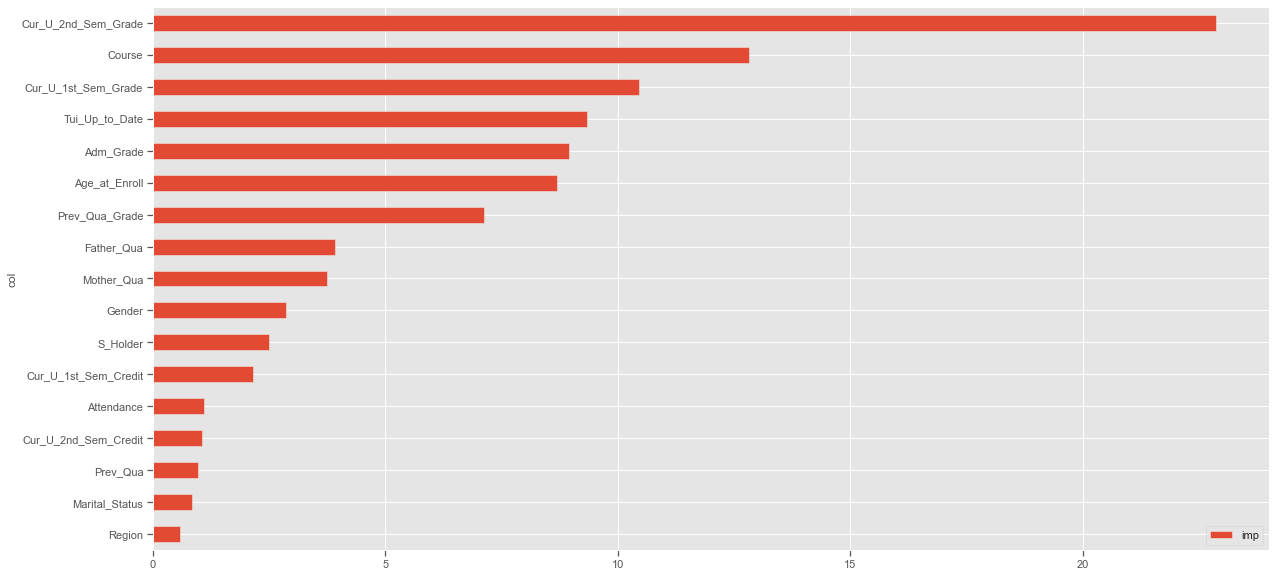

In [156]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

### *Inference*

from the Feature importance plot, we can see the top features that strongly influenced the model's prediction. 

## Evaluating the Model Performance

Understanding how well a machine learning model will perform is the main purpose behind working with evaluation metrics. Metrics like accuracy, precision, recall will be used to evaluate classification models for our balanced datasets and help it perform better in evaluating the model performance.

In [157]:
 metrics = ['Precision', 'Recall', 'F1']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.915096651405968
Recall: 0.7376769230769232
F1: 0.8166670431206733


### *Inference*

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all Student that that labeled as Graduated, how many actually Graduated? High precision relates to the low false positive rate. We have got 0.917 precision which is good enough.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the Student that truly are Graduate, how many did we label? We have got recall of 0.784 which is good for this model as it’s above 0.5.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account, F1 is usually more useful than accuracy, especially if you have an uneven class distribution. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.845.

### Saving The Model Using Joblib

Training a machine learning model can take so much time when the  training dataset is very large. This is the reason it is good to train a model and save it to a file so that later on while making predictions you can just load that model from a file and you don't need to train it every time. Joblib seems to fit in that role, Joblib is more efficient with big numpy arrays hence it is preferred when you have many numpy objects involved in your training step.

In [165]:
# importing required libary

import joblib

In [166]:
# saving the catboost model to a file
joblib.dump(catboost_model, "model_joblib.pkl")

['model_joblib.pkl']

In [167]:
# loading the model into a model object mj
mj = joblib.load("model_joblib.pkl")

In [169]:
# using the model object mj to make prediction

mj.predict([[2, 8, 1, 0, 130.0, 4, 5, 5, 130.0, 1, 1, 0, 18, 0, 11.666667, 0, 11.333333]])

array([0], dtype=int64)

### *Inference*

where 0 stand for Students who will graduate and 1 stands for students who will dropout. we see from the prediction that it gave 0, which predicts student who will graduate based on the information. 